# Poisson SLDS

In [1]:
import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

import ssm
from ssm.util import random_rotation, find_permutation

/opt/miniconda3/envs/ssm-docs/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set the parameters of the SLDS
T = 1000    # number of time bins
K = 5       # number of discrete states
D = 2       # number of latent dimensions
N = 100     # number of observed dimensions

In [3]:
# Make an SLDS with the true parameters
true_slds = ssm.SLDS(N, K, D, emissions="poisson_orthog", emission_kwargs=dict(link="softplus"))

# Set rotational dynamics
for k in range(K):
    true_slds.dynamics.As[k] = .95 * random_rotation(D, theta=(k+1) * np.pi/20)
    true_slds.dynamics.bs[k] = 3 * npr.randn(D)
    
# Set an offset to make the counts larger 
# true_slds.emissions.ds += 10

# Sample data
z, x, y = true_slds.sample(T)

# Mask off some data
mask = npr.rand(T, N) < 0.95
y_masked = y * mask

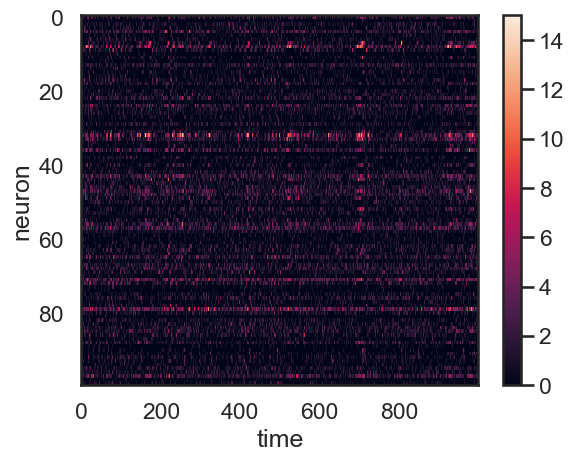

In [4]:
plt.imshow(y.T, aspect="auto", interpolation="none")
plt.xlabel("time")
plt.ylabel("neuron")
plt.colorbar()

In [5]:
print("Fitting SLDS with BBVI")
slds = ssm.SLDS(N, K, D, emissions="poisson_orthog", emission_kwargs=dict(link="softplus"))
slds.initialize(y_masked, masks=mask)

q_bbvi_elbos, q_bbvi = slds.fit(y_masked, masks=mask, method="bbvi", 
                              variational_posterior="tridiag",
                              initial_variance=1,
                              num_iters=1000, print_intvl=100, initialize=False)
q_bbvi_x = q_bbvi.mean[0]

# Find the permutation that matches the true and inferred states
slds.permute(find_permutation(z, slds.most_likely_states(q_bbvi_x, y)))
q_bbvi_z = slds.most_likely_states(q_bbvi_x, y)

# Smooth the observations
q_bbvi_y = slds.smooth(q_bbvi_x, y)

Fitting SLDS with BBVI


  0%|                                                                                                            | 0/1000 [00:00<?, ?it/s]

LP: -105245.2:   0%|                                                                                             | 0/1000 [00:00<?, ?it/s]

ELBO: -105243.8:   0%|                                                                                           | 0/1000 [00:00<?, ?it/s]

ELBO: -105177.8:   0%|                                                                                   | 1/1000 [00:00<01:04, 15.59it/s]

ELBO: -105177.6:   0%|▏                                                                                  | 2/1000 [00:00<00:46, 21.57it/s]

ELBO: -105079.7:   0%|▏                                                                                  | 3/1000 [00:00<00:40, 24.66it/s]

ELBO: -105079.7:   0%|▎                                                                                  | 4/1000 [00:00<00:30, 32.79it/s]

ELBO: -104971.6:   1%|▋                                                                                  | 8/1000 [00:00<00:30, 32.79it/s]

ELBO: -104924.1:   1%|▋                                                                                  | 9/1000 [00:00<00:30, 32.79it/s]

ELBO: -104905.0:   1%|▊                                                                                 | 10/1000 [00:00<00:30, 32.79it/s]

ELBO: -104876.4:   1%|▉                                                                                 | 11/1000 [00:00<00:30, 32.79it/s]

ELBO: -104876.4:   1%|▉                                                                                 | 12/1000 [00:00<00:18, 54.76it/s]

ELBO: -104747.4:   1%|▉                                                                                 | 12/1000 [00:00<00:18, 54.76it/s]

ELBO: -104729.1:   1%|█                                                                                 | 13/1000 [00:00<00:18, 54.76it/s]

ELBO: -104702.4:   2%|█▋                                                                                | 20/1000 [00:00<00:17, 54.76it/s]

ELBO: -104718.9:   2%|█▋                                                                                | 21/1000 [00:00<00:17, 54.76it/s]

ELBO: -104718.9:   2%|█▊                                                                                | 22/1000 [00:00<00:14, 69.76it/s]

ELBO: -104648.6:   2%|█▊                                                                                | 22/1000 [00:00<00:14, 69.76it/s]

ELBO: -104642.2:   2%|█▉                                                                                | 23/1000 [00:00<00:14, 69.76it/s]

ELBO: -104584.4:   2%|█▉                                                                                | 24/1000 [00:00<00:13, 69.76it/s]

ELBO: -104522.4:   2%|██                                                                                | 25/1000 [00:00<00:13, 69.76it/s]

ELBO: -104574.2:   3%|██▏                                                                               | 26/1000 [00:00<00:13, 69.76it/s]

ELBO: -104502.4:   3%|██▏                                                                               | 27/1000 [00:00<00:13, 69.76it/s]

ELBO: -104473.4:   3%|██▎                                                                               | 28/1000 [00:00<00:13, 69.76it/s]

ELBO: -104459.1:   3%|██▍                                                                               | 29/1000 [00:00<00:13, 69.76it/s]

ELBO: -104459.1:   3%|██▍                                                                               | 30/1000 [00:00<00:21, 45.72it/s]

ELBO: -104420.5:   4%|███                                                                               | 38/1000 [00:00<00:21, 45.72it/s]

ELBO: -104358.4:   4%|███▏                                                                              | 39/1000 [00:00<00:21, 45.72it/s]

ELBO: -104372.1:   4%|███▎                                                                              | 40/1000 [00:00<00:20, 45.72it/s]

ELBO: -104350.2:   4%|███▎                                                                              | 41/1000 [00:00<00:20, 45.72it/s]

ELBO: -104350.2:   4%|███▍                                                                              | 42/1000 [00:00<00:15, 61.84it/s]

ELBO: -104318.4:   4%|███▍                                                                              | 42/1000 [00:00<00:15, 61.84it/s]

ELBO: -104299.3:   4%|███▌                                                                              | 43/1000 [00:00<00:15, 61.84it/s]

ELBO: -104244.3:   4%|███▌                                                                              | 44/1000 [00:00<00:15, 61.84it/s]

ELBO: -104226.6:   4%|███▋                                                                              | 45/1000 [00:00<00:15, 61.84it/s]

ELBO: -104228.5:   5%|███▊                                                                              | 46/1000 [00:00<00:15, 61.84it/s]

ELBO: -104216.8:   5%|███▊                                                                              | 47/1000 [00:00<00:15, 61.84it/s]

ELBO: -104148.9:   5%|███▉                                                                              | 48/1000 [00:00<00:15, 61.84it/s]

ELBO: -104223.5:   5%|████                                                                              | 49/1000 [00:00<00:15, 61.84it/s]

ELBO: -104223.5:   5%|████                                                                              | 50/1000 [00:00<00:18, 50.28it/s]

ELBO: -104164.5:   5%|████                                                                              | 50/1000 [00:00<00:18, 50.28it/s]

ELBO: -104188.8:   5%|████▏                                                                             | 51/1000 [00:01<00:18, 50.28it/s]

ELBO: -104113.8:   5%|████▎                                                                             | 52/1000 [00:01<00:18, 50.28it/s]

ELBO: -104121.3:   5%|████▎                                                                             | 53/1000 [00:01<00:18, 50.28it/s]

ELBO: -104096.6:   5%|████▍                                                                             | 54/1000 [00:01<00:18, 50.28it/s]

ELBO: -104096.6:   6%|█████                                                                             | 62/1000 [00:01<00:15, 60.10it/s]

ELBO: -104013.3:   6%|█████                                                                             | 62/1000 [00:01<00:15, 60.10it/s]

ELBO: -104037.2:   6%|█████▏                                                                            | 63/1000 [00:01<00:15, 60.10it/s]

ELBO: -104051.0:   6%|█████▏                                                                            | 64/1000 [00:01<00:15, 60.10it/s]

ELBO: -104071.6:   6%|█████▎                                                                            | 65/1000 [00:01<00:15, 60.10it/s]

ELBO: -104033.9:   7%|█████▍                                                                            | 66/1000 [00:01<00:15, 60.10it/s]

ELBO: -103931.3:   7%|█████▍                                                                            | 67/1000 [00:01<00:15, 60.10it/s]

ELBO: -103979.7:   7%|█████▌                                                                            | 68/1000 [00:01<00:15, 60.10it/s]

ELBO: -103979.7:   7%|█████▋                                                                            | 69/1000 [00:01<00:18, 51.35it/s]

ELBO: -104001.1:   7%|█████▋                                                                            | 69/1000 [00:01<00:18, 51.35it/s]

ELBO: -103973.1:   7%|█████▋                                                                            | 70/1000 [00:01<00:18, 51.35it/s]

ELBO: -103871.8:   7%|█████▊                                                                            | 71/1000 [00:01<00:18, 51.35it/s]

ELBO: -103958.0:   7%|█████▉                                                                            | 72/1000 [00:01<00:18, 51.35it/s]

ELBO: -103878.4:   7%|█████▉                                                                            | 73/1000 [00:01<00:18, 51.35it/s]

ELBO: -103958.9:   7%|██████                                                                            | 74/1000 [00:01<00:18, 51.35it/s]

ELBO: -103958.9:   8%|██████▏                                                                           | 75/1000 [00:01<00:19, 46.54it/s]

ELBO: -103865.3:   8%|██████▏                                                                           | 75/1000 [00:01<00:19, 46.54it/s]

ELBO: -103886.0:   8%|██████▏                                                                           | 76/1000 [00:01<00:19, 46.54it/s]

ELBO: -103818.5:   8%|██████▎                                                                           | 77/1000 [00:01<00:19, 46.54it/s]

ELBO: -103855.9:   8%|██████▍                                                                           | 78/1000 [00:01<00:19, 46.54it/s]

ELBO: -103845.9:   8%|██████▍                                                                           | 79/1000 [00:01<00:19, 46.54it/s]

ELBO: -103768.8:   8%|██████▌                                                                           | 80/1000 [00:01<00:19, 46.54it/s]

ELBO: -103768.8:   8%|██████▋                                                                           | 81/1000 [00:01<00:22, 40.44it/s]

ELBO: -103779.7:   8%|██████▋                                                                           | 81/1000 [00:01<00:22, 40.44it/s]

ELBO: -103806.5:   8%|██████▋                                                                           | 82/1000 [00:01<00:22, 40.44it/s]

ELBO: -103725.0:   8%|██████▊                                                                           | 83/1000 [00:01<00:22, 40.44it/s]

ELBO: -103781.4:   8%|██████▉                                                                           | 84/1000 [00:01<00:22, 40.44it/s]

ELBO: -103721.7:   8%|██████▉                                                                           | 85/1000 [00:01<00:22, 40.44it/s]

ELBO: -103721.7:   9%|███████                                                                           | 86/1000 [00:01<00:23, 39.27it/s]

ELBO: -103777.7:   9%|███████                                                                           | 86/1000 [00:01<00:23, 39.27it/s]

ELBO: -103686.1:   9%|███████▏                                                                          | 87/1000 [00:01<00:23, 39.27it/s]

ELBO: -103744.0:   9%|███████▏                                                                          | 88/1000 [00:01<00:23, 39.27it/s]

ELBO: -103753.3:   9%|███████▎                                                                          | 89/1000 [00:01<00:23, 39.27it/s]

ELBO: -103730.2:   9%|███████▍                                                                          | 90/1000 [00:01<00:23, 39.27it/s]

ELBO: -103730.2:   9%|███████▍                                                                          | 91/1000 [00:01<00:23, 38.33it/s]

ELBO: -103760.7:  10%|███████▊                                                                          | 95/1000 [00:01<00:23, 38.33it/s]

ELBO: -103732.3:  10%|███████▊                                                                          | 96/1000 [00:02<00:23, 38.33it/s]

ELBO: -103713.2:  10%|███████▉                                                                          | 97/1000 [00:02<00:23, 38.33it/s]

ELBO: -103729.0:  10%|████████                                                                          | 98/1000 [00:02<00:23, 38.33it/s]

ELBO: -103729.0:  10%|████████                                                                          | 99/1000 [00:02<00:19, 46.06it/s]

ELBO: -103679.8:  10%|████████                                                                          | 99/1000 [00:02<00:19, 46.06it/s]

ELBO: -103629.7:  10%|████████                                                                         | 100/1000 [00:02<00:19, 46.06it/s]

ELBO: -103588.5:  10%|████████▏                                                                        | 101/1000 [00:02<00:19, 46.06it/s]

ELBO: -103731.4:  10%|████████▎                                                                        | 102/1000 [00:02<00:19, 46.06it/s]

ELBO: -103584.5:  10%|████████▎                                                                        | 103/1000 [00:02<00:19, 46.06it/s]

ELBO: -103584.5:  10%|████████▍                                                                        | 104/1000 [00:02<00:20, 42.88it/s]

ELBO: -103604.7:  10%|████████▍                                                                        | 104/1000 [00:02<00:20, 42.88it/s]

ELBO: -103617.8:  10%|████████▌                                                                        | 105/1000 [00:02<00:20, 42.88it/s]

ELBO: -103596.1:  11%|████████▌                                                                        | 106/1000 [00:02<00:20, 42.88it/s]

ELBO: -103600.7:  11%|████████▋                                                                        | 107/1000 [00:02<00:20, 42.88it/s]

ELBO: -103563.6:  11%|████████▋                                                                        | 108/1000 [00:02<00:20, 42.88it/s]

ELBO: -103563.6:  11%|████████▊                                                                        | 109/1000 [00:02<00:22, 39.92it/s]

ELBO: -103516.3:  11%|████████▊                                                                        | 109/1000 [00:02<00:22, 39.92it/s]

ELBO: -103559.9:  11%|████████▉                                                                        | 110/1000 [00:02<00:22, 39.92it/s]

ELBO: -103517.5:  11%|████████▉                                                                        | 111/1000 [00:02<00:22, 39.92it/s]

ELBO: -103498.3:  11%|█████████                                                                        | 112/1000 [00:02<00:22, 39.92it/s]

ELBO: -103527.7:  11%|█████████▏                                                                       | 113/1000 [00:02<00:22, 39.92it/s]

ELBO: -103527.7:  11%|█████████▏                                                                       | 114/1000 [00:02<00:23, 38.06it/s]

ELBO: -103514.8:  11%|█████████▏                                                                       | 114/1000 [00:02<00:23, 38.06it/s]

ELBO: -103528.4:  12%|█████████▎                                                                       | 115/1000 [00:02<00:23, 38.06it/s]

ELBO: -103499.0:  12%|█████████▍                                                                       | 116/1000 [00:02<00:23, 38.06it/s]

ELBO: -103492.2:  12%|█████████▍                                                                       | 117/1000 [00:02<00:23, 38.06it/s]

ELBO: -103492.2:  12%|█████████▌                                                                       | 118/1000 [00:02<00:23, 37.00it/s]

ELBO: -103472.3:  12%|█████████▌                                                                       | 118/1000 [00:02<00:23, 37.00it/s]

ELBO: -103464.3:  12%|█████████▋                                                                       | 119/1000 [00:02<00:23, 37.00it/s]

ELBO: -103432.2:  12%|█████████▋                                                                       | 120/1000 [00:02<00:23, 37.00it/s]

ELBO: -103474.2:  12%|█████████▊                                                                       | 121/1000 [00:02<00:23, 37.00it/s]

ELBO: -103474.2:  12%|█████████▉                                                                       | 122/1000 [00:02<00:26, 33.63it/s]

ELBO: -103468.2:  12%|█████████▉                                                                       | 122/1000 [00:02<00:26, 33.63it/s]

ELBO: -103461.7:  12%|█████████▉                                                                       | 123/1000 [00:02<00:26, 33.63it/s]

ELBO: -103411.9:  13%|██████████▎                                                                      | 128/1000 [00:02<00:25, 33.63it/s]

ELBO: -103485.3:  13%|██████████▍                                                                      | 129/1000 [00:02<00:25, 33.63it/s]

ELBO: -103485.3:  13%|██████████▌                                                                      | 130/1000 [00:02<00:20, 42.77it/s]

ELBO: -103426.4:  13%|██████████▌                                                                      | 130/1000 [00:02<00:20, 42.77it/s]

ELBO: -103386.3:  13%|██████████▌                                                                      | 131/1000 [00:02<00:20, 42.77it/s]

ELBO: -103420.4:  13%|██████████▋                                                                      | 132/1000 [00:02<00:20, 42.77it/s]

ELBO: -103377.5:  13%|██████████▊                                                                      | 133/1000 [00:02<00:20, 42.77it/s]

ELBO: -103304.6:  13%|██████████▊                                                                      | 134/1000 [00:03<00:20, 42.77it/s]

ELBO: -103304.6:  14%|██████████▉                                                                      | 135/1000 [00:03<00:21, 40.11it/s]

ELBO: -103339.4:  14%|██████████▉                                                                      | 135/1000 [00:03<00:21, 40.11it/s]

ELBO: -103277.7:  14%|███████████                                                                      | 136/1000 [00:03<00:21, 40.11it/s]

ELBO: -103315.2:  14%|███████████                                                                      | 137/1000 [00:03<00:21, 40.11it/s]

ELBO: -103347.1:  14%|███████████▏                                                                     | 138/1000 [00:03<00:21, 40.11it/s]

ELBO: -103340.0:  14%|███████████▎                                                                     | 139/1000 [00:03<00:21, 40.11it/s]

ELBO: -103340.0:  14%|███████████▎                                                                     | 140/1000 [00:03<00:22, 38.35it/s]

ELBO: -103313.8:  14%|███████████▎                                                                     | 140/1000 [00:03<00:22, 38.35it/s]

ELBO: -103272.8:  14%|███████████▍                                                                     | 141/1000 [00:03<00:22, 38.35it/s]

ELBO: -103255.1:  14%|███████████▌                                                                     | 142/1000 [00:03<00:22, 38.35it/s]

ELBO: -103284.9:  14%|███████████▌                                                                     | 143/1000 [00:03<00:22, 38.35it/s]

ELBO: -103284.9:  14%|███████████▋                                                                     | 144/1000 [00:03<00:23, 37.03it/s]

ELBO: -103247.2:  14%|███████████▋                                                                     | 144/1000 [00:03<00:23, 37.03it/s]

ELBO: -103259.2:  14%|███████████▋                                                                     | 145/1000 [00:03<00:23, 37.03it/s]

ELBO: -103221.6:  15%|███████████▊                                                                     | 146/1000 [00:03<00:23, 37.03it/s]

ELBO: -103279.5:  15%|███████████▉                                                                     | 147/1000 [00:03<00:23, 37.03it/s]

ELBO: -103279.5:  15%|███████████▉                                                                     | 148/1000 [00:03<00:23, 36.25it/s]

ELBO: -103202.2:  15%|███████████▉                                                                     | 148/1000 [00:03<00:23, 36.25it/s]

ELBO: -103240.7:  15%|████████████                                                                     | 149/1000 [00:03<00:23, 36.25it/s]

ELBO: -103276.6:  15%|████████████▏                                                                    | 150/1000 [00:03<00:23, 36.25it/s]

ELBO: -103165.3:  15%|████████████▏                                                                    | 151/1000 [00:03<00:23, 36.25it/s]

ELBO: -103165.3:  15%|████████████▎                                                                    | 152/1000 [00:03<00:23, 35.66it/s]

ELBO: -103199.8:  15%|████████████▎                                                                    | 152/1000 [00:03<00:23, 35.66it/s]

ELBO: -103268.3:  15%|████████████▍                                                                    | 153/1000 [00:03<00:23, 35.66it/s]

ELBO: -103161.5:  15%|████████████▍                                                                    | 154/1000 [00:03<00:23, 35.66it/s]

ELBO: -103154.7:  16%|████████████▌                                                                    | 155/1000 [00:03<00:23, 35.66it/s]

ELBO: -103154.7:  16%|████████████▋                                                                    | 156/1000 [00:03<00:23, 35.45it/s]

ELBO: -103122.7:  16%|████████████▋                                                                    | 156/1000 [00:03<00:23, 35.45it/s]

ELBO: -103143.0:  16%|████████████▋                                                                    | 157/1000 [00:03<00:23, 35.45it/s]

ELBO: -103149.5:  16%|████████████▊                                                                    | 158/1000 [00:03<00:23, 35.45it/s]

ELBO: -103157.2:  16%|█████████████▏                                                                   | 163/1000 [00:03<00:23, 35.45it/s]

ELBO: -103157.2:  16%|█████████████▎                                                                   | 164/1000 [00:03<00:20, 41.35it/s]

ELBO: -103151.2:  16%|█████████████▎                                                                   | 164/1000 [00:03<00:20, 41.35it/s]

ELBO: -103188.0:  16%|█████████████▎                                                                   | 165/1000 [00:03<00:20, 41.35it/s]

ELBO: -103095.4:  17%|█████████████▍                                                                   | 166/1000 [00:03<00:20, 41.35it/s]

ELBO: -103123.0:  17%|█████████████▌                                                                   | 167/1000 [00:03<00:20, 41.35it/s]

ELBO: -103089.3:  17%|█████████████▌                                                                   | 168/1000 [00:03<00:20, 41.35it/s]

ELBO: -103089.3:  17%|█████████████▋                                                                   | 169/1000 [00:03<00:21, 39.20it/s]

ELBO: -103082.2:  17%|█████████████▋                                                                   | 169/1000 [00:03<00:21, 39.20it/s]

ELBO: -103101.9:  17%|█████████████▊                                                                   | 170/1000 [00:03<00:21, 39.20it/s]

ELBO: -103054.6:  17%|█████████████▊                                                                   | 171/1000 [00:04<00:21, 39.20it/s]

ELBO: -103029.9:  17%|█████████████▉                                                                   | 172/1000 [00:04<00:21, 39.20it/s]

ELBO: -103029.9:  17%|██████████████                                                                   | 173/1000 [00:04<00:21, 37.86it/s]

ELBO: -103026.9:  17%|██████████████                                                                   | 173/1000 [00:04<00:21, 37.86it/s]

ELBO: -103085.8:  17%|██████████████                                                                   | 174/1000 [00:04<00:21, 37.86it/s]

ELBO: -103026.5:  18%|██████████████▏                                                                  | 175/1000 [00:04<00:21, 37.86it/s]

ELBO: -103028.1:  18%|██████████████▎                                                                  | 176/1000 [00:04<00:21, 37.86it/s]

ELBO: -103028.1:  18%|██████████████▎                                                                  | 177/1000 [00:04<00:22, 36.88it/s]

ELBO: -102995.1:  18%|██████████████▎                                                                  | 177/1000 [00:04<00:22, 36.88it/s]

ELBO: -103022.7:  18%|██████████████▍                                                                  | 178/1000 [00:04<00:22, 36.88it/s]

ELBO: -103034.6:  18%|██████████████▍                                                                  | 179/1000 [00:04<00:22, 36.88it/s]

ELBO: -102964.6:  18%|██████████████▌                                                                  | 180/1000 [00:04<00:22, 36.88it/s]

ELBO: -102964.6:  18%|██████████████▋                                                                  | 181/1000 [00:04<00:22, 35.95it/s]

ELBO: -103037.4:  18%|██████████████▋                                                                  | 181/1000 [00:04<00:22, 35.95it/s]

ELBO: -102934.4:  18%|██████████████▋                                                                  | 182/1000 [00:04<00:22, 35.95it/s]

ELBO: -102998.0:  18%|██████████████▊                                                                  | 183/1000 [00:04<00:22, 35.95it/s]

ELBO: -102962.1:  18%|██████████████▉                                                                  | 184/1000 [00:04<00:22, 35.95it/s]

ELBO: -102962.1:  18%|██████████████▉                                                                  | 185/1000 [00:04<00:22, 35.48it/s]

ELBO: -102980.7:  18%|██████████████▉                                                                  | 185/1000 [00:04<00:22, 35.48it/s]

ELBO: -102966.8:  19%|███████████████                                                                  | 186/1000 [00:04<00:22, 35.48it/s]

ELBO: -102946.1:  19%|███████████████▏                                                                 | 187/1000 [00:04<00:22, 35.48it/s]

ELBO: -102887.3:  19%|███████████████▏                                                                 | 188/1000 [00:04<00:22, 35.48it/s]

ELBO: -102887.3:  19%|███████████████▎                                                                 | 189/1000 [00:04<00:23, 35.24it/s]

ELBO: -102987.4:  19%|███████████████▎                                                                 | 189/1000 [00:04<00:23, 35.24it/s]

ELBO: -102954.3:  19%|███████████████▍                                                                 | 190/1000 [00:04<00:22, 35.24it/s]

ELBO: -102907.4:  19%|███████████████▍                                                                 | 191/1000 [00:04<00:22, 35.24it/s]

ELBO: -102874.3:  19%|███████████████▌                                                                 | 192/1000 [00:04<00:22, 35.24it/s]

ELBO: -102874.3:  19%|███████████████▋                                                                 | 193/1000 [00:04<00:23, 35.06it/s]

ELBO: -102953.0:  19%|███████████████▋                                                                 | 193/1000 [00:04<00:23, 35.06it/s]

ELBO: -102838.3:  19%|███████████████▋                                                                 | 194/1000 [00:04<00:22, 35.06it/s]

ELBO: -102913.1:  20%|███████████████▊                                                                 | 195/1000 [00:04<00:22, 35.06it/s]

ELBO: -102830.6:  20%|███████████████▉                                                                 | 196/1000 [00:04<00:22, 35.06it/s]

ELBO: -102830.6:  20%|███████████████▉                                                                 | 197/1000 [00:04<00:23, 34.84it/s]

ELBO: -102821.6:  20%|████████████████▎                                                                | 201/1000 [00:04<00:22, 34.84it/s]

ELBO: -102967.6:  20%|████████████████▎                                                                | 202/1000 [00:04<00:22, 34.84it/s]

ELBO: -102879.2:  20%|████████████████▍                                                                | 203/1000 [00:04<00:22, 34.84it/s]

ELBO: -102879.2:  20%|████████████████▌                                                                | 204/1000 [00:04<00:19, 41.56it/s]

ELBO: -102780.0:  20%|████████████████▌                                                                | 204/1000 [00:04<00:19, 41.56it/s]

ELBO: -102854.0:  20%|████████████████▌                                                                | 205/1000 [00:04<00:19, 41.56it/s]

ELBO: -102864.2:  21%|████████████████▋                                                                | 206/1000 [00:04<00:19, 41.56it/s]

ELBO: -102814.2:  21%|████████████████▊                                                                | 207/1000 [00:04<00:19, 41.56it/s]

ELBO: -102820.2:  21%|████████████████▊                                                                | 208/1000 [00:05<00:19, 41.56it/s]

ELBO: -102820.2:  21%|████████████████▉                                                                | 209/1000 [00:05<00:20, 39.15it/s]

ELBO: -102813.5:  21%|████████████████▉                                                                | 209/1000 [00:05<00:20, 39.15it/s]

ELBO: -102855.8:  21%|█████████████████                                                                | 210/1000 [00:05<00:20, 39.15it/s]

ELBO: -102808.5:  21%|█████████████████                                                                | 211/1000 [00:05<00:20, 39.15it/s]

ELBO: -102756.3:  21%|█████████████████▏                                                               | 212/1000 [00:05<00:20, 39.15it/s]

ELBO: -102756.3:  21%|█████████████████▎                                                               | 213/1000 [00:05<00:20, 37.87it/s]

ELBO: -102781.6:  21%|█████████████████▎                                                               | 213/1000 [00:05<00:20, 37.87it/s]

ELBO: -102795.0:  21%|█████████████████▎                                                               | 214/1000 [00:05<00:20, 37.87it/s]

ELBO: -102711.7:  22%|█████████████████▍                                                               | 215/1000 [00:05<00:20, 37.87it/s]

ELBO: -102746.9:  22%|█████████████████▍                                                               | 216/1000 [00:05<00:20, 37.87it/s]

ELBO: -102746.9:  22%|█████████████████▌                                                               | 217/1000 [00:05<00:21, 36.90it/s]

ELBO: -102741.2:  22%|█████████████████▌                                                               | 217/1000 [00:05<00:21, 36.90it/s]

ELBO: -102720.0:  22%|█████████████████▋                                                               | 218/1000 [00:05<00:21, 36.90it/s]

ELBO: -102748.8:  22%|█████████████████▋                                                               | 219/1000 [00:05<00:21, 36.90it/s]

ELBO: -102744.8:  22%|█████████████████▊                                                               | 220/1000 [00:05<00:21, 36.90it/s]

ELBO: -102744.8:  22%|█████████████████▉                                                               | 221/1000 [00:05<00:21, 35.95it/s]

ELBO: -102731.0:  22%|█████████████████▉                                                               | 221/1000 [00:05<00:21, 35.95it/s]

ELBO: -102707.4:  22%|█████████████████▉                                                               | 222/1000 [00:05<00:21, 35.95it/s]

ELBO: -102734.4:  22%|██████████████████                                                               | 223/1000 [00:05<00:21, 35.95it/s]

ELBO: -102693.9:  22%|██████████████████▏                                                              | 224/1000 [00:05<00:21, 35.95it/s]

ELBO: -102693.9:  22%|██████████████████▏                                                              | 225/1000 [00:05<00:21, 35.46it/s]

ELBO: -102673.1:  22%|██████████████████▏                                                              | 225/1000 [00:05<00:21, 35.46it/s]

ELBO: -102684.8:  23%|██████████████████▎                                                              | 226/1000 [00:05<00:21, 35.46it/s]

ELBO: -102650.6:  23%|██████████████████▍                                                              | 227/1000 [00:05<00:21, 35.46it/s]

ELBO: -102632.7:  23%|██████████████████▍                                                              | 228/1000 [00:05<00:21, 35.46it/s]

ELBO: -102632.7:  23%|██████████████████▌                                                              | 229/1000 [00:05<00:21, 35.18it/s]

ELBO: -102683.7:  23%|██████████████████▌                                                              | 229/1000 [00:05<00:21, 35.18it/s]

ELBO: -102619.0:  23%|██████████████████▋                                                              | 230/1000 [00:05<00:21, 35.18it/s]

ELBO: -102662.2:  23%|██████████████████▋                                                              | 231/1000 [00:05<00:21, 35.18it/s]

ELBO: -102668.9:  23%|██████████████████▊                                                              | 232/1000 [00:05<00:21, 35.18it/s]

ELBO: -102668.9:  23%|██████████████████▊                                                              | 233/1000 [00:05<00:21, 35.06it/s]

ELBO: -102621.2:  23%|██████████████████▊                                                              | 233/1000 [00:05<00:21, 35.06it/s]

ELBO: -102627.3:  23%|██████████████████▉                                                              | 234/1000 [00:05<00:21, 35.06it/s]

ELBO: -102619.7:  24%|███████████████████                                                              | 235/1000 [00:05<00:21, 35.06it/s]

ELBO: -102615.5:  24%|███████████████████                                                              | 236/1000 [00:05<00:21, 35.06it/s]

ELBO: -102615.5:  24%|███████████████████▏                                                             | 237/1000 [00:05<00:21, 34.88it/s]

ELBO: -102595.6:  24%|███████████████████▏                                                             | 237/1000 [00:05<00:21, 34.88it/s]

ELBO: -102544.6:  24%|███████████████████▎                                                             | 238/1000 [00:05<00:21, 34.88it/s]

ELBO: -102594.7:  24%|███████████████████▎                                                             | 239/1000 [00:05<00:21, 34.88it/s]

ELBO: -102545.2:  24%|███████████████████▍                                                             | 240/1000 [00:05<00:21, 34.88it/s]

ELBO: -102545.2:  24%|███████████████████▌                                                             | 241/1000 [00:05<00:23, 31.65it/s]

ELBO: -102618.4:  24%|███████████████████▌                                                             | 241/1000 [00:06<00:23, 31.65it/s]

ELBO: -102482.7:  25%|███████████████████▉                                                             | 246/1000 [00:06<00:23, 31.65it/s]

ELBO: -102569.7:  25%|████████████████████                                                             | 247/1000 [00:06<00:23, 31.65it/s]

ELBO: -102549.0:  25%|████████████████████                                                             | 248/1000 [00:06<00:23, 31.65it/s]

ELBO: -102549.0:  25%|████████████████████▏                                                            | 249/1000 [00:06<00:17, 42.09it/s]

ELBO: -102564.7:  25%|████████████████████▏                                                            | 249/1000 [00:06<00:17, 42.09it/s]

ELBO: -102578.7:  25%|████████████████████▎                                                            | 250/1000 [00:06<00:17, 42.09it/s]

ELBO: -102527.3:  25%|████████████████████▎                                                            | 251/1000 [00:06<00:17, 42.09it/s]

ELBO: -102529.6:  25%|████████████████████▍                                                            | 252/1000 [00:06<00:17, 42.09it/s]

ELBO: -102511.2:  25%|████████████████████▍                                                            | 253/1000 [00:06<00:17, 42.09it/s]

ELBO: -102511.2:  25%|████████████████████▌                                                            | 254/1000 [00:06<00:18, 39.60it/s]

ELBO: -102521.7:  25%|████████████████████▌                                                            | 254/1000 [00:06<00:18, 39.60it/s]

ELBO: -102457.7:  26%|████████████████████▋                                                            | 255/1000 [00:06<00:18, 39.60it/s]

ELBO: -102535.4:  26%|████████████████████▋                                                            | 256/1000 [00:06<00:18, 39.60it/s]

ELBO: -102457.4:  26%|████████████████████▊                                                            | 257/1000 [00:06<00:18, 39.60it/s]

ELBO: -102464.1:  26%|████████████████████▉                                                            | 258/1000 [00:06<00:18, 39.60it/s]

ELBO: -102464.1:  26%|████████████████████▉                                                            | 259/1000 [00:06<00:19, 37.97it/s]

ELBO: -102444.7:  26%|████████████████████▉                                                            | 259/1000 [00:06<00:19, 37.97it/s]

ELBO: -102419.9:  26%|█████████████████████                                                            | 260/1000 [00:06<00:19, 37.97it/s]

ELBO: -102453.0:  26%|█████████████████████▏                                                           | 261/1000 [00:06<00:19, 37.97it/s]

ELBO: -102490.0:  26%|█████████████████████▏                                                           | 262/1000 [00:06<00:19, 37.97it/s]

ELBO: -102490.0:  26%|█████████████████████▎                                                           | 263/1000 [00:06<00:19, 37.03it/s]

ELBO: -102408.0:  26%|█████████████████████▎                                                           | 263/1000 [00:06<00:19, 37.03it/s]

ELBO: -102433.1:  26%|█████████████████████▍                                                           | 264/1000 [00:06<00:19, 37.03it/s]

ELBO: -102440.4:  26%|█████████████████████▍                                                           | 265/1000 [00:06<00:19, 37.03it/s]

ELBO: -102447.3:  27%|█████████████████████▌                                                           | 266/1000 [00:06<00:19, 37.03it/s]

ELBO: -102447.3:  27%|█████████████████████▋                                                           | 267/1000 [00:06<00:20, 36.35it/s]

ELBO: -102468.9:  27%|█████████████████████▋                                                           | 267/1000 [00:06<00:20, 36.35it/s]

ELBO: -102451.6:  27%|█████████████████████▋                                                           | 268/1000 [00:06<00:20, 36.35it/s]

ELBO: -102427.3:  27%|█████████████████████▊                                                           | 269/1000 [00:06<00:20, 36.35it/s]

ELBO: -102393.1:  27%|█████████████████████▊                                                           | 270/1000 [00:06<00:20, 36.35it/s]

ELBO: -102393.1:  27%|█████████████████████▉                                                           | 271/1000 [00:06<00:20, 35.84it/s]

ELBO: -102372.9:  27%|█████████████████████▉                                                           | 271/1000 [00:06<00:20, 35.84it/s]

ELBO: -102410.6:  27%|██████████████████████                                                           | 272/1000 [00:06<00:20, 35.84it/s]

ELBO: -102393.4:  27%|██████████████████████                                                           | 273/1000 [00:06<00:20, 35.84it/s]

ELBO: -102395.9:  27%|██████████████████████▏                                                          | 274/1000 [00:06<00:20, 35.84it/s]

ELBO: -102395.9:  28%|██████████████████████▎                                                          | 275/1000 [00:06<00:20, 35.54it/s]

ELBO: -102341.4:  28%|██████████████████████▎                                                          | 275/1000 [00:06<00:20, 35.54it/s]

ELBO: -102380.9:  28%|██████████████████████▎                                                          | 276/1000 [00:06<00:20, 35.54it/s]

ELBO: -102386.7:  28%|██████████████████████▍                                                          | 277/1000 [00:06<00:20, 35.54it/s]

ELBO: -102366.2:  28%|██████████████████████▌                                                          | 278/1000 [00:06<00:20, 35.54it/s]

ELBO: -102366.2:  28%|██████████████████████▌                                                          | 279/1000 [00:06<00:20, 35.14it/s]

ELBO: -102293.4:  28%|██████████████████████▌                                                          | 279/1000 [00:07<00:20, 35.14it/s]

ELBO: -102302.1:  28%|██████████████████████▋                                                          | 280/1000 [00:07<00:20, 35.14it/s]

ELBO: -102362.7:  28%|██████████████████████▊                                                          | 281/1000 [00:07<00:20, 35.14it/s]

ELBO: -102304.4:  28%|██████████████████████▊                                                          | 282/1000 [00:07<00:20, 35.14it/s]

ELBO: -102304.4:  28%|██████████████████████▉                                                          | 283/1000 [00:07<00:22, 32.08it/s]

ELBO: -102316.3:  28%|██████████████████████▉                                                          | 283/1000 [00:07<00:22, 32.08it/s]

ELBO: -102361.1:  28%|███████████████████████                                                          | 284/1000 [00:07<00:22, 32.08it/s]

ELBO: -102345.0:  28%|███████████████████████                                                          | 285/1000 [00:07<00:22, 32.08it/s]

ELBO: -102337.0:  29%|███████████████████████▏                                                         | 286/1000 [00:07<00:22, 32.08it/s]

ELBO: -102337.0:  29%|███████████████████████▏                                                         | 287/1000 [00:07<00:21, 32.62it/s]

ELBO: -102304.5:  29%|███████████████████████▏                                                         | 287/1000 [00:07<00:21, 32.62it/s]

ELBO: -102314.9:  29%|███████████████████████▎                                                         | 288/1000 [00:07<00:21, 32.62it/s]

ELBO: -102244.3:  29%|███████████████████████▍                                                         | 289/1000 [00:07<00:21, 32.62it/s]

ELBO: -102253.2:  29%|███████████████████████▊                                                         | 294/1000 [00:07<00:21, 32.62it/s]

ELBO: -102253.2:  30%|███████████████████████▉                                                         | 295/1000 [00:07<00:16, 42.72it/s]

ELBO: -102261.7:  30%|███████████████████████▉                                                         | 295/1000 [00:07<00:16, 42.72it/s]

ELBO: -102243.0:  30%|███████████████████████▉                                                         | 296/1000 [00:07<00:16, 42.72it/s]

ELBO: -102199.8:  30%|████████████████████████                                                         | 297/1000 [00:07<00:16, 42.72it/s]

ELBO: -102253.0:  30%|████████████████████████▏                                                        | 298/1000 [00:07<00:16, 42.72it/s]

ELBO: -102247.5:  30%|████████████████████████▏                                                        | 299/1000 [00:07<00:16, 42.72it/s]

ELBO: -102247.5:  30%|████████████████████████▎                                                        | 300/1000 [00:07<00:17, 40.01it/s]

ELBO: -102261.5:  30%|████████████████████████▎                                                        | 300/1000 [00:07<00:17, 40.01it/s]

ELBO: -102198.5:  30%|████████████████████████▍                                                        | 301/1000 [00:07<00:17, 40.01it/s]

ELBO: -102273.0:  30%|████████████████████████▍                                                        | 302/1000 [00:07<00:17, 40.01it/s]

ELBO: -102183.6:  30%|████████████████████████▌                                                        | 303/1000 [00:07<00:17, 40.01it/s]

ELBO: -102224.4:  30%|████████████████████████▌                                                        | 304/1000 [00:07<00:17, 40.01it/s]

ELBO: -102224.4:  30%|████████████████████████▋                                                        | 305/1000 [00:07<00:18, 38.19it/s]

ELBO: -102172.1:  30%|████████████████████████▋                                                        | 305/1000 [00:07<00:18, 38.19it/s]

ELBO: -102212.0:  31%|████████████████████████▊                                                        | 306/1000 [00:07<00:18, 38.19it/s]

ELBO: -102232.7:  31%|████████████████████████▊                                                        | 307/1000 [00:07<00:18, 38.19it/s]

ELBO: -102219.8:  31%|████████████████████████▉                                                        | 308/1000 [00:07<00:18, 38.19it/s]

ELBO: -102219.8:  31%|█████████████████████████                                                        | 309/1000 [00:07<00:18, 37.29it/s]

ELBO: -102217.9:  31%|█████████████████████████                                                        | 309/1000 [00:07<00:18, 37.29it/s]

ELBO: -102179.3:  31%|█████████████████████████                                                        | 310/1000 [00:07<00:18, 37.29it/s]

ELBO: -102153.3:  31%|█████████████████████████▏                                                       | 311/1000 [00:07<00:18, 37.29it/s]

ELBO: -102184.5:  31%|█████████████████████████▎                                                       | 312/1000 [00:07<00:18, 37.29it/s]

ELBO: -102184.5:  31%|█████████████████████████▎                                                       | 313/1000 [00:07<00:18, 36.55it/s]

ELBO: -102141.3:  31%|█████████████████████████▎                                                       | 313/1000 [00:07<00:18, 36.55it/s]

ELBO: -102158.2:  31%|█████████████████████████▍                                                       | 314/1000 [00:07<00:18, 36.55it/s]

ELBO: -102144.9:  32%|█████████████████████████▌                                                       | 315/1000 [00:07<00:18, 36.55it/s]

ELBO: -102175.0:  32%|█████████████████████████▌                                                       | 316/1000 [00:08<00:18, 36.55it/s]

ELBO: -102175.0:  32%|█████████████████████████▋                                                       | 317/1000 [00:08<00:18, 35.97it/s]

ELBO: -102154.1:  32%|█████████████████████████▋                                                       | 317/1000 [00:08<00:18, 35.97it/s]

ELBO: -102049.5:  32%|█████████████████████████▊                                                       | 318/1000 [00:08<00:18, 35.97it/s]

ELBO: -102077.9:  32%|█████████████████████████▊                                                       | 319/1000 [00:08<00:18, 35.97it/s]

ELBO: -102086.3:  32%|█████████████████████████▉                                                       | 320/1000 [00:08<00:18, 35.97it/s]

ELBO: -102086.3:  32%|██████████████████████████                                                       | 321/1000 [00:08<00:20, 32.54it/s]

ELBO: -102162.4:  32%|██████████████████████████                                                       | 321/1000 [00:08<00:20, 32.54it/s]

ELBO: -102160.6:  32%|██████████████████████████                                                       | 322/1000 [00:08<00:20, 32.54it/s]

ELBO: -102099.7:  32%|██████████████████████████▏                                                      | 323/1000 [00:08<00:20, 32.54it/s]

ELBO: -102120.8:  32%|██████████████████████████▏                                                      | 324/1000 [00:08<00:20, 32.54it/s]

ELBO: -102120.8:  32%|██████████████████████████▎                                                      | 325/1000 [00:08<00:20, 33.02it/s]

ELBO: -102067.9:  32%|██████████████████████████▎                                                      | 325/1000 [00:08<00:20, 33.02it/s]

ELBO: -102153.0:  33%|██████████████████████████▍                                                      | 326/1000 [00:08<00:20, 33.02it/s]

ELBO: -102073.5:  33%|██████████████████████████▍                                                      | 327/1000 [00:08<00:20, 33.02it/s]

ELBO: -102060.3:  33%|██████████████████████████▌                                                      | 328/1000 [00:08<00:20, 33.02it/s]

ELBO: -102060.3:  33%|██████████████████████████▋                                                      | 329/1000 [00:08<00:20, 33.44it/s]

ELBO: -102087.8:  33%|██████████████████████████▋                                                      | 329/1000 [00:08<00:20, 33.44it/s]

ELBO: -102067.0:  33%|██████████████████████████▋                                                      | 330/1000 [00:08<00:20, 33.44it/s]

ELBO: -102031.3:  33%|██████████████████████████▊                                                      | 331/1000 [00:08<00:20, 33.44it/s]

ELBO: -102059.3:  33%|██████████████████████████▉                                                      | 332/1000 [00:08<00:19, 33.44it/s]

ELBO: -102059.3:  33%|██████████████████████████▉                                                      | 333/1000 [00:08<00:19, 33.73it/s]

ELBO: -102078.8:  33%|██████████████████████████▉                                                      | 333/1000 [00:08<00:19, 33.73it/s]

ELBO: -101988.2:  33%|███████████████████████████                                                      | 334/1000 [00:08<00:19, 33.73it/s]

ELBO: -102054.6:  34%|███████████████████████████▏                                                     | 335/1000 [00:08<00:19, 33.73it/s]

ELBO: -102001.9:  34%|███████████████████████████▏                                                     | 336/1000 [00:08<00:19, 33.73it/s]

ELBO: -102001.9:  34%|███████████████████████████▎                                                     | 337/1000 [00:08<00:19, 33.96it/s]

ELBO: -101939.3:  34%|███████████████████████████▎                                                     | 337/1000 [00:08<00:19, 33.96it/s]

ELBO: -101987.7:  34%|███████████████████████████▍                                                     | 338/1000 [00:08<00:19, 33.96it/s]

ELBO: -102005.2:  34%|███████████████████████████▍                                                     | 339/1000 [00:08<00:19, 33.96it/s]

ELBO: -102066.1:  34%|███████████████████████████▊                                                     | 344/1000 [00:08<00:19, 33.96it/s]

ELBO: -102066.1:  34%|███████████████████████████▉                                                     | 345/1000 [00:08<00:14, 44.40it/s]

ELBO: -102016.5:  34%|███████████████████████████▉                                                     | 345/1000 [00:08<00:14, 44.40it/s]

ELBO: -102008.4:  35%|████████████████████████████                                                     | 346/1000 [00:08<00:14, 44.40it/s]

ELBO: -102025.9:  35%|████████████████████████████                                                     | 347/1000 [00:08<00:14, 44.40it/s]

ELBO: -101931.8:  35%|████████████████████████████▏                                                    | 348/1000 [00:08<00:14, 44.40it/s]

ELBO: -102004.8:  35%|████████████████████████████▎                                                    | 349/1000 [00:08<00:14, 44.40it/s]

ELBO: -102004.8:  35%|████████████████████████████▎                                                    | 350/1000 [00:08<00:15, 41.46it/s]

ELBO: -101988.1:  35%|████████████████████████████▎                                                    | 350/1000 [00:08<00:15, 41.46it/s]

ELBO: -102035.0:  35%|████████████████████████████▍                                                    | 351/1000 [00:08<00:15, 41.46it/s]

ELBO: -101970.9:  35%|████████████████████████████▌                                                    | 352/1000 [00:08<00:15, 41.46it/s]

ELBO: -101960.9:  35%|████████████████████████████▌                                                    | 353/1000 [00:08<00:15, 41.46it/s]

ELBO: -101938.8:  35%|████████████████████████████▋                                                    | 354/1000 [00:09<00:15, 41.46it/s]

ELBO: -101938.8:  36%|████████████████████████████▊                                                    | 355/1000 [00:09<00:16, 39.60it/s]

ELBO: -101925.9:  36%|████████████████████████████▊                                                    | 355/1000 [00:09<00:16, 39.60it/s]

ELBO: -101837.2:  36%|████████████████████████████▊                                                    | 356/1000 [00:09<00:16, 39.60it/s]

ELBO: -101956.3:  36%|████████████████████████████▉                                                    | 357/1000 [00:09<00:16, 39.60it/s]

ELBO: -101910.3:  36%|████████████████████████████▉                                                    | 358/1000 [00:09<00:16, 39.60it/s]

ELBO: -101913.4:  36%|█████████████████████████████                                                    | 359/1000 [00:09<00:16, 39.60it/s]

ELBO: -101913.4:  36%|█████████████████████████████▏                                                   | 360/1000 [00:09<00:18, 35.50it/s]

ELBO: -101929.0:  36%|█████████████████████████████▏                                                   | 360/1000 [00:09<00:18, 35.50it/s]

ELBO: -101909.8:  36%|█████████████████████████████▏                                                   | 361/1000 [00:09<00:18, 35.50it/s]

ELBO: -101902.6:  36%|█████████████████████████████▎                                                   | 362/1000 [00:09<00:17, 35.50it/s]

ELBO: -101910.8:  36%|█████████████████████████████▍                                                   | 363/1000 [00:09<00:17, 35.50it/s]

ELBO: -101910.8:  36%|█████████████████████████████▍                                                   | 364/1000 [00:09<00:17, 35.55it/s]

ELBO: -101905.3:  36%|█████████████████████████████▍                                                   | 364/1000 [00:09<00:17, 35.55it/s]

ELBO: -101937.1:  36%|█████████████████████████████▌                                                   | 365/1000 [00:09<00:17, 35.55it/s]

ELBO: -101852.2:  37%|█████████████████████████████▋                                                   | 366/1000 [00:09<00:17, 35.55it/s]

ELBO: -101936.6:  37%|█████████████████████████████▋                                                   | 367/1000 [00:09<00:17, 35.55it/s]

ELBO: -101936.6:  37%|█████████████████████████████▊                                                   | 368/1000 [00:09<00:17, 35.36it/s]

ELBO: -101853.5:  37%|█████████████████████████████▊                                                   | 368/1000 [00:09<00:17, 35.36it/s]

ELBO: -101879.3:  37%|█████████████████████████████▉                                                   | 369/1000 [00:09<00:17, 35.36it/s]

ELBO: -101900.0:  37%|█████████████████████████████▉                                                   | 370/1000 [00:09<00:17, 35.36it/s]

ELBO: -101854.1:  37%|██████████████████████████████                                                   | 371/1000 [00:09<00:17, 35.36it/s]

ELBO: -101854.1:  37%|██████████████████████████████▏                                                  | 372/1000 [00:09<00:17, 35.45it/s]

ELBO: -101862.5:  37%|██████████████████████████████▏                                                  | 372/1000 [00:09<00:17, 35.45it/s]

ELBO: -101870.9:  37%|██████████████████████████████▏                                                  | 373/1000 [00:09<00:17, 35.45it/s]

ELBO: -101819.5:  37%|██████████████████████████████▎                                                  | 374/1000 [00:09<00:17, 35.45it/s]

ELBO: -101860.5:  38%|██████████████████████████████▍                                                  | 375/1000 [00:09<00:17, 35.45it/s]

ELBO: -101860.5:  38%|██████████████████████████████▍                                                  | 376/1000 [00:09<00:17, 35.46it/s]

ELBO: -101874.0:  38%|██████████████████████████████▍                                                  | 376/1000 [00:09<00:17, 35.46it/s]

ELBO: -101823.0:  38%|██████████████████████████████▌                                                  | 377/1000 [00:09<00:17, 35.46it/s]

ELBO: -101804.4:  38%|██████████████████████████████▌                                                  | 378/1000 [00:09<00:17, 35.46it/s]

ELBO: -101814.0:  38%|██████████████████████████████▋                                                  | 379/1000 [00:09<00:17, 35.46it/s]

ELBO: -101814.0:  38%|██████████████████████████████▊                                                  | 380/1000 [00:09<00:17, 35.44it/s]

ELBO: -101861.8:  38%|██████████████████████████████▊                                                  | 380/1000 [00:09<00:17, 35.44it/s]

ELBO: -101773.1:  38%|██████████████████████████████▊                                                  | 381/1000 [00:09<00:17, 35.44it/s]

ELBO: -101801.9:  38%|██████████████████████████████▉                                                  | 382/1000 [00:09<00:17, 35.44it/s]

ELBO: -101781.3:  38%|███████████████████████████████                                                  | 383/1000 [00:09<00:17, 35.44it/s]

ELBO: -101781.3:  38%|███████████████████████████████                                                  | 384/1000 [00:09<00:17, 35.49it/s]

ELBO: -101797.6:  38%|███████████████████████████████                                                  | 384/1000 [00:09<00:17, 35.49it/s]

ELBO: -101778.4:  38%|███████████████████████████████▏                                                 | 385/1000 [00:09<00:17, 35.49it/s]

ELBO: -101766.3:  39%|███████████████████████████████▎                                                 | 386/1000 [00:09<00:17, 35.49it/s]

ELBO: -101740.3:  39%|███████████████████████████████▎                                                 | 387/1000 [00:09<00:17, 35.49it/s]

ELBO: -101740.3:  39%|███████████████████████████████▍                                                 | 388/1000 [00:09<00:17, 35.40it/s]

ELBO: -101746.8:  39%|███████████████████████████████▍                                                 | 388/1000 [00:10<00:17, 35.40it/s]

ELBO: -101775.8:  39%|███████████████████████████████▌                                                 | 389/1000 [00:10<00:17, 35.40it/s]

ELBO: -101704.0:  39%|███████████████████████████████▌                                                 | 390/1000 [00:10<00:17, 35.40it/s]

ELBO: -101734.0:  39%|███████████████████████████████▋                                                 | 391/1000 [00:10<00:17, 35.40it/s]

ELBO: -101734.0:  39%|███████████████████████████████▊                                                 | 392/1000 [00:10<00:17, 35.40it/s]

ELBO: -101731.6:  39%|███████████████████████████████▊                                                 | 392/1000 [00:10<00:17, 35.40it/s]

ELBO: -101725.1:  39%|███████████████████████████████▊                                                 | 393/1000 [00:10<00:17, 35.40it/s]

ELBO: -101680.2:  40%|████████████████████████████████▏                                                | 398/1000 [00:10<00:17, 35.40it/s]

ELBO: -101664.3:  40%|████████████████████████████████▎                                                | 399/1000 [00:10<00:16, 35.40it/s]

ELBO: -101664.3:  40%|████████████████████████████████▍                                                | 400/1000 [00:10<00:14, 41.97it/s]

ELBO: -101732.9:  40%|████████████████████████████████▍                                                | 400/1000 [00:10<00:14, 41.97it/s]

ELBO: -101724.2:  40%|████████████████████████████████▍                                                | 401/1000 [00:10<00:14, 41.97it/s]

ELBO: -101720.9:  40%|████████████████████████████████▌                                                | 402/1000 [00:10<00:14, 41.97it/s]

ELBO: -101711.7:  40%|████████████████████████████████▋                                                | 403/1000 [00:10<00:14, 41.97it/s]

ELBO: -101694.3:  40%|████████████████████████████████▋                                                | 404/1000 [00:10<00:14, 41.97it/s]

ELBO: -101694.3:  40%|████████████████████████████████▊                                                | 405/1000 [00:10<00:14, 39.81it/s]

ELBO: -101685.9:  40%|████████████████████████████████▊                                                | 405/1000 [00:10<00:14, 39.81it/s]

ELBO: -101696.5:  41%|████████████████████████████████▉                                                | 406/1000 [00:10<00:14, 39.81it/s]

ELBO: -101705.5:  41%|████████████████████████████████▉                                                | 407/1000 [00:10<00:14, 39.81it/s]

ELBO: -101723.6:  41%|█████████████████████████████████                                                | 408/1000 [00:10<00:14, 39.81it/s]

ELBO: -101723.6:  41%|█████████████████████████████████▏                                               | 409/1000 [00:10<00:15, 38.54it/s]

ELBO: -101660.2:  41%|█████████████████████████████████▏                                               | 409/1000 [00:10<00:15, 38.54it/s]

ELBO: -101680.2:  41%|█████████████████████████████████▏                                               | 410/1000 [00:10<00:15, 38.54it/s]

ELBO: -101578.6:  41%|█████████████████████████████████▎                                               | 411/1000 [00:10<00:15, 38.54it/s]

ELBO: -101615.7:  41%|█████████████████████████████████▎                                               | 412/1000 [00:10<00:15, 38.54it/s]

ELBO: -101615.7:  41%|█████████████████████████████████▍                                               | 413/1000 [00:10<00:15, 37.75it/s]

ELBO: -101699.3:  41%|█████████████████████████████████▍                                               | 413/1000 [00:10<00:15, 37.75it/s]

ELBO: -101668.7:  41%|█████████████████████████████████▌                                               | 414/1000 [00:10<00:15, 37.75it/s]

ELBO: -101599.6:  42%|█████████████████████████████████▌                                               | 415/1000 [00:10<00:15, 37.75it/s]

ELBO: -101645.8:  42%|█████████████████████████████████▋                                               | 416/1000 [00:10<00:15, 37.75it/s]

ELBO: -101645.8:  42%|█████████████████████████████████▊                                               | 417/1000 [00:10<00:15, 37.13it/s]

ELBO: -101620.7:  42%|█████████████████████████████████▊                                               | 417/1000 [00:10<00:15, 37.13it/s]

ELBO: -101591.6:  42%|█████████████████████████████████▊                                               | 418/1000 [00:10<00:15, 37.13it/s]

ELBO: -101598.0:  42%|█████████████████████████████████▉                                               | 419/1000 [00:10<00:15, 37.13it/s]

ELBO: -101625.0:  42%|██████████████████████████████████                                               | 420/1000 [00:10<00:15, 37.13it/s]

ELBO: -101625.0:  42%|██████████████████████████████████                                               | 421/1000 [00:10<00:15, 36.77it/s]

ELBO: -101615.5:  42%|██████████████████████████████████                                               | 421/1000 [00:10<00:15, 36.77it/s]

ELBO: -101618.7:  42%|██████████████████████████████████▏                                              | 422/1000 [00:10<00:15, 36.77it/s]

ELBO: -101585.2:  42%|██████████████████████████████████▎                                              | 423/1000 [00:10<00:15, 36.77it/s]

ELBO: -101650.3:  42%|██████████████████████████████████▎                                              | 424/1000 [00:10<00:15, 36.77it/s]

ELBO: -101650.3:  42%|██████████████████████████████████▍                                              | 425/1000 [00:10<00:15, 36.49it/s]

ELBO: -101597.4:  42%|██████████████████████████████████▍                                              | 425/1000 [00:10<00:15, 36.49it/s]

ELBO: -101593.6:  43%|██████████████████████████████████▌                                              | 426/1000 [00:11<00:15, 36.49it/s]

ELBO: -101551.2:  43%|██████████████████████████████████▌                                              | 427/1000 [00:11<00:15, 36.49it/s]

ELBO: -101575.7:  43%|██████████████████████████████████▋                                              | 428/1000 [00:11<00:15, 36.49it/s]

ELBO: -101575.7:  43%|██████████████████████████████████▋                                              | 429/1000 [00:11<00:15, 36.19it/s]

ELBO: -101572.4:  43%|██████████████████████████████████▋                                              | 429/1000 [00:11<00:15, 36.19it/s]

ELBO: -101629.6:  43%|██████████████████████████████████▊                                              | 430/1000 [00:11<00:15, 36.19it/s]

ELBO: -101563.2:  43%|██████████████████████████████████▉                                              | 431/1000 [00:11<00:15, 36.19it/s]

ELBO: -101549.2:  43%|██████████████████████████████████▉                                              | 432/1000 [00:11<00:15, 36.19it/s]

ELBO: -101549.2:  43%|███████████████████████████████████                                              | 433/1000 [00:11<00:15, 36.08it/s]

ELBO: -101507.6:  43%|███████████████████████████████████                                              | 433/1000 [00:11<00:15, 36.08it/s]

ELBO: -101468.8:  43%|███████████████████████████████████▏                                             | 434/1000 [00:11<00:15, 36.08it/s]

ELBO: -101537.1:  44%|███████████████████████████████████▏                                             | 435/1000 [00:11<00:15, 36.08it/s]

ELBO: -101564.8:  44%|███████████████████████████████████▎                                             | 436/1000 [00:11<00:15, 36.08it/s]

ELBO: -101564.8:  44%|███████████████████████████████████▍                                             | 437/1000 [00:11<00:17, 32.84it/s]

ELBO: -101517.3:  44%|███████████████████████████████████▍                                             | 437/1000 [00:11<00:17, 32.84it/s]

ELBO: -101607.1:  44%|███████████████████████████████████▍                                             | 438/1000 [00:11<00:17, 32.84it/s]

ELBO: -101501.9:  44%|███████████████████████████████████▌                                             | 439/1000 [00:11<00:17, 32.84it/s]

ELBO: -101574.5:  44%|███████████████████████████████████▋                                             | 440/1000 [00:11<00:17, 32.84it/s]

ELBO: -101574.5:  44%|███████████████████████████████████▋                                             | 441/1000 [00:11<00:16, 33.63it/s]

ELBO: -101483.1:  44%|███████████████████████████████████▋                                             | 441/1000 [00:11<00:16, 33.63it/s]

ELBO: -101470.0:  44%|███████████████████████████████████▊                                             | 442/1000 [00:11<00:16, 33.63it/s]

ELBO: -101526.2:  44%|███████████████████████████████████▉                                             | 443/1000 [00:11<00:16, 33.63it/s]

ELBO: -101546.0:  44%|███████████████████████████████████▉                                             | 444/1000 [00:11<00:16, 33.63it/s]

ELBO: -101546.0:  44%|████████████████████████████████████                                             | 445/1000 [00:11<00:16, 34.20it/s]

ELBO: -101513.6:  44%|████████████████████████████████████                                             | 445/1000 [00:11<00:16, 34.20it/s]

ELBO: -101497.9:  45%|████████████████████████████████████▏                                            | 446/1000 [00:11<00:16, 34.20it/s]

ELBO: -101531.7:  45%|████████████████████████████████████▏                                            | 447/1000 [00:11<00:16, 34.20it/s]

ELBO: -101492.9:  45%|████████████████████████████████████▎                                            | 448/1000 [00:11<00:16, 34.20it/s]

ELBO: -101492.9:  45%|████████████████████████████████████▎                                            | 449/1000 [00:11<00:15, 34.59it/s]

ELBO: -101521.0:  45%|████████████████████████████████████▎                                            | 449/1000 [00:11<00:15, 34.59it/s]

ELBO: -101501.8:  45%|████████████████████████████████████▍                                            | 450/1000 [00:11<00:15, 34.59it/s]

ELBO: -101489.1:  45%|████████████████████████████████████▌                                            | 451/1000 [00:11<00:15, 34.59it/s]

ELBO: -101470.1:  45%|████████████████████████████████████▌                                            | 452/1000 [00:11<00:15, 34.59it/s]

ELBO: -101470.1:  45%|████████████████████████████████████▋                                            | 453/1000 [00:11<00:15, 34.79it/s]

ELBO: -101393.3:  46%|█████████████████████████████████████                                            | 457/1000 [00:11<00:15, 34.79it/s]

ELBO: -101449.2:  46%|█████████████████████████████████████                                            | 458/1000 [00:11<00:15, 34.79it/s]

ELBO: -101374.0:  46%|█████████████████████████████████████▏                                           | 459/1000 [00:11<00:15, 34.79it/s]

ELBO: -101459.2:  46%|█████████████████████████████████████▎                                           | 460/1000 [00:11<00:15, 34.79it/s]

ELBO: -101459.2:  46%|█████████████████████████████████████▎                                           | 461/1000 [00:11<00:11, 45.36it/s]

ELBO: -101402.8:  46%|█████████████████████████████████████▎                                           | 461/1000 [00:11<00:11, 45.36it/s]

ELBO: -101438.9:  46%|█████████████████████████████████████▍                                           | 462/1000 [00:11<00:11, 45.36it/s]

ELBO: -101427.5:  46%|█████████████████████████████████████▌                                           | 463/1000 [00:11<00:11, 45.36it/s]

ELBO: -101396.3:  46%|█████████████████████████████████████▌                                           | 464/1000 [00:11<00:11, 45.36it/s]

ELBO: -101429.9:  46%|█████████████████████████████████████▋                                           | 465/1000 [00:12<00:11, 45.36it/s]

ELBO: -101429.9:  47%|█████████████████████████████████████▋                                           | 466/1000 [00:12<00:12, 41.94it/s]

ELBO: -101390.9:  47%|█████████████████████████████████████▋                                           | 466/1000 [00:12<00:12, 41.94it/s]

ELBO: -101421.9:  47%|█████████████████████████████████████▊                                           | 467/1000 [00:12<00:12, 41.94it/s]

ELBO: -101402.6:  47%|█████████████████████████████████████▉                                           | 468/1000 [00:12<00:12, 41.94it/s]

ELBO: -101422.3:  47%|█████████████████████████████████████▉                                           | 469/1000 [00:12<00:12, 41.94it/s]

ELBO: -101434.1:  47%|██████████████████████████████████████                                           | 470/1000 [00:12<00:12, 41.94it/s]

ELBO: -101434.1:  47%|██████████████████████████████████████▏                                          | 471/1000 [00:12<00:13, 39.88it/s]

ELBO: -101404.2:  47%|██████████████████████████████████████▏                                          | 471/1000 [00:12<00:13, 39.88it/s]

ELBO: -101379.6:  47%|██████████████████████████████████████▏                                          | 472/1000 [00:12<00:13, 39.88it/s]

ELBO: -101352.6:  47%|██████████████████████████████████████▎                                          | 473/1000 [00:12<00:13, 39.88it/s]

ELBO: -101342.6:  47%|██████████████████████████████████████▍                                          | 474/1000 [00:12<00:13, 39.88it/s]

ELBO: -101404.1:  48%|██████████████████████████████████████▍                                          | 475/1000 [00:12<00:13, 39.88it/s]

ELBO: -101404.1:  48%|██████████████████████████████████████▌                                          | 476/1000 [00:12<00:14, 35.55it/s]

ELBO: -101400.9:  48%|██████████████████████████████████████▌                                          | 476/1000 [00:12<00:14, 35.55it/s]

ELBO: -101366.8:  48%|██████████████████████████████████████▋                                          | 477/1000 [00:12<00:14, 35.55it/s]

ELBO: -101345.2:  48%|██████████████████████████████████████▋                                          | 478/1000 [00:12<00:14, 35.55it/s]

ELBO: -101327.0:  48%|██████████████████████████████████████▊                                          | 479/1000 [00:12<00:14, 35.55it/s]

ELBO: -101327.0:  48%|██████████████████████████████████████▉                                          | 480/1000 [00:12<00:14, 35.61it/s]

ELBO: -101331.1:  48%|██████████████████████████████████████▉                                          | 480/1000 [00:12<00:14, 35.61it/s]

ELBO: -101308.5:  48%|██████████████████████████████████████▉                                          | 481/1000 [00:12<00:14, 35.61it/s]

ELBO: -101386.8:  48%|███████████████████████████████████████                                          | 482/1000 [00:12<00:14, 35.61it/s]

ELBO: -101328.8:  48%|███████████████████████████████████████                                          | 483/1000 [00:12<00:14, 35.61it/s]

ELBO: -101328.8:  48%|███████████████████████████████████████▏                                         | 484/1000 [00:12<00:14, 35.60it/s]

ELBO: -101315.8:  48%|███████████████████████████████████████▏                                         | 484/1000 [00:12<00:14, 35.60it/s]

ELBO: -101320.6:  48%|███████████████████████████████████████▎                                         | 485/1000 [00:12<00:14, 35.60it/s]

ELBO: -101329.4:  49%|███████████████████████████████████████▎                                         | 486/1000 [00:12<00:14, 35.60it/s]

ELBO: -101264.1:  49%|███████████████████████████████████████▍                                         | 487/1000 [00:12<00:14, 35.60it/s]

ELBO: -101264.1:  49%|███████████████████████████████████████▌                                         | 488/1000 [00:12<00:14, 35.61it/s]

ELBO: -101321.1:  49%|███████████████████████████████████████▌                                         | 488/1000 [00:12<00:14, 35.61it/s]

ELBO: -101313.6:  49%|███████████████████████████████████████▌                                         | 489/1000 [00:12<00:14, 35.61it/s]

ELBO: -101293.8:  49%|███████████████████████████████████████▋                                         | 490/1000 [00:12<00:14, 35.61it/s]

ELBO: -101238.4:  49%|███████████████████████████████████████▊                                         | 491/1000 [00:12<00:14, 35.61it/s]

ELBO: -101238.4:  49%|███████████████████████████████████████▊                                         | 492/1000 [00:12<00:14, 35.63it/s]

ELBO: -101299.8:  49%|███████████████████████████████████████▊                                         | 492/1000 [00:12<00:14, 35.63it/s]

ELBO: -101296.8:  49%|███████████████████████████████████████▉                                         | 493/1000 [00:12<00:14, 35.63it/s]

ELBO: -101235.9:  49%|████████████████████████████████████████                                         | 494/1000 [00:12<00:14, 35.63it/s]

ELBO: -101251.9:  50%|████████████████████████████████████████                                         | 495/1000 [00:12<00:14, 35.63it/s]

ELBO: -101251.9:  50%|████████████████████████████████████████▏                                        | 496/1000 [00:12<00:14, 35.67it/s]

ELBO: -101309.3:  50%|████████████████████████████████████████▏                                        | 496/1000 [00:12<00:14, 35.67it/s]

ELBO: -101258.1:  50%|████████████████████████████████████████▎                                        | 497/1000 [00:12<00:14, 35.67it/s]

ELBO: -101299.0:  50%|████████████████████████████████████████▎                                        | 498/1000 [00:12<00:14, 35.67it/s]

ELBO: -101247.7:  50%|████████████████████████████████████████▍                                        | 499/1000 [00:13<00:14, 35.67it/s]

ELBO: -101247.7:  50%|████████████████████████████████████████▌                                        | 500/1000 [00:13<00:14, 35.70it/s]

ELBO: -101267.5:  50%|████████████████████████████████████████▌                                        | 500/1000 [00:13<00:14, 35.70it/s]

ELBO: -101225.5:  50%|████████████████████████████████████████▌                                        | 501/1000 [00:13<00:13, 35.70it/s]

ELBO: -101251.8:  50%|████████████████████████████████████████▋                                        | 502/1000 [00:13<00:13, 35.70it/s]

ELBO: -101195.1:  50%|████████████████████████████████████████▋                                        | 503/1000 [00:13<00:13, 35.70it/s]

ELBO: -101195.1:  50%|████████████████████████████████████████▊                                        | 504/1000 [00:13<00:13, 35.64it/s]

ELBO: -101267.5:  50%|████████████████████████████████████████▊                                        | 504/1000 [00:13<00:13, 35.64it/s]

ELBO: -101274.7:  50%|████████████████████████████████████████▉                                        | 505/1000 [00:13<00:13, 35.64it/s]

ELBO: -101217.4:  51%|████████████████████████████████████████▉                                        | 506/1000 [00:13<00:13, 35.64it/s]

ELBO: -101230.1:  51%|█████████████████████████████████████████                                        | 507/1000 [00:13<00:13, 35.64it/s]

ELBO: -101230.1:  51%|█████████████████████████████████████████▏                                       | 508/1000 [00:13<00:13, 35.67it/s]

ELBO: -101233.4:  51%|█████████████████████████████████████████▏                                       | 508/1000 [00:13<00:13, 35.67it/s]

ELBO: -101264.3:  51%|█████████████████████████████████████████▏                                       | 509/1000 [00:13<00:13, 35.67it/s]

ELBO: -101205.8:  51%|█████████████████████████████████████████▎                                       | 510/1000 [00:13<00:13, 35.67it/s]

ELBO: -101224.7:  51%|█████████████████████████████████████████▍                                       | 511/1000 [00:13<00:13, 35.67it/s]

ELBO: -101224.7:  51%|█████████████████████████████████████████▍                                       | 512/1000 [00:13<00:14, 32.60it/s]

ELBO: -101165.3:  51%|█████████████████████████████████████████▍                                       | 512/1000 [00:13<00:14, 32.60it/s]

ELBO: -101177.9:  51%|█████████████████████████████████████████▌                                       | 513/1000 [00:13<00:14, 32.60it/s]

ELBO: -101182.9:  51%|█████████████████████████████████████████▋                                       | 514/1000 [00:13<00:14, 32.60it/s]

ELBO: -101176.0:  52%|█████████████████████████████████████████▋                                       | 515/1000 [00:13<00:14, 32.60it/s]

ELBO: -101176.0:  52%|█████████████████████████████████████████▊                                       | 516/1000 [00:13<00:14, 33.46it/s]

ELBO: -101197.0:  52%|█████████████████████████████████████████▊                                       | 516/1000 [00:13<00:14, 33.46it/s]

ELBO: -101174.9:  52%|█████████████████████████████████████████▉                                       | 517/1000 [00:13<00:14, 33.46it/s]

ELBO: -101144.4:  52%|██████████████████████████████████████████▎                                      | 522/1000 [00:13<00:14, 33.46it/s]

ELBO: -101192.3:  52%|██████████████████████████████████████████▎                                      | 523/1000 [00:13<00:14, 33.46it/s]

ELBO: -101192.3:  52%|██████████████████████████████████████████▍                                      | 524/1000 [00:13<00:10, 44.30it/s]

ELBO: -101119.6:  52%|██████████████████████████████████████████▍                                      | 524/1000 [00:13<00:10, 44.30it/s]

ELBO: -101176.6:  52%|██████████████████████████████████████████▌                                      | 525/1000 [00:13<00:10, 44.30it/s]

ELBO: -101170.1:  53%|██████████████████████████████████████████▌                                      | 526/1000 [00:13<00:10, 44.30it/s]

ELBO: -101165.2:  53%|██████████████████████████████████████████▋                                      | 527/1000 [00:13<00:10, 44.30it/s]

ELBO: -101068.5:  53%|██████████████████████████████████████████▊                                      | 528/1000 [00:13<00:10, 44.30it/s]

ELBO: -101068.5:  53%|██████████████████████████████████████████▊                                      | 529/1000 [00:13<00:11, 41.41it/s]

ELBO: -101115.0:  53%|██████████████████████████████████████████▊                                      | 529/1000 [00:13<00:11, 41.41it/s]

ELBO: -101117.9:  53%|██████████████████████████████████████████▉                                      | 530/1000 [00:13<00:11, 41.41it/s]

ELBO: -101144.3:  53%|███████████████████████████████████████████                                      | 531/1000 [00:13<00:11, 41.41it/s]

ELBO: -101128.4:  53%|███████████████████████████████████████████                                      | 532/1000 [00:13<00:11, 41.41it/s]

ELBO: -101094.6:  53%|███████████████████████████████████████████▏                                     | 533/1000 [00:13<00:11, 41.41it/s]

ELBO: -101094.6:  53%|███████████████████████████████████████████▎                                     | 534/1000 [00:13<00:11, 39.28it/s]

ELBO: -101073.7:  53%|███████████████████████████████████████████▎                                     | 534/1000 [00:13<00:11, 39.28it/s]

ELBO: -101090.5:  54%|███████████████████████████████████████████▎                                     | 535/1000 [00:13<00:11, 39.28it/s]

ELBO: -101114.9:  54%|███████████████████████████████████████████▍                                     | 536/1000 [00:13<00:11, 39.28it/s]

ELBO: -101112.0:  54%|███████████████████████████████████████████▍                                     | 537/1000 [00:14<00:11, 39.28it/s]

ELBO: -101137.6:  54%|███████████████████████████████████████████▌                                     | 538/1000 [00:14<00:11, 39.28it/s]

ELBO: -101137.6:  54%|███████████████████████████████████████████▋                                     | 539/1000 [00:14<00:12, 38.13it/s]

ELBO: -101048.6:  54%|███████████████████████████████████████████▋                                     | 539/1000 [00:14<00:12, 38.13it/s]

ELBO: -101071.1:  54%|███████████████████████████████████████████▋                                     | 540/1000 [00:14<00:12, 38.13it/s]

ELBO: -101120.8:  54%|███████████████████████████████████████████▊                                     | 541/1000 [00:14<00:12, 38.13it/s]

ELBO: -101047.6:  54%|███████████████████████████████████████████▉                                     | 542/1000 [00:14<00:12, 38.13it/s]

ELBO: -101047.6:  54%|███████████████████████████████████████████▉                                     | 543/1000 [00:14<00:12, 37.52it/s]

ELBO: -101042.1:  54%|███████████████████████████████████████████▉                                     | 543/1000 [00:14<00:12, 37.52it/s]

ELBO: -101027.8:  54%|████████████████████████████████████████████                                     | 544/1000 [00:14<00:12, 37.52it/s]

ELBO: -101048.9:  55%|████████████████████████████████████████████▏                                    | 545/1000 [00:14<00:12, 37.52it/s]

ELBO: -101035.7:  55%|████████████████████████████████████████████▏                                    | 546/1000 [00:14<00:12, 37.52it/s]

ELBO: -101035.7:  55%|████████████████████████████████████████████▎                                    | 547/1000 [00:14<00:12, 37.04it/s]

ELBO: -101063.6:  55%|████████████████████████████████████████████▎                                    | 547/1000 [00:14<00:12, 37.04it/s]

ELBO: -101066.7:  55%|████████████████████████████████████████████▍                                    | 548/1000 [00:14<00:12, 37.04it/s]

ELBO: -101033.3:  55%|████████████████████████████████████████████▍                                    | 549/1000 [00:14<00:12, 37.04it/s]

ELBO: -101059.3:  55%|████████████████████████████████████████████▌                                    | 550/1000 [00:14<00:12, 37.04it/s]

ELBO: -101059.3:  55%|████████████████████████████████████████████▋                                    | 551/1000 [00:14<00:12, 36.67it/s]

ELBO: -101034.9:  55%|████████████████████████████████████████████▋                                    | 551/1000 [00:14<00:12, 36.67it/s]

ELBO: -101056.1:  55%|████████████████████████████████████████████▋                                    | 552/1000 [00:14<00:12, 36.67it/s]

ELBO: -101049.3:  55%|████████████████████████████████████████████▊                                    | 553/1000 [00:14<00:12, 36.67it/s]

ELBO: -101086.6:  55%|████████████████████████████████████████████▊                                    | 554/1000 [00:14<00:12, 36.67it/s]

ELBO: -101086.6:  56%|████████████████████████████████████████████▉                                    | 555/1000 [00:14<00:13, 33.33it/s]

ELBO: -101007.8:  56%|████████████████████████████████████████████▉                                    | 555/1000 [00:14<00:13, 33.33it/s]

ELBO: -101018.3:  56%|█████████████████████████████████████████████                                    | 556/1000 [00:14<00:13, 33.33it/s]

ELBO: -101053.9:  56%|█████████████████████████████████████████████                                    | 557/1000 [00:14<00:13, 33.33it/s]

ELBO: -100994.8:  56%|█████████████████████████████████████████████▏                                   | 558/1000 [00:14<00:13, 33.33it/s]

ELBO: -100994.8:  56%|█████████████████████████████████████████████▎                                   | 559/1000 [00:14<00:12, 33.97it/s]

ELBO: -101049.0:  56%|█████████████████████████████████████████████▎                                   | 559/1000 [00:14<00:12, 33.97it/s]

ELBO: -101059.1:  56%|█████████████████████████████████████████████▎                                   | 560/1000 [00:14<00:12, 33.97it/s]

ELBO: -100981.7:  56%|█████████████████████████████████████████████▍                                   | 561/1000 [00:14<00:12, 33.97it/s]

ELBO: -100952.7:  56%|█████████████████████████████████████████████▌                                   | 562/1000 [00:14<00:12, 33.97it/s]

ELBO: -100952.7:  56%|█████████████████████████████████████████████▌                                   | 563/1000 [00:14<00:12, 34.33it/s]

ELBO: -100939.9:  56%|█████████████████████████████████████████████▌                                   | 563/1000 [00:14<00:12, 34.33it/s]

ELBO: -101064.7:  56%|█████████████████████████████████████████████▋                                   | 564/1000 [00:14<00:12, 34.33it/s]

ELBO: -100966.7:  56%|█████████████████████████████████████████████▊                                   | 565/1000 [00:14<00:12, 34.33it/s]

ELBO: -100956.1:  57%|█████████████████████████████████████████████▊                                   | 566/1000 [00:14<00:12, 34.33it/s]

ELBO: -100956.1:  57%|█████████████████████████████████████████████▉                                   | 567/1000 [00:14<00:12, 34.65it/s]

ELBO: -100991.6:  57%|█████████████████████████████████████████████▉                                   | 567/1000 [00:14<00:12, 34.65it/s]

ELBO: -101035.9:  57%|██████████████████████████████████████████████                                   | 568/1000 [00:14<00:12, 34.65it/s]

ELBO: -100926.3:  57%|██████████████████████████████████████████████                                   | 569/1000 [00:14<00:12, 34.65it/s]

ELBO: -100943.9:  57%|██████████████████████████████████████████████▏                                  | 570/1000 [00:14<00:12, 34.65it/s]

ELBO: -100943.9:  57%|██████████████████████████████████████████████▎                                  | 571/1000 [00:14<00:12, 34.81it/s]

ELBO: -100926.2:  57%|██████████████████████████████████████████████▎                                  | 571/1000 [00:14<00:12, 34.81it/s]

ELBO: -100954.8:  57%|██████████████████████████████████████████████▎                                  | 572/1000 [00:15<00:12, 34.81it/s]

ELBO: -100970.3:  57%|██████████████████████████████████████████████▍                                  | 573/1000 [00:15<00:12, 34.81it/s]

ELBO: -100996.6:  57%|██████████████████████████████████████████████▍                                  | 574/1000 [00:15<00:12, 34.81it/s]

ELBO: -100996.6:  57%|██████████████████████████████████████████████▌                                  | 575/1000 [00:15<00:12, 34.96it/s]

ELBO: -100970.6:  57%|██████████████████████████████████████████████▌                                  | 575/1000 [00:15<00:12, 34.96it/s]

ELBO: -100983.7:  58%|██████████████████████████████████████████████▋                                  | 576/1000 [00:15<00:12, 34.96it/s]

ELBO: -100941.3:  58%|██████████████████████████████████████████████▋                                  | 577/1000 [00:15<00:12, 34.96it/s]

ELBO: -100878.0:  58%|██████████████████████████████████████████████▊                                  | 578/1000 [00:15<00:12, 34.96it/s]

ELBO: -100878.0:  58%|██████████████████████████████████████████████▉                                  | 579/1000 [00:15<00:12, 35.08it/s]

ELBO: -100936.8:  58%|██████████████████████████████████████████████▉                                  | 579/1000 [00:15<00:12, 35.08it/s]

ELBO: -100922.7:  58%|██████████████████████████████████████████████▉                                  | 580/1000 [00:15<00:11, 35.08it/s]

ELBO: -100921.5:  58%|███████████████████████████████████████████████                                  | 581/1000 [00:15<00:11, 35.08it/s]

ELBO: -100976.0:  58%|███████████████████████████████████████████████▏                                 | 582/1000 [00:15<00:11, 35.08it/s]

ELBO: -100976.0:  58%|███████████████████████████████████████████████▏                                 | 583/1000 [00:15<00:11, 35.17it/s]

ELBO: -100865.8:  58%|███████████████████████████████████████████████▏                                 | 583/1000 [00:15<00:11, 35.17it/s]

ELBO: -100931.5:  58%|███████████████████████████████████████████████▎                                 | 584/1000 [00:15<00:11, 35.17it/s]

ELBO: -100908.6:  59%|███████████████████████████████████████████████▋                                 | 589/1000 [00:15<00:11, 35.17it/s]

ELBO: -100931.1:  59%|███████████████████████████████████████████████▊                                 | 590/1000 [00:15<00:11, 35.17it/s]

ELBO: -100931.1:  59%|███████████████████████████████████████████████▊                                 | 591/1000 [00:15<00:08, 45.73it/s]

ELBO: -100878.5:  59%|███████████████████████████████████████████████▊                                 | 591/1000 [00:15<00:08, 45.73it/s]

ELBO: -100858.4:  59%|███████████████████████████████████████████████▉                                 | 592/1000 [00:15<00:08, 45.73it/s]

ELBO: -100911.7:  59%|████████████████████████████████████████████████                                 | 593/1000 [00:15<00:08, 45.73it/s]

ELBO: -100892.2:  59%|████████████████████████████████████████████████                                 | 594/1000 [00:15<00:08, 45.73it/s]

ELBO: -100878.5:  60%|████████████████████████████████████████████████▏                                | 595/1000 [00:15<00:08, 45.73it/s]

ELBO: -100878.5:  60%|████████████████████████████████████████████████▎                                | 596/1000 [00:15<00:10, 38.89it/s]

ELBO: -100863.4:  60%|████████████████████████████████████████████████▎                                | 596/1000 [00:15<00:10, 38.89it/s]

ELBO: -100846.1:  60%|████████████████████████████████████████████████▎                                | 597/1000 [00:15<00:10, 38.89it/s]

ELBO: -100824.8:  60%|████████████████████████████████████████████████▍                                | 598/1000 [00:15<00:10, 38.89it/s]

ELBO: -100829.8:  60%|████████████████████████████████████████████████▌                                | 599/1000 [00:15<00:10, 38.89it/s]

ELBO: -100839.1:  60%|████████████████████████████████████████████████▌                                | 600/1000 [00:15<00:10, 38.89it/s]

ELBO: -100839.1:  60%|████████████████████████████████████████████████▋                                | 601/1000 [00:15<00:10, 37.88it/s]

ELBO: -100917.9:  60%|████████████████████████████████████████████████▋                                | 601/1000 [00:15<00:10, 37.88it/s]

ELBO: -100841.0:  60%|████████████████████████████████████████████████▊                                | 602/1000 [00:15<00:10, 37.88it/s]

ELBO: -100832.2:  60%|████████████████████████████████████████████████▊                                | 603/1000 [00:15<00:10, 37.88it/s]

ELBO: -100852.9:  60%|████████████████████████████████████████████████▉                                | 604/1000 [00:15<00:10, 37.88it/s]

ELBO: -100852.9:  60%|█████████████████████████████████████████████████                                | 605/1000 [00:15<00:10, 37.30it/s]

ELBO: -100870.0:  60%|█████████████████████████████████████████████████                                | 605/1000 [00:15<00:10, 37.30it/s]

ELBO: -100810.7:  61%|█████████████████████████████████████████████████                                | 606/1000 [00:15<00:10, 37.30it/s]

ELBO: -100815.6:  61%|█████████████████████████████████████████████████▏                               | 607/1000 [00:15<00:10, 37.30it/s]

ELBO: -100880.6:  61%|█████████████████████████████████████████████████▏                               | 608/1000 [00:15<00:10, 37.30it/s]

ELBO: -100880.6:  61%|█████████████████████████████████████████████████▎                               | 609/1000 [00:15<00:10, 36.84it/s]

ELBO: -100873.4:  61%|█████████████████████████████████████████████████▎                               | 609/1000 [00:15<00:10, 36.84it/s]

ELBO: -100825.1:  61%|█████████████████████████████████████████████████▍                               | 610/1000 [00:16<00:10, 36.84it/s]

ELBO: -100816.4:  61%|█████████████████████████████████████████████████▍                               | 611/1000 [00:16<00:10, 36.84it/s]

ELBO: -100846.9:  61%|█████████████████████████████████████████████████▌                               | 612/1000 [00:16<00:10, 36.84it/s]

ELBO: -100846.9:  61%|█████████████████████████████████████████████████▋                               | 613/1000 [00:16<00:10, 36.52it/s]

ELBO: -100774.0:  61%|█████████████████████████████████████████████████▋                               | 613/1000 [00:16<00:10, 36.52it/s]

ELBO: -100822.7:  61%|█████████████████████████████████████████████████▋                               | 614/1000 [00:16<00:10, 36.52it/s]

ELBO: -100790.0:  62%|█████████████████████████████████████████████████▊                               | 615/1000 [00:16<00:10, 36.52it/s]

ELBO: -100778.4:  62%|█████████████████████████████████████████████████▉                               | 616/1000 [00:16<00:10, 36.52it/s]

ELBO: -100778.4:  62%|█████████████████████████████████████████████████▉                               | 617/1000 [00:16<00:10, 36.31it/s]

ELBO: -100770.8:  62%|█████████████████████████████████████████████████▉                               | 617/1000 [00:16<00:10, 36.31it/s]

ELBO: -100820.2:  62%|██████████████████████████████████████████████████                               | 618/1000 [00:16<00:10, 36.31it/s]

ELBO: -100734.2:  62%|██████████████████████████████████████████████████▏                              | 619/1000 [00:16<00:10, 36.31it/s]

ELBO: -100778.1:  62%|██████████████████████████████████████████████████▏                              | 620/1000 [00:16<00:10, 36.31it/s]

ELBO: -100778.1:  62%|██████████████████████████████████████████████████▎                              | 621/1000 [00:16<00:10, 36.13it/s]

ELBO: -100773.7:  62%|██████████████████████████████████████████████████▎                              | 621/1000 [00:16<00:10, 36.13it/s]

ELBO: -100745.0:  62%|██████████████████████████████████████████████████▍                              | 622/1000 [00:16<00:10, 36.13it/s]

ELBO: -100688.9:  62%|██████████████████████████████████████████████████▍                              | 623/1000 [00:16<00:10, 36.13it/s]

ELBO: -100785.3:  62%|██████████████████████████████████████████████████▌                              | 624/1000 [00:16<00:10, 36.13it/s]

ELBO: -100785.3:  62%|██████████████████████████████████████████████████▋                              | 625/1000 [00:16<00:10, 35.93it/s]

ELBO: -100805.2:  62%|██████████████████████████████████████████████████▋                              | 625/1000 [00:16<00:10, 35.93it/s]

ELBO: -100768.2:  63%|██████████████████████████████████████████████████▋                              | 626/1000 [00:16<00:10, 35.93it/s]

ELBO: -100797.3:  63%|██████████████████████████████████████████████████▊                              | 627/1000 [00:16<00:10, 35.93it/s]

ELBO: -100759.9:  63%|██████████████████████████████████████████████████▊                              | 628/1000 [00:16<00:10, 35.93it/s]

ELBO: -100759.9:  63%|██████████████████████████████████████████████████▉                              | 629/1000 [00:16<00:11, 32.76it/s]

ELBO: -100758.3:  63%|██████████████████████████████████████████████████▉                              | 629/1000 [00:16<00:11, 32.76it/s]

ELBO: -100786.3:  63%|███████████████████████████████████████████████████                              | 630/1000 [00:16<00:11, 32.76it/s]

ELBO: -100763.2:  63%|███████████████████████████████████████████████████                              | 631/1000 [00:16<00:11, 32.76it/s]

ELBO: -100707.9:  63%|███████████████████████████████████████████████████▏                             | 632/1000 [00:16<00:11, 32.76it/s]

ELBO: -100707.9:  63%|███████████████████████████████████████████████████▎                             | 633/1000 [00:16<00:10, 33.58it/s]

ELBO: -100729.8:  63%|███████████████████████████████████████████████████▎                             | 633/1000 [00:16<00:10, 33.58it/s]

ELBO: -100711.4:  63%|███████████████████████████████████████████████████▎                             | 634/1000 [00:16<00:10, 33.58it/s]

ELBO: -100704.0:  64%|███████████████████████████████████████████████████▍                             | 635/1000 [00:16<00:10, 33.58it/s]

ELBO: -100700.6:  64%|███████████████████████████████████████████████████▌                             | 636/1000 [00:16<00:10, 33.58it/s]

ELBO: -100700.6:  64%|███████████████████████████████████████████████████▌                             | 637/1000 [00:16<00:10, 34.24it/s]

ELBO: -100698.7:  64%|███████████████████████████████████████████████████▌                             | 637/1000 [00:16<00:10, 34.24it/s]

ELBO: -100721.8:  64%|███████████████████████████████████████████████████▋                             | 638/1000 [00:16<00:10, 34.24it/s]

ELBO: -100687.4:  64%|███████████████████████████████████████████████████▊                             | 639/1000 [00:16<00:10, 34.24it/s]

ELBO: -100721.9:  64%|███████████████████████████████████████████████████▊                             | 640/1000 [00:16<00:10, 34.24it/s]

ELBO: -100721.9:  64%|███████████████████████████████████████████████████▉                             | 641/1000 [00:16<00:10, 34.71it/s]

ELBO: -100735.8:  64%|███████████████████████████████████████████████████▉                             | 641/1000 [00:16<00:10, 34.71it/s]

ELBO: -100707.7:  64%|████████████████████████████████████████████████████                             | 642/1000 [00:16<00:10, 34.71it/s]

ELBO: -100657.4:  64%|████████████████████████████████████████████████████                             | 643/1000 [00:16<00:10, 34.71it/s]

ELBO: -100683.6:  64%|████████████████████████████████████████████████████▏                            | 644/1000 [00:17<00:10, 34.71it/s]

ELBO: -100683.6:  64%|████████████████████████████████████████████████████▏                            | 645/1000 [00:17<00:10, 35.05it/s]

ELBO: -100682.9:  64%|████████████████████████████████████████████████████▏                            | 645/1000 [00:17<00:10, 35.05it/s]

ELBO: -100733.8:  65%|████████████████████████████████████████████████████▎                            | 646/1000 [00:17<00:10, 35.05it/s]

ELBO: -100714.7:  65%|████████████████████████████████████████████████████▍                            | 647/1000 [00:17<00:10, 35.05it/s]

ELBO: -100656.7:  65%|████████████████████████████████████████████████████▍                            | 648/1000 [00:17<00:10, 35.05it/s]

ELBO: -100656.7:  65%|████████████████████████████████████████████████████▌                            | 649/1000 [00:17<00:09, 35.16it/s]

ELBO: -100692.5:  65%|████████████████████████████████████████████████████▌                            | 649/1000 [00:17<00:09, 35.16it/s]

ELBO: -100654.5:  65%|████████████████████████████████████████████████████▋                            | 650/1000 [00:17<00:09, 35.16it/s]

ELBO: -100677.2:  65%|████████████████████████████████████████████████████▋                            | 651/1000 [00:17<00:09, 35.16it/s]

ELBO: -100650.6:  65%|████████████████████████████████████████████████████▊                            | 652/1000 [00:17<00:09, 35.16it/s]

ELBO: -100650.6:  65%|████████████████████████████████████████████████████▉                            | 653/1000 [00:17<00:09, 35.32it/s]

ELBO: -100703.9:  65%|████████████████████████████████████████████████████▉                            | 653/1000 [00:17<00:09, 35.32it/s]

ELBO: -100650.9:  65%|████████████████████████████████████████████████████▉                            | 654/1000 [00:17<00:09, 35.32it/s]

ELBO: -100677.7:  66%|█████████████████████████████████████████████████████                            | 655/1000 [00:17<00:09, 35.32it/s]

ELBO: -100647.8:  66%|█████████████████████████████████████████████████████▍                           | 660/1000 [00:17<00:09, 35.32it/s]

ELBO: -100647.8:  66%|█████████████████████████████████████████████████████▌                           | 661/1000 [00:17<00:07, 45.97it/s]

ELBO: -100666.8:  66%|█████████████████████████████████████████████████████▌                           | 661/1000 [00:17<00:07, 45.97it/s]

ELBO: -100629.4:  66%|█████████████████████████████████████████████████████▌                           | 662/1000 [00:17<00:07, 45.97it/s]

ELBO: -100667.2:  66%|█████████████████████████████████████████████████████▋                           | 663/1000 [00:17<00:07, 45.97it/s]

ELBO: -100632.0:  66%|█████████████████████████████████████████████████████▊                           | 664/1000 [00:17<00:07, 45.97it/s]

ELBO: -100652.1:  66%|█████████████████████████████████████████████████████▊                           | 665/1000 [00:17<00:07, 45.97it/s]

ELBO: -100652.1:  67%|█████████████████████████████████████████████████████▉                           | 666/1000 [00:17<00:07, 42.44it/s]

ELBO: -100604.9:  67%|█████████████████████████████████████████████████████▉                           | 666/1000 [00:17<00:07, 42.44it/s]

ELBO: -100611.3:  67%|██████████████████████████████████████████████████████                           | 667/1000 [00:17<00:07, 42.44it/s]

ELBO: -100626.9:  67%|██████████████████████████████████████████████████████                           | 668/1000 [00:17<00:07, 42.44it/s]

ELBO: -100663.4:  67%|██████████████████████████████████████████████████████▏                          | 669/1000 [00:17<00:07, 42.44it/s]

ELBO: -100678.2:  67%|██████████████████████████████████████████████████████▎                          | 670/1000 [00:17<00:07, 42.44it/s]

ELBO: -100678.2:  67%|██████████████████████████████████████████████████████▎                          | 671/1000 [00:17<00:08, 37.02it/s]

ELBO: -100633.1:  67%|██████████████████████████████████████████████████████▎                          | 671/1000 [00:17<00:08, 37.02it/s]

ELBO: -100645.5:  67%|██████████████████████████████████████████████████████▍                          | 672/1000 [00:17<00:08, 37.02it/s]

ELBO: -100653.1:  67%|██████████████████████████████████████████████████████▌                          | 673/1000 [00:17<00:08, 37.02it/s]

ELBO: -100555.6:  67%|██████████████████████████████████████████████████████▌                          | 674/1000 [00:17<00:08, 37.02it/s]

ELBO: -100555.6:  68%|██████████████████████████████████████████████████████▋                          | 675/1000 [00:17<00:08, 36.73it/s]

ELBO: -100612.8:  68%|██████████████████████████████████████████████████████▋                          | 675/1000 [00:17<00:08, 36.73it/s]

ELBO: -100514.1:  68%|██████████████████████████████████████████████████████▊                          | 676/1000 [00:17<00:08, 36.73it/s]

ELBO: -100586.5:  68%|██████████████████████████████████████████████████████▊                          | 677/1000 [00:17<00:08, 36.73it/s]

ELBO: -100637.5:  68%|██████████████████████████████████████████████████████▉                          | 678/1000 [00:17<00:08, 36.73it/s]

ELBO: -100637.5:  68%|██████████████████████████████████████████████████████▉                          | 679/1000 [00:17<00:08, 36.45it/s]

ELBO: -100535.9:  68%|██████████████████████████████████████████████████████▉                          | 679/1000 [00:17<00:08, 36.45it/s]

ELBO: -100533.8:  68%|███████████████████████████████████████████████████████                          | 680/1000 [00:17<00:08, 36.45it/s]

ELBO: -100559.2:  68%|███████████████████████████████████████████████████████▏                         | 681/1000 [00:17<00:08, 36.45it/s]

ELBO: -100597.8:  68%|███████████████████████████████████████████████████████▏                         | 682/1000 [00:17<00:08, 36.45it/s]

ELBO: -100597.8:  68%|███████████████████████████████████████████████████████▎                         | 683/1000 [00:17<00:08, 36.26it/s]

ELBO: -100534.1:  68%|███████████████████████████████████████████████████████▎                         | 683/1000 [00:18<00:08, 36.26it/s]

ELBO: -100567.7:  68%|███████████████████████████████████████████████████████▍                         | 684/1000 [00:18<00:08, 36.26it/s]

ELBO: -100610.7:  68%|███████████████████████████████████████████████████████▍                         | 685/1000 [00:18<00:08, 36.26it/s]

ELBO: -100583.3:  69%|███████████████████████████████████████████████████████▌                         | 686/1000 [00:18<00:08, 36.26it/s]

ELBO: -100583.3:  69%|███████████████████████████████████████████████████████▋                         | 687/1000 [00:18<00:08, 36.12it/s]

ELBO: -100620.4:  69%|███████████████████████████████████████████████████████▋                         | 687/1000 [00:18<00:08, 36.12it/s]

ELBO: -100565.0:  69%|███████████████████████████████████████████████████████▋                         | 688/1000 [00:18<00:08, 36.12it/s]

ELBO: -100550.2:  69%|███████████████████████████████████████████████████████▊                         | 689/1000 [00:18<00:08, 36.12it/s]

ELBO: -100562.9:  69%|███████████████████████████████████████████████████████▉                         | 690/1000 [00:18<00:08, 36.12it/s]

ELBO: -100562.9:  69%|███████████████████████████████████████████████████████▉                         | 691/1000 [00:18<00:08, 36.00it/s]

ELBO: -100517.7:  69%|███████████████████████████████████████████████████████▉                         | 691/1000 [00:18<00:08, 36.00it/s]

ELBO: -100551.8:  69%|████████████████████████████████████████████████████████                         | 692/1000 [00:18<00:08, 36.00it/s]

ELBO: -100544.9:  69%|████████████████████████████████████████████████████████▏                        | 693/1000 [00:18<00:08, 36.00it/s]

ELBO: -100507.5:  69%|████████████████████████████████████████████████████████▏                        | 694/1000 [00:18<00:08, 36.00it/s]

ELBO: -100507.5:  70%|████████████████████████████████████████████████████████▎                        | 695/1000 [00:18<00:08, 35.90it/s]

ELBO: -100528.6:  70%|████████████████████████████████████████████████████████▎                        | 695/1000 [00:18<00:08, 35.90it/s]

ELBO: -100582.3:  70%|████████████████████████████████████████████████████████▍                        | 696/1000 [00:18<00:08, 35.90it/s]

ELBO: -100536.7:  70%|████████████████████████████████████████████████████████▍                        | 697/1000 [00:18<00:08, 35.90it/s]

ELBO: -100546.2:  70%|████████████████████████████████████████████████████████▌                        | 698/1000 [00:18<00:08, 35.90it/s]

ELBO: -100546.2:  70%|████████████████████████████████████████████████████████▌                        | 699/1000 [00:18<00:08, 35.82it/s]

ELBO: -100546.5:  70%|████████████████████████████████████████████████████████▌                        | 699/1000 [00:18<00:08, 35.82it/s]

ELBO: -100533.8:  70%|████████████████████████████████████████████████████████▋                        | 700/1000 [00:18<00:08, 35.82it/s]

ELBO: -100531.9:  70%|████████████████████████████████████████████████████████▊                        | 701/1000 [00:18<00:08, 35.82it/s]

ELBO: -100479.8:  70%|████████████████████████████████████████████████████████▊                        | 702/1000 [00:18<00:08, 35.82it/s]

ELBO: -100479.8:  70%|████████████████████████████████████████████████████████▉                        | 703/1000 [00:18<00:08, 35.81it/s]

ELBO: -100503.0:  70%|████████████████████████████████████████████████████████▉                        | 703/1000 [00:18<00:08, 35.81it/s]

ELBO: -100473.1:  70%|█████████████████████████████████████████████████████████                        | 704/1000 [00:18<00:08, 35.81it/s]

ELBO: -100569.0:  70%|█████████████████████████████████████████████████████████                        | 705/1000 [00:18<00:08, 35.81it/s]

ELBO: -100520.6:  71%|█████████████████████████████████████████████████████████▏                       | 706/1000 [00:18<00:08, 35.81it/s]

ELBO: -100520.6:  71%|█████████████████████████████████████████████████████████▎                       | 707/1000 [00:18<00:08, 32.72it/s]

ELBO: -100459.2:  71%|█████████████████████████████████████████████████████████▎                       | 707/1000 [00:18<00:08, 32.72it/s]

ELBO: -100475.9:  71%|█████████████████████████████████████████████████████████▎                       | 708/1000 [00:18<00:08, 32.72it/s]

ELBO: -100518.2:  71%|█████████████████████████████████████████████████████████▍                       | 709/1000 [00:18<00:08, 32.72it/s]

ELBO: -100491.7:  71%|█████████████████████████████████████████████████████████▌                       | 710/1000 [00:18<00:08, 32.72it/s]

ELBO: -100491.7:  71%|█████████████████████████████████████████████████████████▌                       | 711/1000 [00:18<00:08, 33.59it/s]

ELBO: -100475.3:  71%|█████████████████████████████████████████████████████████▌                       | 711/1000 [00:18<00:08, 33.59it/s]

ELBO: -100534.7:  71%|█████████████████████████████████████████████████████████▋                       | 712/1000 [00:18<00:08, 33.59it/s]

ELBO: -100474.8:  71%|█████████████████████████████████████████████████████████▊                       | 713/1000 [00:18<00:08, 33.59it/s]

ELBO: -100446.0:  71%|█████████████████████████████████████████████████████████▊                       | 714/1000 [00:18<00:08, 33.59it/s]

ELBO: -100446.0:  72%|█████████████████████████████████████████████████████████▉                       | 715/1000 [00:18<00:08, 34.18it/s]

ELBO: -100507.6:  72%|█████████████████████████████████████████████████████████▉                       | 715/1000 [00:18<00:08, 34.18it/s]

ELBO: -100475.4:  72%|█████████████████████████████████████████████████████████▉                       | 716/1000 [00:18<00:08, 34.18it/s]

ELBO: -100498.5:  72%|██████████████████████████████████████████████████████████                       | 717/1000 [00:19<00:08, 34.18it/s]

ELBO: -100443.3:  72%|██████████████████████████████████████████████████████████▏                      | 718/1000 [00:19<00:08, 34.18it/s]

ELBO: -100443.3:  72%|██████████████████████████████████████████████████████████▏                      | 719/1000 [00:19<00:08, 34.65it/s]

ELBO: -100457.3:  72%|██████████████████████████████████████████████████████████▏                      | 719/1000 [00:19<00:08, 34.65it/s]

ELBO: -100460.2:  72%|██████████████████████████████████████████████████████████▎                      | 720/1000 [00:19<00:08, 34.65it/s]

ELBO: -100458.4:  72%|██████████████████████████████████████████████████████████▍                      | 721/1000 [00:19<00:08, 34.65it/s]

ELBO: -100383.7:  72%|██████████████████████████████████████████████████████████▍                      | 722/1000 [00:19<00:08, 34.65it/s]

ELBO: -100383.7:  72%|██████████████████████████████████████████████████████████▌                      | 723/1000 [00:19<00:07, 34.99it/s]

ELBO: -100460.2:  72%|██████████████████████████████████████████████████████████▌                      | 723/1000 [00:19<00:07, 34.99it/s]

ELBO: -100469.6:  72%|██████████████████████████████████████████████████████████▋                      | 724/1000 [00:19<00:07, 34.99it/s]

ELBO: -100440.0:  72%|██████████████████████████████████████████████████████████▋                      | 725/1000 [00:19<00:07, 34.99it/s]

ELBO: -100461.7:  73%|██████████████████████████████████████████████████████████▊                      | 726/1000 [00:19<00:07, 34.99it/s]

ELBO: -100461.7:  73%|██████████████████████████████████████████████████████████▉                      | 727/1000 [00:19<00:07, 35.13it/s]

ELBO: -100430.4:  73%|██████████████████████████████████████████████████████████▉                      | 727/1000 [00:19<00:07, 35.13it/s]

ELBO: -100442.9:  73%|██████████████████████████████████████████████████████████▉                      | 728/1000 [00:19<00:07, 35.13it/s]

ELBO: -100382.8:  73%|███████████████████████████████████████████████████████████                      | 729/1000 [00:19<00:07, 35.13it/s]

ELBO: -100454.9:  73%|███████████████████████████████████████████████████████████▍                     | 734/1000 [00:19<00:07, 35.13it/s]

ELBO: -100454.9:  74%|███████████████████████████████████████████████████████████▌                     | 735/1000 [00:19<00:05, 45.64it/s]

ELBO: -100456.1:  74%|███████████████████████████████████████████████████████████▌                     | 735/1000 [00:19<00:05, 45.64it/s]

ELBO: -100381.5:  74%|███████████████████████████████████████████████████████████▌                     | 736/1000 [00:19<00:05, 45.64it/s]

ELBO: -100407.2:  74%|███████████████████████████████████████████████████████████▋                     | 737/1000 [00:19<00:05, 45.64it/s]

ELBO: -100388.1:  74%|███████████████████████████████████████████████████████████▊                     | 738/1000 [00:19<00:05, 45.64it/s]

ELBO: -100380.6:  74%|███████████████████████████████████████████████████████████▊                     | 739/1000 [00:19<00:05, 45.64it/s]

ELBO: -100380.6:  74%|███████████████████████████████████████████████████████████▉                     | 740/1000 [00:19<00:06, 42.03it/s]

ELBO: -100340.7:  74%|███████████████████████████████████████████████████████████▉                     | 740/1000 [00:19<00:06, 42.03it/s]

ELBO: -100344.8:  74%|████████████████████████████████████████████████████████████                     | 741/1000 [00:19<00:06, 42.03it/s]

ELBO: -100367.5:  74%|████████████████████████████████████████████████████████████                     | 742/1000 [00:19<00:06, 42.03it/s]

ELBO: -100391.0:  74%|████████████████████████████████████████████████████████████▏                    | 743/1000 [00:19<00:06, 42.03it/s]

ELBO: -100368.0:  74%|████████████████████████████████████████████████████████████▎                    | 744/1000 [00:19<00:06, 42.03it/s]

ELBO: -100368.0:  74%|████████████████████████████████████████████████████████████▎                    | 745/1000 [00:19<00:06, 36.76it/s]

ELBO: -100347.9:  74%|████████████████████████████████████████████████████████████▎                    | 745/1000 [00:19<00:06, 36.76it/s]

ELBO: -100352.7:  75%|████████████████████████████████████████████████████████████▍                    | 746/1000 [00:19<00:06, 36.76it/s]

ELBO: -100377.9:  75%|████████████████████████████████████████████████████████████▌                    | 747/1000 [00:19<00:06, 36.76it/s]

ELBO: -100390.1:  75%|████████████████████████████████████████████████████████████▌                    | 748/1000 [00:19<00:06, 36.76it/s]

ELBO: -100390.1:  75%|████████████████████████████████████████████████████████████▋                    | 749/1000 [00:19<00:06, 36.51it/s]

ELBO: -100334.4:  75%|████████████████████████████████████████████████████████████▋                    | 749/1000 [00:19<00:06, 36.51it/s]

ELBO: -100350.1:  75%|████████████████████████████████████████████████████████████▊                    | 750/1000 [00:19<00:06, 36.51it/s]

ELBO: -100356.8:  75%|████████████████████████████████████████████████████████████▊                    | 751/1000 [00:19<00:06, 36.51it/s]

ELBO: -100346.4:  75%|████████████████████████████████████████████████████████████▉                    | 752/1000 [00:19<00:06, 36.51it/s]

ELBO: -100346.4:  75%|████████████████████████████████████████████████████████████▉                    | 753/1000 [00:19<00:06, 36.22it/s]

ELBO: -100416.9:  75%|████████████████████████████████████████████████████████████▉                    | 753/1000 [00:19<00:06, 36.22it/s]

ELBO: -100390.7:  75%|█████████████████████████████████████████████████████████████                    | 754/1000 [00:19<00:06, 36.22it/s]

ELBO: -100342.7:  76%|█████████████████████████████████████████████████████████████▏                   | 755/1000 [00:20<00:06, 36.22it/s]

ELBO: -100312.1:  76%|█████████████████████████████████████████████████████████████▏                   | 756/1000 [00:20<00:06, 36.22it/s]

ELBO: -100312.1:  76%|█████████████████████████████████████████████████████████████▎                   | 757/1000 [00:20<00:06, 35.98it/s]

ELBO: -100324.7:  76%|█████████████████████████████████████████████████████████████▎                   | 757/1000 [00:20<00:06, 35.98it/s]

ELBO: -100296.3:  76%|█████████████████████████████████████████████████████████████▍                   | 758/1000 [00:20<00:06, 35.98it/s]

ELBO: -100314.9:  76%|█████████████████████████████████████████████████████████████▍                   | 759/1000 [00:20<00:06, 35.98it/s]

ELBO: -100254.5:  76%|█████████████████████████████████████████████████████████████▌                   | 760/1000 [00:20<00:06, 35.98it/s]

ELBO: -100254.5:  76%|█████████████████████████████████████████████████████████████▋                   | 761/1000 [00:20<00:06, 35.86it/s]

ELBO: -100322.6:  76%|█████████████████████████████████████████████████████████████▋                   | 761/1000 [00:20<00:06, 35.86it/s]

ELBO: -100318.0:  76%|█████████████████████████████████████████████████████████████▋                   | 762/1000 [00:20<00:06, 35.86it/s]

ELBO: -100337.4:  76%|█████████████████████████████████████████████████████████████▊                   | 763/1000 [00:20<00:06, 35.86it/s]

ELBO: -100263.4:  76%|█████████████████████████████████████████████████████████████▉                   | 764/1000 [00:20<00:06, 35.86it/s]

ELBO: -100263.4:  76%|█████████████████████████████████████████████████████████████▉                   | 765/1000 [00:20<00:06, 35.71it/s]

ELBO: -100234.6:  76%|█████████████████████████████████████████████████████████████▉                   | 765/1000 [00:20<00:06, 35.71it/s]

ELBO: -100305.4:  77%|██████████████████████████████████████████████████████████████                   | 766/1000 [00:20<00:06, 35.71it/s]

ELBO: -100298.1:  77%|██████████████████████████████████████████████████████████████▏                  | 767/1000 [00:20<00:06, 35.71it/s]

ELBO: -100293.2:  77%|██████████████████████████████████████████████████████████████▏                  | 768/1000 [00:20<00:06, 35.71it/s]

ELBO: -100293.2:  77%|██████████████████████████████████████████████████████████████▎                  | 769/1000 [00:20<00:06, 35.62it/s]

ELBO: -100287.0:  77%|██████████████████████████████████████████████████████████████▎                  | 769/1000 [00:20<00:06, 35.62it/s]

ELBO: -100300.8:  77%|██████████████████████████████████████████████████████████████▎                  | 770/1000 [00:20<00:06, 35.62it/s]

ELBO: -100362.8:  77%|██████████████████████████████████████████████████████████████▍                  | 771/1000 [00:20<00:06, 35.62it/s]

ELBO: -100297.2:  77%|██████████████████████████████████████████████████████████████▌                  | 772/1000 [00:20<00:06, 35.62it/s]

ELBO: -100297.2:  77%|██████████████████████████████████████████████████████████████▌                  | 773/1000 [00:20<00:06, 35.64it/s]

ELBO: -100254.0:  77%|██████████████████████████████████████████████████████████████▌                  | 773/1000 [00:20<00:06, 35.64it/s]

ELBO: -100178.6:  77%|██████████████████████████████████████████████████████████████▋                  | 774/1000 [00:20<00:06, 35.64it/s]

ELBO: -100228.1:  78%|██████████████████████████████████████████████████████████████▊                  | 775/1000 [00:20<00:06, 35.64it/s]

ELBO: -100260.4:  78%|██████████████████████████████████████████████████████████████▊                  | 776/1000 [00:20<00:06, 35.64it/s]

ELBO: -100260.4:  78%|██████████████████████████████████████████████████████████████▉                  | 777/1000 [00:20<00:06, 35.51it/s]

ELBO: -100294.0:  78%|██████████████████████████████████████████████████████████████▉                  | 777/1000 [00:20<00:06, 35.51it/s]

ELBO: -100275.0:  78%|███████████████████████████████████████████████████████████████                  | 778/1000 [00:20<00:06, 35.51it/s]

ELBO: -100216.4:  78%|███████████████████████████████████████████████████████████████                  | 779/1000 [00:20<00:06, 35.51it/s]

ELBO: -100205.0:  78%|███████████████████████████████████████████████████████████████▏                 | 780/1000 [00:20<00:06, 35.51it/s]

ELBO: -100205.0:  78%|███████████████████████████████████████████████████████████████▎                 | 781/1000 [00:20<00:06, 32.54it/s]

ELBO: -100266.2:  78%|███████████████████████████████████████████████████████████████▎                 | 781/1000 [00:20<00:06, 32.54it/s]

ELBO: -100247.4:  78%|███████████████████████████████████████████████████████████████▎                 | 782/1000 [00:20<00:06, 32.54it/s]

ELBO: -100194.4:  78%|███████████████████████████████████████████████████████████████▍                 | 783/1000 [00:20<00:06, 32.54it/s]

ELBO: -100250.9:  78%|███████████████████████████████████████████████████████████████▌                 | 784/1000 [00:20<00:06, 32.54it/s]

ELBO: -100250.9:  78%|███████████████████████████████████████████████████████████████▌                 | 785/1000 [00:20<00:06, 33.43it/s]

ELBO: -100285.9:  78%|███████████████████████████████████████████████████████████████▌                 | 785/1000 [00:20<00:06, 33.43it/s]

ELBO: -100226.7:  79%|███████████████████████████████████████████████████████████████▋                 | 786/1000 [00:20<00:06, 33.43it/s]

ELBO: -100206.7:  79%|███████████████████████████████████████████████████████████████▋                 | 787/1000 [00:20<00:06, 33.43it/s]

ELBO: -100171.9:  79%|███████████████████████████████████████████████████████████████▊                 | 788/1000 [00:20<00:06, 33.43it/s]

ELBO: -100171.9:  79%|███████████████████████████████████████████████████████████████▉                 | 789/1000 [00:20<00:06, 34.02it/s]

ELBO: -100203.9:  79%|███████████████████████████████████████████████████████████████▉                 | 789/1000 [00:20<00:06, 34.02it/s]

ELBO: -100208.7:  79%|███████████████████████████████████████████████████████████████▉                 | 790/1000 [00:21<00:06, 34.02it/s]

ELBO: -100229.9:  79%|████████████████████████████████████████████████████████████████                 | 791/1000 [00:21<00:06, 34.02it/s]

ELBO: -100127.7:  79%|████████████████████████████████████████████████████████████████▏                | 792/1000 [00:21<00:06, 34.02it/s]

ELBO: -100127.7:  79%|████████████████████████████████████████████████████████████████▏                | 793/1000 [00:21<00:06, 34.49it/s]

ELBO: -100173.8:  79%|████████████████████████████████████████████████████████████████▏                | 793/1000 [00:21<00:06, 34.49it/s]

ELBO: -100186.5:  79%|████████████████████████████████████████████████████████████████▎                | 794/1000 [00:21<00:05, 34.49it/s]

ELBO: -100177.0:  80%|████████████████████████████████████████████████████████████████▍                | 795/1000 [00:21<00:05, 34.49it/s]

ELBO: -100142.2:  80%|████████████████████████████████████████████████████████████████▍                | 796/1000 [00:21<00:05, 34.49it/s]

ELBO: -100142.2:  80%|████████████████████████████████████████████████████████████████▌                | 797/1000 [00:21<00:05, 34.72it/s]

ELBO: -100157.9:  80%|████████████████████████████████████████████████████████████████▌                | 797/1000 [00:21<00:05, 34.72it/s]

ELBO: -100155.3:  80%|████████████████████████████████████████████████████████████████▋                | 798/1000 [00:21<00:05, 34.72it/s]

ELBO: -100161.0:  80%|████████████████████████████████████████████████████████████████▋                | 799/1000 [00:21<00:05, 34.72it/s]

ELBO: -100167.4:  80%|████████████████████████████████████████████████████████████████▊                | 800/1000 [00:21<00:05, 34.72it/s]

ELBO: -100167.4:  80%|████████████████████████████████████████████████████████████████▉                | 801/1000 [00:21<00:05, 34.90it/s]

ELBO: -100120.6:  80%|████████████████████████████████████████████████████████████████▉                | 801/1000 [00:21<00:05, 34.90it/s]

ELBO: -100122.4:  80%|████████████████████████████████████████████████████████████████▉                | 802/1000 [00:21<00:05, 34.90it/s]

ELBO: -100113.5:  80%|█████████████████████████████████████████████████████████████████                | 803/1000 [00:21<00:05, 34.90it/s]

ELBO: -100115.7:  80%|█████████████████████████████████████████████████████████████████                | 804/1000 [00:21<00:05, 34.90it/s]

ELBO: -100115.7:  80%|█████████████████████████████████████████████████████████████████▏               | 805/1000 [00:21<00:05, 35.11it/s]

ELBO: -100167.9:  80%|█████████████████████████████████████████████████████████████████▏               | 805/1000 [00:21<00:05, 35.11it/s]

ELBO: -100147.5:  81%|█████████████████████████████████████████████████████████████████▎               | 806/1000 [00:21<00:05, 35.11it/s]

ELBO: -100083.9:  81%|█████████████████████████████████████████████████████████████████▎               | 807/1000 [00:21<00:05, 35.11it/s]

ELBO: -100097.4:  81%|█████████████████████████████████████████████████████████████████▊               | 812/1000 [00:21<00:05, 35.11it/s]

ELBO: -100097.4:  81%|█████████████████████████████████████████████████████████████████▊               | 813/1000 [00:21<00:04, 45.61it/s]

ELBO: -100060.8:  81%|█████████████████████████████████████████████████████████████████▊               | 813/1000 [00:21<00:04, 45.61it/s]

ELBO: -100107.7:  81%|█████████████████████████████████████████████████████████████████▉               | 814/1000 [00:21<00:04, 45.61it/s]

ELBO: -100086.0:  82%|██████████████████████████████████████████████████████████████████               | 815/1000 [00:21<00:04, 45.61it/s]

ELBO: -100084.9:  82%|██████████████████████████████████████████████████████████████████               | 816/1000 [00:21<00:04, 45.61it/s]

ELBO: -100138.1:  82%|██████████████████████████████████████████████████████████████████▏              | 817/1000 [00:21<00:04, 45.61it/s]

ELBO: -100138.1:  82%|██████████████████████████████████████████████████████████████████▎              | 818/1000 [00:21<00:04, 41.95it/s]

ELBO: -100091.5:  82%|██████████████████████████████████████████████████████████████████▎              | 818/1000 [00:21<00:04, 41.95it/s]

ELBO: -100061.6:  82%|██████████████████████████████████████████████████████████████████▎              | 819/1000 [00:21<00:04, 41.95it/s]

ELBO: -100077.1:  82%|██████████████████████████████████████████████████████████████████▍              | 820/1000 [00:21<00:04, 41.95it/s]

ELBO: -100095.5:  82%|██████████████████████████████████████████████████████████████████▌              | 821/1000 [00:21<00:04, 41.95it/s]

ELBO: -100101.1:  82%|██████████████████████████████████████████████████████████████████▌              | 822/1000 [00:21<00:04, 41.95it/s]

ELBO: -100101.1:  82%|██████████████████████████████████████████████████████████████████▋              | 823/1000 [00:21<00:04, 36.78it/s]

ELBO: -100036.7:  82%|██████████████████████████████████████████████████████████████████▋              | 823/1000 [00:21<00:04, 36.78it/s]

ELBO: -100060.7:  82%|██████████████████████████████████████████████████████████████████▋              | 824/1000 [00:21<00:04, 36.78it/s]

ELBO: -100038.4:  82%|██████████████████████████████████████████████████████████████████▊              | 825/1000 [00:21<00:04, 36.78it/s]

ELBO: -100071.7:  83%|██████████████████████████████████████████████████████████████████▉              | 826/1000 [00:21<00:04, 36.78it/s]

ELBO: -100071.7:  83%|██████████████████████████████████████████████████████████████████▉              | 827/1000 [00:21<00:04, 36.43it/s]

ELBO: -100006.4:  83%|██████████████████████████████████████████████████████████████████▉              | 827/1000 [00:21<00:04, 36.43it/s]

ELBO: -99984.1:  83%|███████████████████████████████████████████████████████████████████▉              | 828/1000 [00:22<00:04, 36.43it/s]

ELBO: -100038.8:  83%|███████████████████████████████████████████████████████████████████▏             | 829/1000 [00:22<00:04, 36.43it/s]

ELBO: -100039.0:  83%|███████████████████████████████████████████████████████████████████▏             | 830/1000 [00:22<00:04, 36.43it/s]

ELBO: -100039.0:  83%|███████████████████████████████████████████████████████████████████▎             | 831/1000 [00:22<00:04, 36.25it/s]

ELBO: -99941.0:  83%|████████████████████████████████████████████████████████████████████▏             | 831/1000 [00:22<00:04, 36.25it/s]

ELBO: -99997.8:  83%|████████████████████████████████████████████████████████████████████▏             | 832/1000 [00:22<00:04, 36.25it/s]

ELBO: -99953.0:  83%|████████████████████████████████████████████████████████████████████▎             | 833/1000 [00:22<00:04, 36.25it/s]

ELBO: -100039.0:  83%|███████████████████████████████████████████████████████████████████▌             | 834/1000 [00:22<00:04, 36.25it/s]

ELBO: -100039.0:  84%|███████████████████████████████████████████████████████████████████▋             | 835/1000 [00:22<00:04, 36.14it/s]

ELBO: -100023.7:  84%|███████████████████████████████████████████████████████████████████▋             | 835/1000 [00:22<00:04, 36.14it/s]

ELBO: -100007.3:  84%|███████████████████████████████████████████████████████████████████▋             | 836/1000 [00:22<00:04, 36.14it/s]

ELBO: -100014.6:  84%|███████████████████████████████████████████████████████████████████▊             | 837/1000 [00:22<00:04, 36.14it/s]

ELBO: -99955.9:  84%|████████████████████████████████████████████████████████████████████▋             | 838/1000 [00:22<00:04, 36.14it/s]

ELBO: -99955.9:  84%|████████████████████████████████████████████████████████████████████▊             | 839/1000 [00:22<00:04, 36.04it/s]

ELBO: -99998.6:  84%|████████████████████████████████████████████████████████████████████▊             | 839/1000 [00:22<00:04, 36.04it/s]

ELBO: -100002.7:  84%|████████████████████████████████████████████████████████████████████             | 840/1000 [00:22<00:04, 36.04it/s]

ELBO: -99995.5:  84%|████████████████████████████████████████████████████████████████████▉             | 841/1000 [00:22<00:04, 36.04it/s]

ELBO: -99947.0:  84%|█████████████████████████████████████████████████████████████████████             | 842/1000 [00:22<00:04, 36.04it/s]

ELBO: -99947.0:  84%|█████████████████████████████████████████████████████████████████████▏            | 843/1000 [00:22<00:04, 35.93it/s]

ELBO: -99937.5:  84%|█████████████████████████████████████████████████████████████████████▏            | 843/1000 [00:22<00:04, 35.93it/s]

ELBO: -99959.0:  84%|█████████████████████████████████████████████████████████████████████▏            | 844/1000 [00:22<00:04, 35.93it/s]

ELBO: -99939.4:  84%|█████████████████████████████████████████████████████████████████████▎            | 845/1000 [00:22<00:04, 35.93it/s]

ELBO: -99991.1:  85%|█████████████████████████████████████████████████████████████████████▎            | 846/1000 [00:22<00:04, 35.93it/s]

ELBO: -99991.1:  85%|█████████████████████████████████████████████████████████████████████▍            | 847/1000 [00:22<00:04, 35.86it/s]

ELBO: -99952.4:  85%|█████████████████████████████████████████████████████████████████████▍            | 847/1000 [00:22<00:04, 35.86it/s]

ELBO: -99925.1:  85%|█████████████████████████████████████████████████████████████████████▌            | 848/1000 [00:22<00:04, 35.86it/s]

ELBO: -99912.0:  85%|█████████████████████████████████████████████████████████████████████▌            | 849/1000 [00:22<00:04, 35.86it/s]

ELBO: -99933.6:  85%|█████████████████████████████████████████████████████████████████████▋            | 850/1000 [00:22<00:04, 35.86it/s]

ELBO: -99933.6:  85%|█████████████████████████████████████████████████████████████████████▊            | 851/1000 [00:22<00:04, 35.81it/s]

ELBO: -99934.9:  85%|█████████████████████████████████████████████████████████████████████▊            | 851/1000 [00:22<00:04, 35.81it/s]

ELBO: -99923.8:  85%|█████████████████████████████████████████████████████████████████████▊            | 852/1000 [00:22<00:04, 35.81it/s]

ELBO: -99902.5:  85%|█████████████████████████████████████████████████████████████████████▉            | 853/1000 [00:22<00:04, 35.81it/s]

ELBO: -99926.6:  85%|██████████████████████████████████████████████████████████████████████            | 854/1000 [00:22<00:04, 35.81it/s]

ELBO: -99926.6:  86%|██████████████████████████████████████████████████████████████████████            | 855/1000 [00:22<00:04, 35.77it/s]

ELBO: -99945.2:  86%|██████████████████████████████████████████████████████████████████████            | 855/1000 [00:22<00:04, 35.77it/s]

ELBO: -99901.3:  86%|██████████████████████████████████████████████████████████████████████▏           | 856/1000 [00:22<00:04, 35.77it/s]

ELBO: -99856.4:  86%|██████████████████████████████████████████████████████████████████████▎           | 857/1000 [00:22<00:03, 35.77it/s]

ELBO: -99859.8:  86%|██████████████████████████████████████████████████████████████████████▎           | 858/1000 [00:22<00:03, 35.77it/s]

ELBO: -99859.8:  86%|██████████████████████████████████████████████████████████████████████▍           | 859/1000 [00:22<00:04, 32.67it/s]

ELBO: -99915.6:  86%|██████████████████████████████████████████████████████████████████████▍           | 859/1000 [00:22<00:04, 32.67it/s]

ELBO: -99877.5:  86%|██████████████████████████████████████████████████████████████████████▌           | 860/1000 [00:22<00:04, 32.67it/s]

ELBO: -99851.0:  86%|██████████████████████████████████████████████████████████████████████▌           | 861/1000 [00:22<00:04, 32.67it/s]

ELBO: -99895.7:  86%|██████████████████████████████████████████████████████████████████████▋           | 862/1000 [00:23<00:04, 32.67it/s]

ELBO: -99895.7:  86%|██████████████████████████████████████████████████████████████████████▊           | 863/1000 [00:23<00:04, 33.43it/s]

ELBO: -99884.4:  86%|██████████████████████████████████████████████████████████████████████▊           | 863/1000 [00:23<00:04, 33.43it/s]

ELBO: -99885.1:  86%|██████████████████████████████████████████████████████████████████████▊           | 864/1000 [00:23<00:04, 33.43it/s]

ELBO: -99879.3:  86%|██████████████████████████████████████████████████████████████████████▉           | 865/1000 [00:23<00:04, 33.43it/s]

ELBO: -99881.1:  87%|███████████████████████████████████████████████████████████████████████           | 866/1000 [00:23<00:04, 33.43it/s]

ELBO: -99881.1:  87%|███████████████████████████████████████████████████████████████████████           | 867/1000 [00:23<00:03, 33.93it/s]

ELBO: -99856.1:  87%|███████████████████████████████████████████████████████████████████████           | 867/1000 [00:23<00:03, 33.93it/s]

ELBO: -99891.7:  87%|███████████████████████████████████████████████████████████████████████▏          | 868/1000 [00:23<00:03, 33.93it/s]

ELBO: -99866.6:  87%|███████████████████████████████████████████████████████████████████████▎          | 869/1000 [00:23<00:03, 33.93it/s]

ELBO: -99829.4:  87%|███████████████████████████████████████████████████████████████████████▎          | 870/1000 [00:23<00:03, 33.93it/s]

ELBO: -99829.4:  87%|███████████████████████████████████████████████████████████████████████▍          | 871/1000 [00:23<00:03, 34.41it/s]

ELBO: -99870.6:  87%|███████████████████████████████████████████████████████████████████████▍          | 871/1000 [00:23<00:03, 34.41it/s]

ELBO: -99865.2:  87%|███████████████████████████████████████████████████████████████████████▌          | 872/1000 [00:23<00:03, 34.41it/s]

ELBO: -99888.4:  87%|███████████████████████████████████████████████████████████████████████▌          | 873/1000 [00:23<00:03, 34.41it/s]

ELBO: -99827.3:  87%|███████████████████████████████████████████████████████████████████████▋          | 874/1000 [00:23<00:03, 34.41it/s]

ELBO: -99827.3:  88%|███████████████████████████████████████████████████████████████████████▊          | 875/1000 [00:23<00:03, 34.77it/s]

ELBO: -99820.8:  88%|███████████████████████████████████████████████████████████████████████▊          | 875/1000 [00:23<00:03, 34.77it/s]

ELBO: -99864.6:  88%|███████████████████████████████████████████████████████████████████████▊          | 876/1000 [00:23<00:03, 34.77it/s]

ELBO: -99826.1:  88%|███████████████████████████████████████████████████████████████████████▉          | 877/1000 [00:23<00:03, 34.77it/s]

ELBO: -99827.2:  88%|███████████████████████████████████████████████████████████████████████▉          | 878/1000 [00:23<00:03, 34.77it/s]

ELBO: -99827.2:  88%|████████████████████████████████████████████████████████████████████████          | 879/1000 [00:23<00:03, 35.01it/s]

ELBO: -99870.0:  88%|████████████████████████████████████████████████████████████████████████          | 879/1000 [00:23<00:03, 35.01it/s]

ELBO: -99799.7:  88%|████████████████████████████████████████████████████████████████████████▏         | 880/1000 [00:23<00:03, 35.01it/s]

ELBO: -99856.1:  88%|████████████████████████████████████████████████████████████████████████▏         | 881/1000 [00:23<00:03, 35.01it/s]

ELBO: -99809.2:  88%|████████████████████████████████████████████████████████████████████████▎         | 882/1000 [00:23<00:03, 35.01it/s]

ELBO: -99809.2:  88%|████████████████████████████████████████████████████████████████████████▍         | 883/1000 [00:23<00:03, 35.12it/s]

ELBO: -99845.2:  88%|████████████████████████████████████████████████████████████████████████▍         | 883/1000 [00:23<00:03, 35.12it/s]

ELBO: -99856.2:  88%|████████████████████████████████████████████████████████████████████████▍         | 884/1000 [00:23<00:03, 35.12it/s]

ELBO: -99775.0:  88%|████████████████████████████████████████████████████████████████████████▌         | 885/1000 [00:23<00:03, 35.12it/s]

ELBO: -99834.7:  89%|████████████████████████████████████████████████████████████████████████▋         | 886/1000 [00:23<00:03, 35.12it/s]

ELBO: -99834.7:  89%|████████████████████████████████████████████████████████████████████████▋         | 887/1000 [00:23<00:03, 35.16it/s]

ELBO: -99806.4:  89%|████████████████████████████████████████████████████████████████████████▋         | 887/1000 [00:23<00:03, 35.16it/s]

ELBO: -99824.3:  89%|████████████████████████████████████████████████████████████████████████▊         | 888/1000 [00:23<00:03, 35.16it/s]

ELBO: -99802.0:  89%|████████████████████████████████████████████████████████████████████████▉         | 889/1000 [00:23<00:03, 35.16it/s]

ELBO: -99817.1:  89%|█████████████████████████████████████████████████████████████████████████▎        | 894/1000 [00:23<00:03, 35.16it/s]

ELBO: -99817.1:  90%|█████████████████████████████████████████████████████████████████████████▍        | 895/1000 [00:23<00:02, 45.83it/s]

ELBO: -99810.1:  90%|█████████████████████████████████████████████████████████████████████████▍        | 895/1000 [00:23<00:02, 45.83it/s]

ELBO: -99806.1:  90%|█████████████████████████████████████████████████████████████████████████▍        | 896/1000 [00:23<00:02, 45.83it/s]

ELBO: -99770.2:  90%|█████████████████████████████████████████████████████████████████████████▌        | 897/1000 [00:23<00:02, 45.83it/s]

ELBO: -99795.2:  90%|█████████████████████████████████████████████████████████████████████████▋        | 898/1000 [00:23<00:02, 45.83it/s]

ELBO: -99806.9:  90%|█████████████████████████████████████████████████████████████████████████▋        | 899/1000 [00:23<00:02, 45.83it/s]

ELBO: -99806.9:  90%|█████████████████████████████████████████████████████████████████████████▊        | 900/1000 [00:23<00:02, 38.98it/s]

ELBO: -99821.6:  90%|█████████████████████████████████████████████████████████████████████████▊        | 900/1000 [00:23<00:02, 38.98it/s]

ELBO: -99782.2:  90%|█████████████████████████████████████████████████████████████████████████▉        | 901/1000 [00:24<00:02, 38.98it/s]

ELBO: -99785.6:  90%|█████████████████████████████████████████████████████████████████████████▉        | 902/1000 [00:24<00:02, 38.98it/s]

ELBO: -99831.4:  90%|██████████████████████████████████████████████████████████████████████████        | 903/1000 [00:24<00:02, 38.98it/s]

ELBO: -99797.0:  90%|██████████████████████████████████████████████████████████████████████████▏       | 904/1000 [00:24<00:02, 38.98it/s]

ELBO: -99797.0:  90%|██████████████████████████████████████████████████████████████████████████▏       | 905/1000 [00:24<00:02, 38.02it/s]

ELBO: -99777.3:  90%|██████████████████████████████████████████████████████████████████████████▏       | 905/1000 [00:24<00:02, 38.02it/s]

ELBO: -99823.1:  91%|██████████████████████████████████████████████████████████████████████████▎       | 906/1000 [00:24<00:02, 38.02it/s]

ELBO: -99764.0:  91%|██████████████████████████████████████████████████████████████████████████▎       | 907/1000 [00:24<00:02, 38.02it/s]

ELBO: -99758.1:  91%|██████████████████████████████████████████████████████████████████████████▍       | 908/1000 [00:24<00:02, 38.02it/s]

ELBO: -99758.1:  91%|██████████████████████████████████████████████████████████████████████████▌       | 909/1000 [00:24<00:02, 37.40it/s]

ELBO: -99755.5:  91%|██████████████████████████████████████████████████████████████████████████▌       | 909/1000 [00:24<00:02, 37.40it/s]

ELBO: -99775.3:  91%|██████████████████████████████████████████████████████████████████████████▌       | 910/1000 [00:24<00:02, 37.40it/s]

ELBO: -99746.4:  91%|██████████████████████████████████████████████████████████████████████████▋       | 911/1000 [00:24<00:02, 37.40it/s]

ELBO: -99761.2:  91%|██████████████████████████████████████████████████████████████████████████▊       | 912/1000 [00:24<00:02, 37.40it/s]

ELBO: -99761.2:  91%|██████████████████████████████████████████████████████████████████████████▊       | 913/1000 [00:24<00:02, 36.89it/s]

ELBO: -99775.0:  91%|██████████████████████████████████████████████████████████████████████████▊       | 913/1000 [00:24<00:02, 36.89it/s]

ELBO: -99780.4:  91%|██████████████████████████████████████████████████████████████████████████▉       | 914/1000 [00:24<00:02, 36.89it/s]

ELBO: -99807.4:  92%|███████████████████████████████████████████████████████████████████████████       | 915/1000 [00:24<00:02, 36.89it/s]

ELBO: -99746.5:  92%|███████████████████████████████████████████████████████████████████████████       | 916/1000 [00:24<00:02, 36.89it/s]

ELBO: -99746.5:  92%|███████████████████████████████████████████████████████████████████████████▏      | 917/1000 [00:24<00:02, 36.58it/s]

ELBO: -99705.8:  92%|███████████████████████████████████████████████████████████████████████████▏      | 917/1000 [00:24<00:02, 36.58it/s]

ELBO: -99739.5:  92%|███████████████████████████████████████████████████████████████████████████▎      | 918/1000 [00:24<00:02, 36.58it/s]

ELBO: -99775.1:  92%|███████████████████████████████████████████████████████████████████████████▎      | 919/1000 [00:24<00:02, 36.58it/s]

ELBO: -99777.4:  92%|███████████████████████████████████████████████████████████████████████████▍      | 920/1000 [00:24<00:02, 36.58it/s]

ELBO: -99777.4:  92%|███████████████████████████████████████████████████████████████████████████▌      | 921/1000 [00:24<00:02, 36.34it/s]

ELBO: -99754.1:  92%|███████████████████████████████████████████████████████████████████████████▌      | 921/1000 [00:24<00:02, 36.34it/s]

ELBO: -99780.6:  92%|███████████████████████████████████████████████████████████████████████████▌      | 922/1000 [00:24<00:02, 36.34it/s]

ELBO: -99729.9:  92%|███████████████████████████████████████████████████████████████████████████▋      | 923/1000 [00:24<00:02, 36.34it/s]

ELBO: -99768.4:  92%|███████████████████████████████████████████████████████████████████████████▊      | 924/1000 [00:24<00:02, 36.34it/s]

ELBO: -99768.4:  92%|███████████████████████████████████████████████████████████████████████████▊      | 925/1000 [00:24<00:02, 36.20it/s]

ELBO: -99777.2:  92%|███████████████████████████████████████████████████████████████████████████▊      | 925/1000 [00:24<00:02, 36.20it/s]

ELBO: -99761.4:  93%|███████████████████████████████████████████████████████████████████████████▉      | 926/1000 [00:24<00:02, 36.20it/s]

ELBO: -99760.1:  93%|████████████████████████████████████████████████████████████████████████████      | 927/1000 [00:24<00:02, 36.20it/s]

ELBO: -99744.6:  93%|████████████████████████████████████████████████████████████████████████████      | 928/1000 [00:24<00:01, 36.20it/s]

ELBO: -99744.6:  93%|████████████████████████████████████████████████████████████████████████████▏     | 929/1000 [00:24<00:01, 36.07it/s]

ELBO: -99750.8:  93%|████████████████████████████████████████████████████████████████████████████▏     | 929/1000 [00:24<00:01, 36.07it/s]

ELBO: -99756.7:  93%|████████████████████████████████████████████████████████████████████████████▎     | 930/1000 [00:24<00:01, 36.07it/s]

ELBO: -99731.3:  93%|████████████████████████████████████████████████████████████████████████████▎     | 931/1000 [00:24<00:01, 36.07it/s]

ELBO: -99734.4:  93%|████████████████████████████████████████████████████████████████████████████▍     | 932/1000 [00:24<00:01, 36.07it/s]

ELBO: -99734.4:  93%|████████████████████████████████████████████████████████████████████████████▌     | 933/1000 [00:24<00:02, 32.93it/s]

ELBO: -99734.4:  93%|████████████████████████████████████████████████████████████████████████████▌     | 933/1000 [00:24<00:02, 32.93it/s]

ELBO: -99755.5:  93%|████████████████████████████████████████████████████████████████████████████▌     | 934/1000 [00:24<00:02, 32.93it/s]

ELBO: -99727.6:  94%|████████████████████████████████████████████████████████████████████████████▋     | 935/1000 [00:25<00:01, 32.93it/s]

ELBO: -99757.9:  94%|████████████████████████████████████████████████████████████████████████████▊     | 936/1000 [00:25<00:01, 32.93it/s]

ELBO: -99757.9:  94%|████████████████████████████████████████████████████████████████████████████▊     | 937/1000 [00:25<00:01, 33.19it/s]

ELBO: -99740.3:  94%|████████████████████████████████████████████████████████████████████████████▊     | 937/1000 [00:25<00:01, 33.19it/s]

ELBO: -99746.7:  94%|████████████████████████████████████████████████████████████████████████████▉     | 938/1000 [00:25<00:01, 33.19it/s]

ELBO: -99758.2:  94%|████████████████████████████████████████████████████████████████████████████▉     | 939/1000 [00:25<00:01, 33.19it/s]

ELBO: -99717.9:  94%|█████████████████████████████████████████████████████████████████████████████     | 940/1000 [00:25<00:01, 33.19it/s]

ELBO: -99717.9:  94%|█████████████████████████████████████████████████████████████████████████████▏    | 941/1000 [00:25<00:01, 33.94it/s]

ELBO: -99737.5:  94%|█████████████████████████████████████████████████████████████████████████████▏    | 941/1000 [00:25<00:01, 33.94it/s]

ELBO: -99735.5:  94%|█████████████████████████████████████████████████████████████████████████████▏    | 942/1000 [00:25<00:01, 33.94it/s]

ELBO: -99716.9:  94%|█████████████████████████████████████████████████████████████████████████████▎    | 943/1000 [00:25<00:01, 33.94it/s]

ELBO: -99746.7:  94%|█████████████████████████████████████████████████████████████████████████████▍    | 944/1000 [00:25<00:01, 33.94it/s]

ELBO: -99746.7:  94%|█████████████████████████████████████████████████████████████████████████████▍    | 945/1000 [00:25<00:01, 34.46it/s]

ELBO: -99715.7:  94%|█████████████████████████████████████████████████████████████████████████████▍    | 945/1000 [00:25<00:01, 34.46it/s]

ELBO: -99671.8:  95%|█████████████████████████████████████████████████████████████████████████████▌    | 946/1000 [00:25<00:01, 34.46it/s]

ELBO: -99654.2:  95%|█████████████████████████████████████████████████████████████████████████████▋    | 947/1000 [00:25<00:01, 34.46it/s]

ELBO: -99644.8:  95%|█████████████████████████████████████████████████████████████████████████████▋    | 948/1000 [00:25<00:01, 34.46it/s]

ELBO: -99644.8:  95%|█████████████████████████████████████████████████████████████████████████████▊    | 949/1000 [00:25<00:01, 34.86it/s]

ELBO: -99680.7:  95%|█████████████████████████████████████████████████████████████████████████████▊    | 949/1000 [00:25<00:01, 34.86it/s]

ELBO: -99675.7:  95%|█████████████████████████████████████████████████████████████████████████████▉    | 950/1000 [00:25<00:01, 34.86it/s]

ELBO: -99727.1:  95%|█████████████████████████████████████████████████████████████████████████████▉    | 951/1000 [00:25<00:01, 34.86it/s]

ELBO: -99745.5:  95%|██████████████████████████████████████████████████████████████████████████████    | 952/1000 [00:25<00:01, 34.86it/s]

ELBO: -99745.5:  95%|██████████████████████████████████████████████████████████████████████████████▏   | 953/1000 [00:25<00:01, 35.18it/s]

ELBO: -99705.3:  95%|██████████████████████████████████████████████████████████████████████████████▏   | 953/1000 [00:25<00:01, 35.18it/s]

ELBO: -99753.1:  95%|██████████████████████████████████████████████████████████████████████████████▏   | 954/1000 [00:25<00:01, 35.18it/s]

ELBO: -99718.9:  96%|██████████████████████████████████████████████████████████████████████████████▎   | 955/1000 [00:25<00:01, 35.18it/s]

ELBO: -99689.2:  96%|██████████████████████████████████████████████████████████████████████████████▍   | 956/1000 [00:25<00:01, 35.18it/s]

ELBO: -99689.2:  96%|██████████████████████████████████████████████████████████████████████████████▍   | 957/1000 [00:25<00:01, 35.39it/s]

ELBO: -99719.3:  96%|██████████████████████████████████████████████████████████████████████████████▍   | 957/1000 [00:25<00:01, 35.39it/s]

ELBO: -99697.8:  96%|██████████████████████████████████████████████████████████████████████████████▌   | 958/1000 [00:25<00:01, 35.39it/s]

ELBO: -99692.6:  96%|██████████████████████████████████████████████████████████████████████████████▋   | 959/1000 [00:25<00:01, 35.39it/s]

ELBO: -99681.9:  96%|██████████████████████████████████████████████████████████████████████████████▋   | 960/1000 [00:25<00:01, 35.39it/s]

ELBO: -99681.9:  96%|██████████████████████████████████████████████████████████████████████████████▊   | 961/1000 [00:25<00:01, 35.52it/s]

ELBO: -99710.0:  96%|██████████████████████████████████████████████████████████████████████████████▊   | 961/1000 [00:25<00:01, 35.52it/s]

ELBO: -99681.7:  96%|██████████████████████████████████████████████████████████████████████████████▉   | 962/1000 [00:25<00:01, 35.52it/s]

ELBO: -99682.2:  96%|██████████████████████████████████████████████████████████████████████████████▉   | 963/1000 [00:25<00:01, 35.52it/s]

ELBO: -99697.1:  96%|███████████████████████████████████████████████████████████████████████████████   | 964/1000 [00:25<00:01, 35.52it/s]

ELBO: -99697.1:  96%|███████████████████████████████████████████████████████████████████████████████▏  | 965/1000 [00:25<00:00, 35.53it/s]

ELBO: -99689.2:  96%|███████████████████████████████████████████████████████████████████████████████▏  | 965/1000 [00:25<00:00, 35.53it/s]

ELBO: -99613.2:  97%|███████████████████████████████████████████████████████████████████████████████▏  | 966/1000 [00:25<00:00, 35.53it/s]

ELBO: -99724.2:  97%|███████████████████████████████████████████████████████████████████████████████▎  | 967/1000 [00:25<00:00, 35.53it/s]

ELBO: -99697.6:  97%|███████████████████████████████████████████████████████████████████████████████▍  | 968/1000 [00:25<00:00, 35.53it/s]

ELBO: -99697.6:  97%|███████████████████████████████████████████████████████████████████████████████▍  | 969/1000 [00:25<00:00, 32.56it/s]

ELBO: -99717.3:  97%|███████████████████████████████████████████████████████████████████████████████▍  | 969/1000 [00:26<00:00, 32.56it/s]

ELBO: -99648.7:  97%|███████████████████████████████████████████████████████████████████████████████▌  | 970/1000 [00:26<00:00, 32.56it/s]

ELBO: -99691.1:  97%|███████████████████████████████████████████████████████████████████████████████▌  | 971/1000 [00:26<00:00, 32.56it/s]

ELBO: -99694.6:  97%|███████████████████████████████████████████████████████████████████████████████▋  | 972/1000 [00:26<00:00, 32.56it/s]

ELBO: -99694.6:  97%|███████████████████████████████████████████████████████████████████████████████▊  | 973/1000 [00:26<00:00, 33.43it/s]

ELBO: -99610.8:  97%|███████████████████████████████████████████████████████████████████████████████▊  | 973/1000 [00:26<00:00, 33.43it/s]

ELBO: -99695.2:  97%|███████████████████████████████████████████████████████████████████████████████▊  | 974/1000 [00:26<00:00, 33.43it/s]

ELBO: -99677.1:  98%|███████████████████████████████████████████████████████████████████████████████▉  | 975/1000 [00:26<00:00, 33.43it/s]

ELBO: -99707.5:  98%|████████████████████████████████████████████████████████████████████████████████▎ | 980/1000 [00:26<00:00, 33.43it/s]

ELBO: -99707.5:  98%|████████████████████████████████████████████████████████████████████████████████▍ | 981/1000 [00:26<00:00, 44.32it/s]

ELBO: -99687.8:  98%|████████████████████████████████████████████████████████████████████████████████▍ | 981/1000 [00:26<00:00, 44.32it/s]

ELBO: -99697.1:  98%|████████████████████████████████████████████████████████████████████████████████▌ | 982/1000 [00:26<00:00, 44.32it/s]

ELBO: -99698.0:  98%|████████████████████████████████████████████████████████████████████████████████▌ | 983/1000 [00:26<00:00, 44.32it/s]

ELBO: -99638.0:  98%|████████████████████████████████████████████████████████████████████████████████▋ | 984/1000 [00:26<00:00, 44.32it/s]

ELBO: -99662.0:  98%|████████████████████████████████████████████████████████████████████████████████▊ | 985/1000 [00:26<00:00, 44.32it/s]

ELBO: -99662.0:  99%|████████████████████████████████████████████████████████████████████████████████▊ | 986/1000 [00:26<00:00, 41.44it/s]

ELBO: -99680.4:  99%|████████████████████████████████████████████████████████████████████████████████▊ | 986/1000 [00:26<00:00, 41.44it/s]

ELBO: -99696.3:  99%|████████████████████████████████████████████████████████████████████████████████▉ | 987/1000 [00:26<00:00, 41.44it/s]

ELBO: -99656.2:  99%|█████████████████████████████████████████████████████████████████████████████████ | 988/1000 [00:26<00:00, 41.44it/s]

ELBO: -99649.8:  99%|█████████████████████████████████████████████████████████████████████████████████ | 989/1000 [00:26<00:00, 41.44it/s]

ELBO: -99667.4:  99%|█████████████████████████████████████████████████████████████████████████████████▏| 990/1000 [00:26<00:00, 41.44it/s]

ELBO: -99667.4:  99%|█████████████████████████████████████████████████████████████████████████████████▎| 991/1000 [00:26<00:00, 39.58it/s]

ELBO: -99660.8:  99%|█████████████████████████████████████████████████████████████████████████████████▎| 991/1000 [00:26<00:00, 39.58it/s]

ELBO: -99670.0:  99%|█████████████████████████████████████████████████████████████████████████████████▎| 992/1000 [00:26<00:00, 39.58it/s]

ELBO: -99672.9:  99%|█████████████████████████████████████████████████████████████████████████████████▍| 993/1000 [00:26<00:00, 39.58it/s]

ELBO: -99640.7:  99%|█████████████████████████████████████████████████████████████████████████████████▌| 994/1000 [00:26<00:00, 39.58it/s]

ELBO: -99597.3: 100%|█████████████████████████████████████████████████████████████████████████████████▌| 995/1000 [00:26<00:00, 39.58it/s]

ELBO: -99597.3: 100%|█████████████████████████████████████████████████████████████████████████████████▋| 996/1000 [00:26<00:00, 38.34it/s]

ELBO: -99703.9: 100%|█████████████████████████████████████████████████████████████████████████████████▋| 996/1000 [00:26<00:00, 38.34it/s]

ELBO: -99661.0: 100%|█████████████████████████████████████████████████████████████████████████████████▊| 997/1000 [00:26<00:00, 38.34it/s]

ELBO: -99631.4: 100%|█████████████████████████████████████████████████████████████████████████████████▊| 998/1000 [00:26<00:00, 38.34it/s]

ELBO: -99639.3: 100%|█████████████████████████████████████████████████████████████████████████████████▉| 999/1000 [00:26<00:00, 38.34it/s]

ELBO: -99639.3: 100%|█████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.62it/s]

ELBO: -99599.1: 100%|█████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.62it/s]

ELBO: -99631.0: : 1001it [00:26, 37.62it/s]                                                                                               

ELBO: -99609.1: : 1002it [00:26, 37.62it/s]

ELBO: -99672.4: : 1003it [00:26, 37.62it/s]

ELBO: -99672.4: : 1004it [00:26, 37.09it/s]

ELBO: -99659.5: : 1004it [00:26, 37.09it/s]

ELBO: -99643.6: : 1005it [00:26, 37.09it/s]

ELBO: -99634.5: : 1006it [00:26, 37.09it/s]

ELBO: -99605.1: : 1007it [00:26, 37.09it/s]

ELBO: -99605.1: : 1008it [00:26, 33.74it/s]

ELBO: -99663.4: : 1008it [00:27, 33.74it/s]

ELBO: -99582.7: : 1009it [00:27, 33.74it/s]

ELBO: -99670.3: : 1010it [00:27, 33.74it/s]

ELBO: -99620.5: : 1011it [00:27, 33.74it/s]

ELBO: -99620.5: : 1012it [00:27, 34.24it/s]

ELBO: -99610.7: : 1012it [00:27, 34.24it/s]

ELBO: -99660.9: : 1013it [00:27, 34.24it/s]

ELBO: -99601.9: : 1014it [00:27, 34.24it/s]

ELBO: -99627.5: : 1015it [00:27, 34.24it/s]

ELBO: -99627.5: : 1016it [00:27, 34.65it/s]

ELBO: -99642.9: : 1016it [00:27, 34.65it/s]

ELBO: -99577.6: : 1017it [00:27, 34.65it/s]

ELBO: -99613.1: : 1018it [00:27, 34.65it/s]

ELBO: -99620.6: : 1019it [00:27, 34.65it/s]

ELBO: -99620.6: : 1020it [00:27, 34.93it/s]

ELBO: -99607.1: : 1020it [00:27, 34.93it/s]

ELBO: -99632.9: : 1021it [00:27, 34.93it/s]

ELBO: -99588.5: : 1022it [00:27, 34.93it/s]

ELBO: -99655.1: : 1023it [00:27, 34.93it/s]

ELBO: -99655.1: : 1024it [00:27, 35.06it/s]

ELBO: -99589.7: : 1024it [00:27, 35.06it/s]

ELBO: -99591.5: : 1025it [00:27, 35.06it/s]

ELBO: -99583.0: : 1026it [00:27, 35.06it/s]

ELBO: -99592.0: : 1027it [00:27, 35.06it/s]

ELBO: -99592.0: : 1028it [00:27, 35.06it/s]

ELBO: -99591.1: : 1028it [00:27, 35.06it/s]

ELBO: -99594.4: : 1029it [00:27, 35.06it/s]

ELBO: -99546.8: : 1030it [00:27, 35.06it/s]

ELBO: -99619.1: : 1031it [00:27, 35.06it/s]

ELBO: -99619.1: : 1032it [00:27, 35.14it/s]

ELBO: -99604.4: : 1032it [00:27, 35.14it/s]

ELBO: -99558.7: : 1033it [00:27, 35.14it/s]

ELBO: -99601.1: : 1034it [00:27, 35.14it/s]

ELBO: -99601.4: : 1035it [00:27, 35.14it/s]

ELBO: -99601.4: : 1036it [00:27, 35.21it/s]

ELBO: -99566.5: : 1036it [00:27, 35.21it/s]

ELBO: -99640.2: : 1037it [00:27, 35.21it/s]

ELBO: -99561.0: : 1038it [00:27, 35.21it/s]

ELBO: -99553.1: : 1039it [00:27, 35.21it/s]

ELBO: -99553.1: : 1040it [00:27, 35.28it/s]

ELBO: -99597.5: : 1040it [00:27, 35.28it/s]

ELBO: -99575.1: : 1041it [00:27, 35.28it/s]

ELBO: -99568.9: : 1042it [00:27, 35.28it/s]

ELBO: -99621.1: : 1043it [00:28, 35.28it/s]

ELBO: -99621.1: : 1044it [00:28, 32.28it/s]

ELBO: -99593.9: : 1044it [00:28, 32.28it/s]

ELBO: -99558.9: : 1045it [00:28, 32.28it/s]

ELBO: -99590.4: : 1046it [00:28, 32.28it/s]

ELBO: -99561.7: : 1047it [00:28, 32.28it/s]

ELBO: -99561.7: : 1048it [00:28, 33.27it/s]

ELBO: -99577.5: : 1048it [00:28, 33.27it/s]

ELBO: -99535.2: : 1049it [00:28, 33.27it/s]

ELBO: -99549.1: : 1050it [00:28, 33.27it/s]

ELBO: -99496.0: : 1051it [00:28, 33.27it/s]

ELBO: -99496.0: : 1052it [00:28, 34.00it/s]

ELBO: -99611.0: : 1052it [00:28, 34.00it/s]

ELBO: -99571.7: : 1053it [00:28, 34.00it/s]

ELBO: -99538.0: : 1054it [00:28, 34.00it/s]

ELBO: -99529.0: : 1055it [00:28, 34.00it/s]

ELBO: -99529.0: : 1056it [00:28, 34.54it/s]

ELBO: -99563.3: : 1056it [00:28, 34.54it/s]

ELBO: -99538.5: : 1057it [00:28, 34.54it/s]

ELBO: -99617.3: : 1058it [00:28, 34.54it/s]

ELBO: -99577.3: : 1059it [00:28, 34.54it/s]

ELBO: -99577.3: : 1060it [00:28, 34.96it/s]

ELBO: -99598.9: : 1060it [00:28, 34.96it/s]

ELBO: -99591.4: : 1061it [00:28, 34.96it/s]

ELBO: -99529.3: : 1062it [00:28, 34.96it/s]

ELBO: -99567.3: : 1063it [00:28, 34.96it/s]

ELBO: -99567.3: : 1064it [00:28, 35.08it/s]

ELBO: -99546.8: : 1064it [00:28, 35.08it/s]

ELBO: -99515.5: : 1065it [00:28, 35.08it/s]

ELBO: -99540.5: : 1070it [00:28, 35.08it/s]

ELBO: -99541.2: : 1071it [00:28, 35.08it/s]

ELBO: -99541.2: : 1072it [00:28, 45.90it/s]

ELBO: -99538.0: : 1072it [00:28, 45.90it/s]

ELBO: -99559.2: : 1073it [00:28, 45.90it/s]

ELBO: -99491.1: : 1074it [00:28, 45.90it/s]

ELBO: -99516.1: : 1075it [00:28, 45.90it/s]

ELBO: -99538.9: : 1076it [00:28, 45.90it/s]

ELBO: -99538.9: : 1077it [00:28, 42.41it/s]

ELBO: -99555.7: : 1077it [00:28, 42.41it/s]

ELBO: -99563.7: : 1078it [00:28, 42.41it/s]

ELBO: -99480.5: : 1079it [00:28, 42.41it/s]

ELBO: -99535.4: : 1080it [00:28, 42.41it/s]

ELBO: -99539.9: : 1081it [00:28, 42.41it/s]

ELBO: -99539.9: : 1082it [00:28, 39.89it/s]

ELBO: -99568.1: : 1082it [00:29, 39.89it/s]

ELBO: -99462.3: : 1083it [00:29, 39.89it/s]

ELBO: -99498.9: : 1084it [00:29, 39.89it/s]

ELBO: -99529.6: : 1085it [00:29, 39.89it/s]

ELBO: -99555.3: : 1086it [00:29, 39.89it/s]

ELBO: -99555.3: : 1087it [00:29, 35.55it/s]

ELBO: -99524.8: : 1087it [00:29, 35.55it/s]

ELBO: -99522.9: : 1088it [00:29, 35.55it/s]

ELBO: -99510.0: : 1089it [00:29, 35.55it/s]

ELBO: -99497.7: : 1090it [00:29, 35.55it/s]

ELBO: -99497.7: : 1091it [00:29, 35.57it/s]

ELBO: -99529.7: : 1091it [00:29, 35.57it/s]

ELBO: -99532.9: : 1092it [00:29, 35.57it/s]

ELBO: -99532.9: 100%|█████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 34.08it/s]

In [6]:
print("Fitting SLDS with Laplace-EM")
slds = ssm.SLDS(N, K, D, emissions="poisson_orthog", emission_kwargs=dict(link="softplus"))
slds.initialize(y_masked, masks=mask)

q_lem_elbos, q_lem = slds.fit(y_masked, masks=mask, method="laplace_em",
                              variational_posterior="structured_meanfield",
                              num_iters=150, initialize=False, alpha=0)
q_lem_x = q_lem.mean_continuous_states[0]

# Find the permutation that matches the true and inferred states
slds.permute(find_permutation(z, slds.most_likely_states(q_lem_x, y)))
q_lem_z = slds.most_likely_states(q_lem_x, y)

# Smooth the data under the variational posterior
q_lem_y = slds.smooth(q_lem_x, y)

Fitting SLDS with Laplace-EM


  0%|                                                                                                             | 0/150 [00:00<?, ?it/s]

ELBO: -120670.0:   0%|                                                                                            | 0/150 [00:00<?, ?it/s]

ELBO: -96943.6:   0%|                                                                                             | 0/150 [00:00<?, ?it/s]

ELBO: -96943.6:   1%|▌                                                                                    | 1/150 [00:00<00:46,  3.19it/s]

ELBO: -96841.8:   1%|▌                                                                                    | 1/150 [00:00<00:46,  3.19it/s]

ELBO: -96841.8:   1%|█▏                                                                                   | 2/150 [00:00<00:33,  4.39it/s]

ELBO: -96709.4:   1%|█▏                                                                                   | 2/150 [00:00<00:33,  4.39it/s]

ELBO: -96709.4:   2%|█▋                                                                                   | 3/150 [00:00<00:29,  4.96it/s]

ELBO: -96770.5:   2%|█▋                                                                                   | 3/150 [00:00<00:29,  4.96it/s]

ELBO: -96770.5:   3%|██▎                                                                                  | 4/150 [00:00<00:26,  5.50it/s]

ELBO: -96783.8:   3%|██▎                                                                                  | 4/150 [00:00<00:26,  5.50it/s]

ELBO: -96783.8:   3%|██▊                                                                                  | 5/150 [00:00<00:24,  5.82it/s]

ELBO: -96735.2:   3%|██▊                                                                                  | 5/150 [00:01<00:24,  5.82it/s]

ELBO: -96735.2:   4%|███▍                                                                                 | 6/150 [00:01<00:23,  6.05it/s]

ELBO: -96755.2:   4%|███▍                                                                                 | 6/150 [00:01<00:23,  6.05it/s]

ELBO: -96755.2:   5%|███▉                                                                                 | 7/150 [00:01<00:23,  6.20it/s]

ELBO: -96723.8:   5%|███▉                                                                                 | 7/150 [00:01<00:23,  6.20it/s]

ELBO: -96723.8:   5%|████▌                                                                                | 8/150 [00:01<00:22,  6.33it/s]

ELBO: -96797.0:   5%|████▌                                                                                | 8/150 [00:01<00:22,  6.33it/s]

ELBO: -96797.0:   6%|█████                                                                                | 9/150 [00:01<00:22,  6.40it/s]

ELBO: -96759.4:   6%|█████                                                                                | 9/150 [00:01<00:22,  6.40it/s]

ELBO: -96759.4:   7%|█████▌                                                                              | 10/150 [00:01<00:21,  6.43it/s]

ELBO: -96756.2:   7%|█████▌                                                                              | 10/150 [00:01<00:21,  6.43it/s]

ELBO: -96756.2:   7%|██████▏                                                                             | 11/150 [00:01<00:21,  6.44it/s]

ELBO: -96703.0:   7%|██████▏                                                                             | 11/150 [00:02<00:21,  6.44it/s]

ELBO: -96703.0:   8%|██████▋                                                                             | 12/150 [00:02<00:21,  6.48it/s]

ELBO: -96720.8:   8%|██████▋                                                                             | 12/150 [00:02<00:21,  6.48it/s]

ELBO: -96720.8:   9%|███████▎                                                                            | 13/150 [00:02<00:21,  6.48it/s]

ELBO: -96711.5:   9%|███████▎                                                                            | 13/150 [00:02<00:21,  6.48it/s]

ELBO: -96711.5:   9%|███████▊                                                                            | 14/150 [00:02<00:20,  6.51it/s]

ELBO: -96751.7:   9%|███████▊                                                                            | 14/150 [00:02<00:20,  6.51it/s]

ELBO: -96751.7:  10%|████████▍                                                                           | 15/150 [00:02<00:20,  6.52it/s]

ELBO: -96692.2:  10%|████████▍                                                                           | 15/150 [00:02<00:20,  6.52it/s]

ELBO: -96692.2:  11%|████████▉                                                                           | 16/150 [00:02<00:20,  6.57it/s]

ELBO: -96702.2:  11%|████████▉                                                                           | 16/150 [00:02<00:20,  6.57it/s]

ELBO: -96702.2:  11%|█████████▌                                                                          | 17/150 [00:02<00:20,  6.57it/s]

ELBO: -96713.2:  11%|█████████▌                                                                          | 17/150 [00:02<00:20,  6.57it/s]

ELBO: -96713.2:  12%|██████████                                                                          | 18/150 [00:02<00:20,  6.58it/s]

ELBO: -96718.1:  12%|██████████                                                                          | 18/150 [00:03<00:20,  6.58it/s]

ELBO: -96718.1:  13%|██████████▋                                                                         | 19/150 [00:03<00:19,  6.60it/s]

ELBO: -96727.8:  13%|██████████▋                                                                         | 19/150 [00:03<00:19,  6.60it/s]

ELBO: -96727.8:  13%|███████████▏                                                                        | 20/150 [00:03<00:19,  6.59it/s]

ELBO: -96720.3:  13%|███████████▏                                                                        | 20/150 [00:03<00:19,  6.59it/s]

ELBO: -96720.3:  14%|███████████▊                                                                        | 21/150 [00:03<00:19,  6.60it/s]

ELBO: -96772.4:  14%|███████████▊                                                                        | 21/150 [00:03<00:19,  6.60it/s]

ELBO: -96772.4:  15%|████████████▎                                                                       | 22/150 [00:03<00:19,  6.61it/s]

ELBO: -96685.7:  15%|████████████▎                                                                       | 22/150 [00:03<00:19,  6.61it/s]

ELBO: -96685.7:  15%|████████████▉                                                                       | 23/150 [00:03<00:19,  6.59it/s]

ELBO: -96718.1:  15%|████████████▉                                                                       | 23/150 [00:03<00:19,  6.59it/s]

ELBO: -96718.1:  16%|█████████████▍                                                                      | 24/150 [00:03<00:19,  6.63it/s]

ELBO: -96692.9:  16%|█████████████▍                                                                      | 24/150 [00:03<00:19,  6.63it/s]

ELBO: -96692.9:  17%|██████████████                                                                      | 25/150 [00:03<00:18,  6.62it/s]

ELBO: -96745.6:  17%|██████████████                                                                      | 25/150 [00:04<00:18,  6.62it/s]

ELBO: -96745.6:  17%|██████████████▌                                                                     | 26/150 [00:04<00:18,  6.69it/s]

ELBO: -96691.6:  17%|██████████████▌                                                                     | 26/150 [00:04<00:18,  6.69it/s]

ELBO: -96691.6:  18%|███████████████                                                                     | 27/150 [00:04<00:18,  6.66it/s]

ELBO: -96708.1:  18%|███████████████                                                                     | 27/150 [00:04<00:18,  6.66it/s]

ELBO: -96708.1:  19%|███████████████▋                                                                    | 28/150 [00:04<00:18,  6.66it/s]

ELBO: -96707.5:  19%|███████████████▋                                                                    | 28/150 [00:04<00:18,  6.66it/s]

ELBO: -96707.5:  19%|████████████████▏                                                                   | 29/150 [00:04<00:18,  6.65it/s]

ELBO: -96706.6:  19%|████████████████▏                                                                   | 29/150 [00:04<00:18,  6.65it/s]

ELBO: -96706.6:  20%|████████████████▊                                                                   | 30/150 [00:04<00:18,  6.59it/s]

ELBO: -96740.7:  20%|████████████████▊                                                                   | 30/150 [00:04<00:18,  6.59it/s]

ELBO: -96740.7:  21%|█████████████████▎                                                                  | 31/150 [00:04<00:18,  6.60it/s]

ELBO: -96762.0:  21%|█████████████████▎                                                                  | 31/150 [00:05<00:18,  6.60it/s]

ELBO: -96762.0:  21%|█████████████████▉                                                                  | 32/150 [00:05<00:17,  6.64it/s]

ELBO: -96706.7:  21%|█████████████████▉                                                                  | 32/150 [00:05<00:17,  6.64it/s]

ELBO: -96706.7:  22%|██████████████████▍                                                                 | 33/150 [00:05<00:17,  6.62it/s]

ELBO: -96646.4:  22%|██████████████████▍                                                                 | 33/150 [00:05<00:17,  6.62it/s]

ELBO: -96646.4:  23%|███████████████████                                                                 | 34/150 [00:05<00:17,  6.60it/s]

ELBO: -96680.7:  23%|███████████████████                                                                 | 34/150 [00:05<00:17,  6.60it/s]

ELBO: -96680.7:  23%|███████████████████▌                                                                | 35/150 [00:05<00:17,  6.62it/s]

ELBO: -96698.9:  23%|███████████████████▌                                                                | 35/150 [00:05<00:17,  6.62it/s]

ELBO: -96698.9:  24%|████████████████████▏                                                               | 36/150 [00:05<00:17,  6.61it/s]

ELBO: -96716.7:  24%|████████████████████▏                                                               | 36/150 [00:05<00:17,  6.61it/s]

ELBO: -96716.7:  25%|████████████████████▋                                                               | 37/150 [00:05<00:17,  6.60it/s]

ELBO: -96728.0:  25%|████████████████████▋                                                               | 37/150 [00:05<00:17,  6.60it/s]

ELBO: -96728.0:  25%|█████████████████████▎                                                              | 38/150 [00:05<00:16,  6.60it/s]

ELBO: -96695.5:  25%|█████████████████████▎                                                              | 38/150 [00:06<00:16,  6.60it/s]

ELBO: -96695.5:  26%|█████████████████████▊                                                              | 39/150 [00:06<00:16,  6.59it/s]

ELBO: -96665.7:  26%|█████████████████████▊                                                              | 39/150 [00:06<00:16,  6.59it/s]

ELBO: -96665.7:  27%|██████████████████████▍                                                             | 40/150 [00:06<00:16,  6.62it/s]

ELBO: -96664.7:  27%|██████████████████████▍                                                             | 40/150 [00:06<00:16,  6.62it/s]

ELBO: -96664.7:  27%|██████████████████████▉                                                             | 41/150 [00:06<00:16,  6.62it/s]

ELBO: -96663.2:  27%|██████████████████████▉                                                             | 41/150 [00:06<00:16,  6.62it/s]

ELBO: -96663.2:  28%|███████████████████████▌                                                            | 42/150 [00:06<00:16,  6.62it/s]

ELBO: -96673.5:  28%|███████████████████████▌                                                            | 42/150 [00:06<00:16,  6.62it/s]

ELBO: -96673.5:  29%|████████████████████████                                                            | 43/150 [00:06<00:16,  6.61it/s]

ELBO: -96708.3:  29%|████████████████████████                                                            | 43/150 [00:06<00:16,  6.61it/s]

ELBO: -96708.3:  29%|████████████████████████▋                                                           | 44/150 [00:06<00:16,  6.62it/s]

ELBO: -96727.4:  29%|████████████████████████▋                                                           | 44/150 [00:07<00:16,  6.62it/s]

ELBO: -96727.4:  30%|█████████████████████████▏                                                          | 45/150 [00:07<00:15,  6.60it/s]

ELBO: -96644.7:  30%|█████████████████████████▏                                                          | 45/150 [00:07<00:15,  6.60it/s]

ELBO: -96644.7:  31%|█████████████████████████▊                                                          | 46/150 [00:07<00:15,  6.66it/s]

ELBO: -96672.0:  31%|█████████████████████████▊                                                          | 46/150 [00:07<00:15,  6.66it/s]

ELBO: -96672.0:  31%|██████████████████████████▎                                                         | 47/150 [00:07<00:15,  6.64it/s]

ELBO: -96669.8:  31%|██████████████████████████▎                                                         | 47/150 [00:07<00:15,  6.64it/s]

ELBO: -96669.8:  32%|██████████████████████████▉                                                         | 48/150 [00:07<00:15,  6.58it/s]

ELBO: -96667.0:  32%|██████████████████████████▉                                                         | 48/150 [00:07<00:15,  6.58it/s]

ELBO: -96667.0:  33%|███████████████████████████▍                                                        | 49/150 [00:07<00:15,  6.42it/s]

ELBO: -96659.0:  33%|███████████████████████████▍                                                        | 49/150 [00:07<00:15,  6.42it/s]

ELBO: -96659.0:  33%|████████████████████████████                                                        | 50/150 [00:07<00:15,  6.46it/s]

ELBO: -96712.8:  33%|████████████████████████████                                                        | 50/150 [00:07<00:15,  6.46it/s]

ELBO: -96712.8:  34%|████████████████████████████▌                                                       | 51/150 [00:07<00:15,  6.53it/s]

ELBO: -96687.6:  34%|████████████████████████████▌                                                       | 51/150 [00:08<00:15,  6.53it/s]

ELBO: -96687.6:  35%|█████████████████████████████                                                       | 52/150 [00:08<00:15,  6.53it/s]

ELBO: -96622.8:  35%|█████████████████████████████                                                       | 52/150 [00:08<00:15,  6.53it/s]

ELBO: -96622.8:  35%|█████████████████████████████▋                                                      | 53/150 [00:08<00:14,  6.62it/s]

ELBO: -96623.8:  35%|█████████████████████████████▋                                                      | 53/150 [00:08<00:14,  6.62it/s]

ELBO: -96623.8:  36%|██████████████████████████████▏                                                     | 54/150 [00:08<00:14,  6.58it/s]

ELBO: -96647.4:  36%|██████████████████████████████▏                                                     | 54/150 [00:08<00:14,  6.58it/s]

ELBO: -96647.4:  37%|██████████████████████████████▊                                                     | 55/150 [00:08<00:14,  6.58it/s]

ELBO: -96663.5:  37%|██████████████████████████████▊                                                     | 55/150 [00:08<00:14,  6.58it/s]

ELBO: -96663.5:  37%|███████████████████████████████▎                                                    | 56/150 [00:08<00:14,  6.57it/s]

ELBO: -96700.3:  37%|███████████████████████████████▎                                                    | 56/150 [00:08<00:14,  6.57it/s]

ELBO: -96700.3:  38%|███████████████████████████████▉                                                    | 57/150 [00:08<00:14,  6.56it/s]

ELBO: -96674.9:  38%|███████████████████████████████▉                                                    | 57/150 [00:09<00:14,  6.56it/s]

ELBO: -96674.9:  39%|████████████████████████████████▍                                                   | 58/150 [00:09<00:13,  6.58it/s]

ELBO: -96693.0:  39%|████████████████████████████████▍                                                   | 58/150 [00:09<00:13,  6.58it/s]

ELBO: -96693.0:  39%|█████████████████████████████████                                                   | 59/150 [00:09<00:13,  6.59it/s]

ELBO: -96682.4:  39%|█████████████████████████████████                                                   | 59/150 [00:09<00:13,  6.59it/s]

ELBO: -96682.4:  40%|█████████████████████████████████▌                                                  | 60/150 [00:09<00:13,  6.59it/s]

ELBO: -96676.6:  40%|█████████████████████████████████▌                                                  | 60/150 [00:09<00:13,  6.59it/s]

ELBO: -96676.6:  41%|██████████████████████████████████▏                                                 | 61/150 [00:09<00:13,  6.57it/s]

ELBO: -96627.5:  41%|██████████████████████████████████▏                                                 | 61/150 [00:09<00:13,  6.57it/s]

ELBO: -96627.5:  41%|██████████████████████████████████▋                                                 | 62/150 [00:09<00:13,  6.53it/s]

ELBO: -96705.7:  41%|██████████████████████████████████▋                                                 | 62/150 [00:09<00:13,  6.53it/s]

ELBO: -96705.7:  42%|███████████████████████████████████▎                                                | 63/150 [00:09<00:13,  6.54it/s]

ELBO: -96684.4:  42%|███████████████████████████████████▎                                                | 63/150 [00:09<00:13,  6.54it/s]

ELBO: -96684.4:  43%|███████████████████████████████████▊                                                | 64/150 [00:09<00:13,  6.54it/s]

ELBO: -96640.2:  43%|███████████████████████████████████▊                                                | 64/150 [00:10<00:13,  6.54it/s]

ELBO: -96640.2:  43%|████████████████████████████████████▍                                               | 65/150 [00:10<00:12,  6.56it/s]

ELBO: -96666.7:  43%|████████████████████████████████████▍                                               | 65/150 [00:10<00:12,  6.56it/s]

ELBO: -96666.7:  44%|████████████████████████████████████▉                                               | 66/150 [00:10<00:12,  6.57it/s]

ELBO: -96689.3:  44%|████████████████████████████████████▉                                               | 66/150 [00:10<00:12,  6.57it/s]

ELBO: -96689.3:  45%|█████████████████████████████████████▌                                              | 67/150 [00:10<00:12,  6.56it/s]

ELBO: -96739.8:  45%|█████████████████████████████████████▌                                              | 67/150 [00:10<00:12,  6.56it/s]

ELBO: -96739.8:  45%|██████████████████████████████████████                                              | 68/150 [00:10<00:12,  6.58it/s]

ELBO: -96663.0:  45%|██████████████████████████████████████                                              | 68/150 [00:10<00:12,  6.58it/s]

ELBO: -96663.0:  46%|██████████████████████████████████████▋                                             | 69/150 [00:10<00:12,  6.57it/s]

ELBO: -96599.4:  46%|██████████████████████████████████████▋                                             | 69/150 [00:10<00:12,  6.57it/s]

ELBO: -96599.4:  47%|███████████████████████████████████████▏                                            | 70/150 [00:10<00:12,  6.56it/s]

ELBO: -96684.6:  47%|███████████████████████████████████████▏                                            | 70/150 [00:10<00:12,  6.56it/s]

ELBO: -96684.6:  47%|███████████████████████████████████████▊                                            | 71/150 [00:10<00:12,  6.54it/s]

ELBO: -96679.3:  47%|███████████████████████████████████████▊                                            | 71/150 [00:11<00:12,  6.54it/s]

ELBO: -96679.3:  48%|████████████████████████████████████████▎                                           | 72/150 [00:11<00:11,  6.55it/s]

ELBO: -96645.9:  48%|████████████████████████████████████████▎                                           | 72/150 [00:11<00:11,  6.55it/s]

ELBO: -96645.9:  49%|████████████████████████████████████████▉                                           | 73/150 [00:11<00:11,  6.61it/s]

ELBO: -96705.7:  49%|████████████████████████████████████████▉                                           | 73/150 [00:11<00:11,  6.61it/s]

ELBO: -96705.7:  49%|█████████████████████████████████████████▍                                          | 74/150 [00:11<00:11,  6.34it/s]

ELBO: -96645.4:  49%|█████████████████████████████████████████▍                                          | 74/150 [00:11<00:11,  6.34it/s]

ELBO: -96645.4:  50%|██████████████████████████████████████████                                          | 75/150 [00:11<00:11,  6.41it/s]

ELBO: -96712.4:  50%|██████████████████████████████████████████                                          | 75/150 [00:11<00:11,  6.41it/s]

ELBO: -96712.4:  51%|██████████████████████████████████████████▌                                         | 76/150 [00:11<00:11,  6.46it/s]

ELBO: -96643.9:  51%|██████████████████████████████████████████▌                                         | 76/150 [00:11<00:11,  6.46it/s]

ELBO: -96643.9:  51%|███████████████████████████████████████████                                         | 77/150 [00:11<00:11,  6.47it/s]

ELBO: -96678.2:  51%|███████████████████████████████████████████                                         | 77/150 [00:12<00:11,  6.47it/s]

ELBO: -96678.2:  52%|███████████████████████████████████████████▋                                        | 78/150 [00:12<00:11,  6.51it/s]

ELBO: -96671.4:  52%|███████████████████████████████████████████▋                                        | 78/150 [00:12<00:11,  6.51it/s]

ELBO: -96671.4:  53%|████████████████████████████████████████████▏                                       | 79/150 [00:12<00:10,  6.57it/s]

ELBO: -96692.3:  53%|████████████████████████████████████████████▏                                       | 79/150 [00:12<00:10,  6.57it/s]

ELBO: -96692.3:  53%|████████████████████████████████████████████▊                                       | 80/150 [00:12<00:10,  6.56it/s]

ELBO: -96638.9:  53%|████████████████████████████████████████████▊                                       | 80/150 [00:12<00:10,  6.56it/s]

ELBO: -96638.9:  54%|█████████████████████████████████████████████▎                                      | 81/150 [00:12<00:10,  6.57it/s]

ELBO: -96689.4:  54%|█████████████████████████████████████████████▎                                      | 81/150 [00:12<00:10,  6.57it/s]

ELBO: -96689.4:  55%|█████████████████████████████████████████████▉                                      | 82/150 [00:12<00:10,  6.56it/s]

ELBO: -96664.6:  55%|█████████████████████████████████████████████▉                                      | 82/150 [00:12<00:10,  6.56it/s]

ELBO: -96664.6:  55%|██████████████████████████████████████████████▍                                     | 83/150 [00:12<00:10,  6.57it/s]

ELBO: -96644.0:  55%|██████████████████████████████████████████████▍                                     | 83/150 [00:12<00:10,  6.57it/s]

ELBO: -96644.0:  56%|███████████████████████████████████████████████                                     | 84/150 [00:12<00:10,  6.55it/s]

ELBO: -96666.4:  56%|███████████████████████████████████████████████                                     | 84/150 [00:13<00:10,  6.55it/s]

ELBO: -96666.4:  57%|███████████████████████████████████████████████▌                                    | 85/150 [00:13<00:09,  6.60it/s]

ELBO: -96689.5:  57%|███████████████████████████████████████████████▌                                    | 85/150 [00:13<00:09,  6.60it/s]

ELBO: -96689.5:  57%|████████████████████████████████████████████████▏                                   | 86/150 [00:13<00:10,  6.31it/s]

ELBO: -96635.0:  57%|████████████████████████████████████████████████▏                                   | 86/150 [00:13<00:10,  6.31it/s]

ELBO: -96635.0:  58%|████████████████████████████████████████████████▋                                   | 87/150 [00:13<00:09,  6.39it/s]

ELBO: -96673.4:  58%|████████████████████████████████████████████████▋                                   | 87/150 [00:13<00:09,  6.39it/s]

ELBO: -96673.4:  59%|█████████████████████████████████████████████████▎                                  | 88/150 [00:13<00:09,  6.46it/s]

ELBO: -96629.3:  59%|█████████████████████████████████████████████████▎                                  | 88/150 [00:13<00:09,  6.46it/s]

ELBO: -96629.3:  59%|█████████████████████████████████████████████████▊                                  | 89/150 [00:13<00:09,  6.48it/s]

ELBO: -96646.1:  59%|█████████████████████████████████████████████████▊                                  | 89/150 [00:13<00:09,  6.48it/s]

ELBO: -96646.1:  60%|██████████████████████████████████████████████████▍                                 | 90/150 [00:13<00:09,  6.53it/s]

ELBO: -96600.3:  60%|██████████████████████████████████████████████████▍                                 | 90/150 [00:14<00:09,  6.53it/s]

ELBO: -96600.3:  61%|██████████████████████████████████████████████████▉                                 | 91/150 [00:14<00:09,  6.54it/s]

ELBO: -96624.6:  61%|██████████████████████████████████████████████████▉                                 | 91/150 [00:14<00:09,  6.54it/s]

ELBO: -96624.6:  61%|███████████████████████████████████████████████████▌                                | 92/150 [00:14<00:08,  6.53it/s]

ELBO: -96661.5:  61%|███████████████████████████████████████████████████▌                                | 92/150 [00:14<00:08,  6.53it/s]

ELBO: -96661.5:  62%|████████████████████████████████████████████████████                                | 93/150 [00:14<00:08,  6.56it/s]

ELBO: -96715.8:  62%|████████████████████████████████████████████████████                                | 93/150 [00:14<00:08,  6.56it/s]

ELBO: -96715.8:  63%|████████████████████████████████████████████████████▋                               | 94/150 [00:14<00:08,  6.57it/s]

ELBO: -96680.5:  63%|████████████████████████████████████████████████████▋                               | 94/150 [00:14<00:08,  6.57it/s]

ELBO: -96680.5:  63%|█████████████████████████████████████████████████████▏                              | 95/150 [00:14<00:08,  6.58it/s]

ELBO: -96639.7:  63%|█████████████████████████████████████████████████████▏                              | 95/150 [00:14<00:08,  6.58it/s]

ELBO: -96639.7:  64%|█████████████████████████████████████████████████████▊                              | 96/150 [00:14<00:08,  6.58it/s]

ELBO: -96644.2:  64%|█████████████████████████████████████████████████████▊                              | 96/150 [00:14<00:08,  6.58it/s]

ELBO: -96644.2:  65%|██████████████████████████████████████████████████████▎                             | 97/150 [00:14<00:08,  6.61it/s]

ELBO: -96666.4:  65%|██████████████████████████████████████████████████████▎                             | 97/150 [00:15<00:08,  6.61it/s]

ELBO: -96666.4:  65%|██████████████████████████████████████████████████████▉                             | 98/150 [00:15<00:07,  6.61it/s]

ELBO: -96678.8:  65%|██████████████████████████████████████████████████████▉                             | 98/150 [00:15<00:07,  6.61it/s]

ELBO: -96678.8:  66%|███████████████████████████████████████████████████████▍                            | 99/150 [00:15<00:07,  6.59it/s]

ELBO: -96625.2:  66%|███████████████████████████████████████████████████████▍                            | 99/150 [00:15<00:07,  6.59it/s]

ELBO: -96625.2:  67%|███████████████████████████████████████████████████████▎                           | 100/150 [00:15<00:07,  6.59it/s]

ELBO: -96627.3:  67%|███████████████████████████████████████████████████████▎                           | 100/150 [00:15<00:07,  6.59it/s]

ELBO: -96627.3:  67%|███████████████████████████████████████████████████████▉                           | 101/150 [00:15<00:07,  6.60it/s]

ELBO: -96647.3:  67%|███████████████████████████████████████████████████████▉                           | 101/150 [00:15<00:07,  6.60it/s]

ELBO: -96647.3:  68%|████████████████████████████████████████████████████████▍                          | 102/150 [00:15<00:07,  6.59it/s]

ELBO: -96671.4:  68%|████████████████████████████████████████████████████████▍                          | 102/150 [00:15<00:07,  6.59it/s]

ELBO: -96671.4:  69%|████████████████████████████████████████████████████████▉                          | 103/150 [00:15<00:07,  6.59it/s]

ELBO: -96722.7:  69%|████████████████████████████████████████████████████████▉                          | 103/150 [00:16<00:07,  6.59it/s]

ELBO: -96722.7:  69%|█████████████████████████████████████████████████████████▌                         | 104/150 [00:16<00:06,  6.60it/s]

ELBO: -96665.0:  69%|█████████████████████████████████████████████████████████▌                         | 104/150 [00:16<00:06,  6.60it/s]

ELBO: -96665.0:  70%|██████████████████████████████████████████████████████████                         | 105/150 [00:16<00:06,  6.59it/s]

ELBO: -96615.2:  70%|██████████████████████████████████████████████████████████                         | 105/150 [00:16<00:06,  6.59it/s]

ELBO: -96615.2:  71%|██████████████████████████████████████████████████████████▋                        | 106/150 [00:16<00:07,  6.16it/s]

ELBO: -96672.0:  71%|██████████████████████████████████████████████████████████▋                        | 106/150 [00:16<00:07,  6.16it/s]

ELBO: -96672.0:  71%|███████████████████████████████████████████████████████████▏                       | 107/150 [00:16<00:06,  6.29it/s]

ELBO: -96600.8:  71%|███████████████████████████████████████████████████████████▏                       | 107/150 [00:16<00:06,  6.29it/s]

ELBO: -96600.8:  72%|███████████████████████████████████████████████████████████▊                       | 108/150 [00:16<00:06,  6.38it/s]

ELBO: -96613.2:  72%|███████████████████████████████████████████████████████████▊                       | 108/150 [00:16<00:06,  6.38it/s]

ELBO: -96613.2:  73%|████████████████████████████████████████████████████████████▎                      | 109/150 [00:16<00:06,  6.44it/s]

ELBO: -96630.5:  73%|████████████████████████████████████████████████████████████▎                      | 109/150 [00:16<00:06,  6.44it/s]

ELBO: -96630.5:  73%|████████████████████████████████████████████████████████████▊                      | 110/150 [00:16<00:06,  6.47it/s]

ELBO: -96624.2:  73%|████████████████████████████████████████████████████████████▊                      | 110/150 [00:17<00:06,  6.47it/s]

ELBO: -96624.2:  74%|█████████████████████████████████████████████████████████████▍                     | 111/150 [00:17<00:05,  6.52it/s]

ELBO: -96632.5:  74%|█████████████████████████████████████████████████████████████▍                     | 111/150 [00:17<00:05,  6.52it/s]

ELBO: -96632.5:  75%|█████████████████████████████████████████████████████████████▉                     | 112/150 [00:17<00:05,  6.62it/s]

ELBO: -96714.5:  75%|█████████████████████████████████████████████████████████████▉                     | 112/150 [00:17<00:05,  6.62it/s]

ELBO: -96714.5:  75%|██████████████████████████████████████████████████████████████▌                    | 113/150 [00:17<00:05,  6.64it/s]

ELBO: -96634.3:  75%|██████████████████████████████████████████████████████████████▌                    | 113/150 [00:17<00:05,  6.64it/s]

ELBO: -96634.3:  76%|███████████████████████████████████████████████████████████████                    | 114/150 [00:17<00:05,  6.63it/s]

ELBO: -96663.1:  76%|███████████████████████████████████████████████████████████████                    | 114/150 [00:17<00:05,  6.63it/s]

ELBO: -96663.1:  77%|███████████████████████████████████████████████████████████████▋                   | 115/150 [00:17<00:05,  6.65it/s]

ELBO: -96634.2:  77%|███████████████████████████████████████████████████████████████▋                   | 115/150 [00:17<00:05,  6.65it/s]

ELBO: -96634.2:  77%|████████████████████████████████████████████████████████████████▏                  | 116/150 [00:17<00:05,  6.61it/s]

ELBO: -96650.3:  77%|████████████████████████████████████████████████████████████████▏                  | 116/150 [00:18<00:05,  6.61it/s]

ELBO: -96650.3:  78%|████████████████████████████████████████████████████████████████▋                  | 117/150 [00:18<00:05,  6.55it/s]

ELBO: -96652.5:  78%|████████████████████████████████████████████████████████████████▋                  | 117/150 [00:18<00:05,  6.55it/s]

ELBO: -96652.5:  79%|█████████████████████████████████████████████████████████████████▎                 | 118/150 [00:18<00:04,  6.56it/s]

ELBO: -96627.5:  79%|█████████████████████████████████████████████████████████████████▎                 | 118/150 [00:18<00:04,  6.56it/s]

ELBO: -96627.5:  79%|█████████████████████████████████████████████████████████████████▊                 | 119/150 [00:18<00:04,  6.58it/s]

ELBO: -96643.1:  79%|█████████████████████████████████████████████████████████████████▊                 | 119/150 [00:18<00:04,  6.58it/s]

ELBO: -96643.1:  80%|██████████████████████████████████████████████████████████████████▍                | 120/150 [00:18<00:04,  6.58it/s]

ELBO: -96675.8:  80%|██████████████████████████████████████████████████████████████████▍                | 120/150 [00:18<00:04,  6.58it/s]

ELBO: -96675.8:  81%|██████████████████████████████████████████████████████████████████▉                | 121/150 [00:18<00:04,  6.32it/s]

ELBO: -96612.2:  81%|██████████████████████████████████████████████████████████████████▉                | 121/150 [00:18<00:04,  6.32it/s]

ELBO: -96612.2:  81%|███████████████████████████████████████████████████████████████████▌               | 122/150 [00:18<00:04,  6.35it/s]

ELBO: -96641.5:  81%|███████████████████████████████████████████████████████████████████▌               | 122/150 [00:18<00:04,  6.35it/s]

ELBO: -96641.5:  82%|████████████████████████████████████████████████████████████████████               | 123/150 [00:18<00:04,  6.43it/s]

ELBO: -96606.1:  82%|████████████████████████████████████████████████████████████████████               | 123/150 [00:19<00:04,  6.43it/s]

ELBO: -96606.1:  83%|████████████████████████████████████████████████████████████████████▌              | 124/150 [00:19<00:04,  6.43it/s]

ELBO: -96634.5:  83%|████████████████████████████████████████████████████████████████████▌              | 124/150 [00:19<00:04,  6.43it/s]

ELBO: -96634.5:  83%|█████████████████████████████████████████████████████████████████████▏             | 125/150 [00:19<00:03,  6.47it/s]

ELBO: -96671.7:  83%|█████████████████████████████████████████████████████████████████████▏             | 125/150 [00:19<00:03,  6.47it/s]

ELBO: -96671.7:  84%|█████████████████████████████████████████████████████████████████████▋             | 126/150 [00:19<00:03,  6.32it/s]

ELBO: -96618.8:  84%|█████████████████████████████████████████████████████████████████████▋             | 126/150 [00:19<00:03,  6.32it/s]

ELBO: -96618.8:  85%|██████████████████████████████████████████████████████████████████████▎            | 127/150 [00:19<00:03,  6.31it/s]

ELBO: -96659.8:  85%|██████████████████████████████████████████████████████████████████████▎            | 127/150 [00:19<00:03,  6.31it/s]

ELBO: -96659.8:  85%|██████████████████████████████████████████████████████████████████████▊            | 128/150 [00:19<00:03,  6.39it/s]

ELBO: -96629.2:  85%|██████████████████████████████████████████████████████████████████████▊            | 128/150 [00:19<00:03,  6.39it/s]

ELBO: -96629.2:  86%|███████████████████████████████████████████████████████████████████████▍           | 129/150 [00:19<00:03,  6.47it/s]

ELBO: -96635.5:  86%|███████████████████████████████████████████████████████████████████████▍           | 129/150 [00:20<00:03,  6.47it/s]

ELBO: -96635.5:  87%|███████████████████████████████████████████████████████████████████████▉           | 130/150 [00:20<00:03,  6.52it/s]

ELBO: -96615.8:  87%|███████████████████████████████████████████████████████████████████████▉           | 130/150 [00:20<00:03,  6.52it/s]

ELBO: -96615.8:  87%|████████████████████████████████████████████████████████████████████████▍          | 131/150 [00:20<00:02,  6.55it/s]

ELBO: -96630.9:  87%|████████████████████████████████████████████████████████████████████████▍          | 131/150 [00:20<00:02,  6.55it/s]

ELBO: -96630.9:  88%|█████████████████████████████████████████████████████████████████████████          | 132/150 [00:20<00:02,  6.59it/s]

ELBO: -96601.0:  88%|█████████████████████████████████████████████████████████████████████████          | 132/150 [00:20<00:02,  6.59it/s]

ELBO: -96601.0:  89%|█████████████████████████████████████████████████████████████████████████▌         | 133/150 [00:20<00:02,  6.65it/s]

ELBO: -96586.5:  89%|█████████████████████████████████████████████████████████████████████████▌         | 133/150 [00:20<00:02,  6.65it/s]

ELBO: -96586.5:  89%|██████████████████████████████████████████████████████████████████████████▏        | 134/150 [00:20<00:02,  6.65it/s]

ELBO: -96631.7:  89%|██████████████████████████████████████████████████████████████████████████▏        | 134/150 [00:20<00:02,  6.65it/s]

ELBO: -96631.7:  90%|██████████████████████████████████████████████████████████████████████████▋        | 135/150 [00:20<00:02,  6.66it/s]

ELBO: -96628.8:  90%|██████████████████████████████████████████████████████████████████████████▋        | 135/150 [00:20<00:02,  6.66it/s]

ELBO: -96628.8:  91%|███████████████████████████████████████████████████████████████████████████▎       | 136/150 [00:20<00:02,  6.66it/s]

ELBO: -96651.2:  91%|███████████████████████████████████████████████████████████████████████████▎       | 136/150 [00:21<00:02,  6.66it/s]

ELBO: -96651.2:  91%|███████████████████████████████████████████████████████████████████████████▊       | 137/150 [00:21<00:01,  6.66it/s]

ELBO: -96670.8:  91%|███████████████████████████████████████████████████████████████████████████▊       | 137/150 [00:21<00:01,  6.66it/s]

ELBO: -96670.8:  92%|████████████████████████████████████████████████████████████████████████████▎      | 138/150 [00:21<00:01,  6.66it/s]

ELBO: -96622.9:  92%|████████████████████████████████████████████████████████████████████████████▎      | 138/150 [00:21<00:01,  6.66it/s]

ELBO: -96622.9:  93%|████████████████████████████████████████████████████████████████████████████▉      | 139/150 [00:21<00:01,  6.65it/s]

ELBO: -96634.9:  93%|████████████████████████████████████████████████████████████████████████████▉      | 139/150 [00:21<00:01,  6.65it/s]

ELBO: -96634.9:  93%|█████████████████████████████████████████████████████████████████████████████▍     | 140/150 [00:21<00:01,  6.67it/s]

ELBO: -96607.4:  93%|█████████████████████████████████████████████████████████████████████████████▍     | 140/150 [00:21<00:01,  6.67it/s]

ELBO: -96607.4:  94%|██████████████████████████████████████████████████████████████████████████████     | 141/150 [00:21<00:01,  6.70it/s]

ELBO: -96598.8:  94%|██████████████████████████████████████████████████████████████████████████████     | 141/150 [00:21<00:01,  6.70it/s]

ELBO: -96598.8:  95%|██████████████████████████████████████████████████████████████████████████████▌    | 142/150 [00:21<00:01,  6.69it/s]

ELBO: -96631.3:  95%|██████████████████████████████████████████████████████████████████████████████▌    | 142/150 [00:22<00:01,  6.69it/s]

ELBO: -96631.3:  95%|███████████████████████████████████████████████████████████████████████████████▏   | 143/150 [00:22<00:01,  6.41it/s]

ELBO: -96623.6:  95%|███████████████████████████████████████████████████████████████████████████████▏   | 143/150 [00:22<00:01,  6.41it/s]

ELBO: -96623.6:  96%|███████████████████████████████████████████████████████████████████████████████▋   | 144/150 [00:22<00:00,  6.45it/s]

ELBO: -96584.9:  96%|███████████████████████████████████████████████████████████████████████████████▋   | 144/150 [00:22<00:00,  6.45it/s]

ELBO: -96584.9:  97%|████████████████████████████████████████████████████████████████████████████████▏  | 145/150 [00:22<00:00,  6.52it/s]

ELBO: -96631.1:  97%|████████████████████████████████████████████████████████████████████████████████▏  | 145/150 [00:22<00:00,  6.52it/s]

ELBO: -96631.1:  97%|████████████████████████████████████████████████████████████████████████████████▊  | 146/150 [00:22<00:00,  6.53it/s]

ELBO: -96615.7:  97%|████████████████████████████████████████████████████████████████████████████████▊  | 146/150 [00:22<00:00,  6.53it/s]

ELBO: -96615.7:  98%|█████████████████████████████████████████████████████████████████████████████████▎ | 147/150 [00:22<00:00,  6.55it/s]

ELBO: -96612.9:  98%|█████████████████████████████████████████████████████████████████████████████████▎ | 147/150 [00:22<00:00,  6.55it/s]

ELBO: -96612.9:  99%|█████████████████████████████████████████████████████████████████████████████████▉ | 148/150 [00:22<00:00,  6.52it/s]

ELBO: -96667.0:  99%|█████████████████████████████████████████████████████████████████████████████████▉ | 148/150 [00:22<00:00,  6.52it/s]

ELBO: -96667.0:  99%|██████████████████████████████████████████████████████████████████████████████████▍| 149/150 [00:22<00:00,  6.50it/s]

ELBO: -96585.6:  99%|██████████████████████████████████████████████████████████████████████████████████▍| 149/150 [00:23<00:00,  6.50it/s]

ELBO: -96585.6: 100%|███████████████████████████████████████████████████████████████████████████████████| 150/150 [00:23<00:00,  6.55it/s]

ELBO: -96585.6: 100%|███████████████████████████████████████████████████████████████████████████████████| 150/150 [00:23<00:00,  6.50it/s]

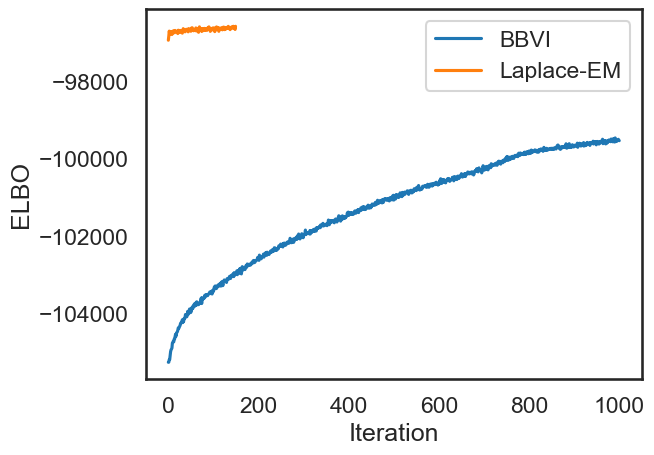

In [7]:
plt.plot(q_bbvi_elbos, label="BBVI")
plt.plot(q_lem_elbos[1:], label="Laplace-EM")
plt.xlabel("Iteration")
plt.ylabel("ELBO")
plt.legend()

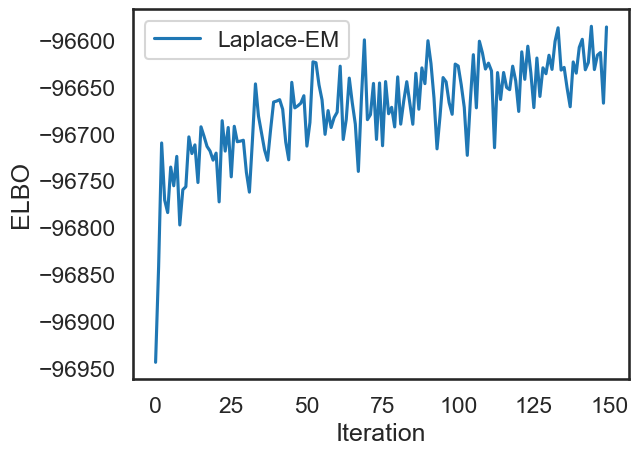

In [8]:
plt.plot(q_lem_elbos[1:], label="Laplace-EM")
plt.xlabel("Iteration")
plt.ylabel("ELBO")
plt.legend()

(0.0, 1000.0)

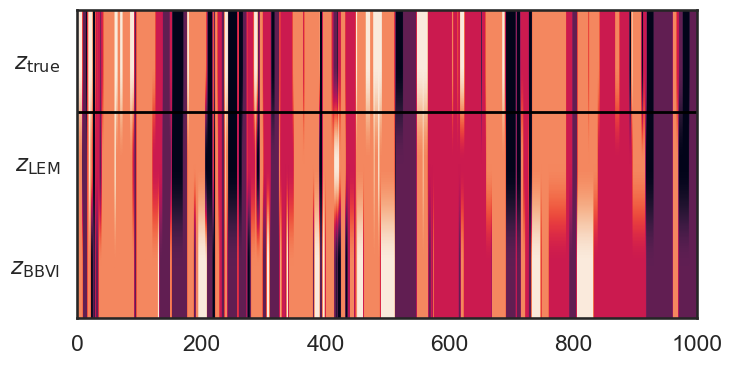

In [9]:
# Plot the true and inferred states
xlim = (0, 1000)

plt.figure(figsize=(8,4))
plt.imshow(np.column_stack((z, q_lem_z, q_bbvi_z)).T, aspect="auto")
plt.plot(xlim, [0.5, 0.5], '-k', lw=2)
plt.yticks([0, 1, 2], ["$z_{\\mathrm{true}}$", "$z_{\\mathrm{LEM}}$", "$z_{\\mathrm{BBVI}}$"])
plt.xlim(xlim)

(0.0, 1000.0)

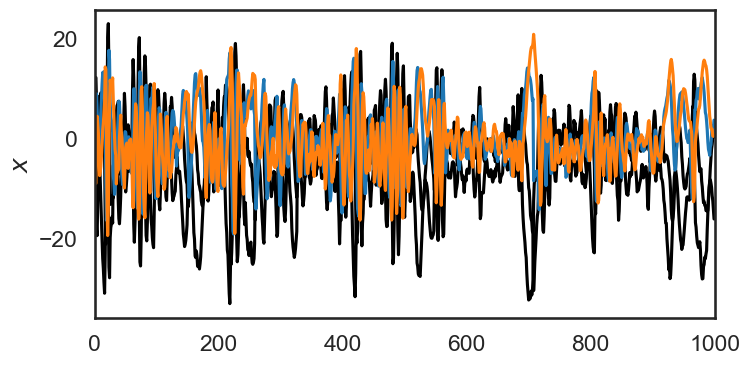

In [10]:
plt.figure(figsize=(8,4))
plt.plot(x, '-k')
plt.plot(q_bbvi_x, '-')
plt.ylabel("$x$")
plt.xlim(xlim)

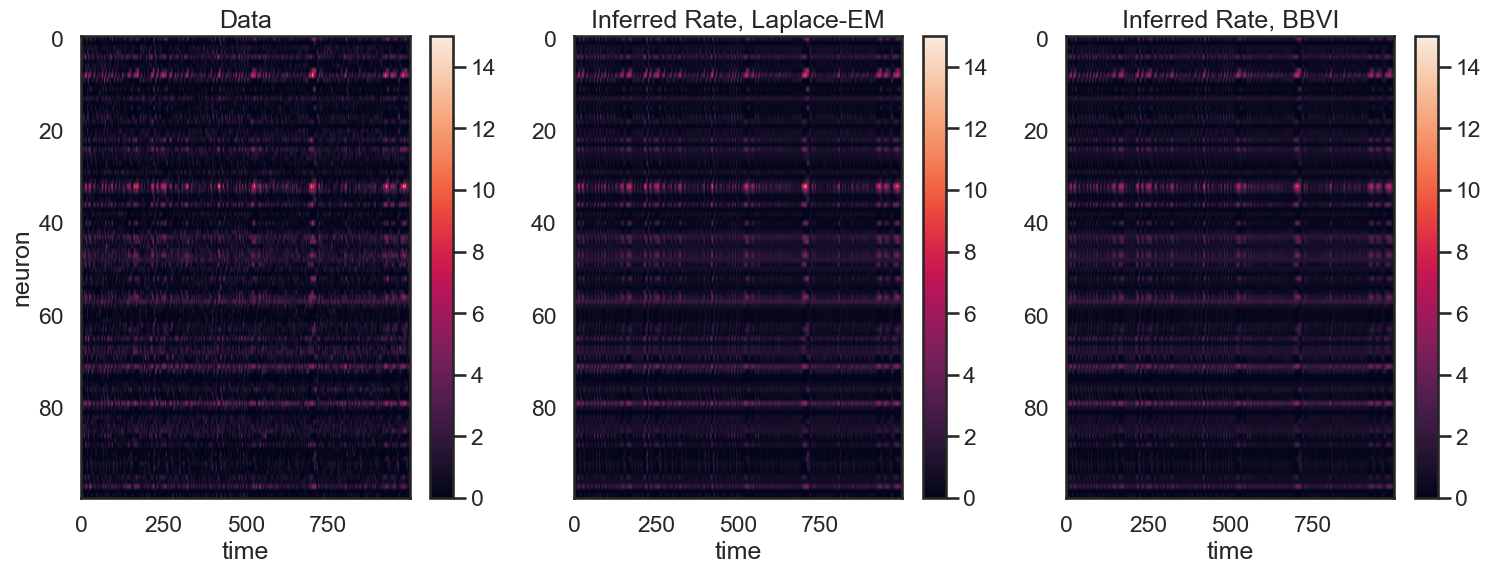

In [11]:
# Plot the smoothed observations
lim = max(y.max(), q_bbvi_y.max(), q_lem_y.max())
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(y.T, aspect="auto", vmin=0, vmax=lim)
plt.ylabel("neuron")
plt.xlabel("time")
plt.title("Data")
plt.colorbar()

plt.subplot(132)
plt.imshow(q_lem_y.T, aspect="auto", vmin=0, vmax=lim)
plt.xlabel("time")
plt.title("Inferred Rate, Laplace-EM")
plt.colorbar()

plt.subplot(133)
plt.imshow(q_bbvi_y.T, aspect="auto", vmin=0, vmax=lim)
plt.xlabel("time")
plt.title("Inferred Rate, BBVI")
plt.colorbar()